<h1> SPORTS ANALYTICS - 277915</h1>

<h1> INTRODUCTION

This dissertation explores the application of sports analytics in predicting NBA game outcomes through machine learning models. By leveraging data from history between 2021/2022, 2022/2023 and 2023/2024 NBA seasons, the study employs logistic regression, random forest, and multilayer perceptron models to evaluate player and team performance. The research emphasizes feature engineering, focusing on critical box score metrics that influence game results. The effectiveness of the models is assessed using accuracy, precision, recall, and F1-score metrics, with hyperparameter tuning to enhance performance. The findings demonstrate that advanced data analytics can significantly improve predictive accuracy, providing valuable insights for teams, coaches, fans, and analysts. The study highlights the economic and strategic benefits of integrating data-driven decision-making in sports, contributing to the evolving landscape of sports analytics.

In [1]:
#Importing necessary libraries for running the codes for sports analytics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Defining file paths
file_paths = {
    'home_2021': 'C:/Users/co363/OneDrive - University of Sussex/Dissertation - sports analytics/Home Teams 2021-2022 Season.xls.csv',
    'home_2022': 'C:/Users/co363/OneDrive - University of Sussex/Dissertation - sports analytics/Home Teams 2022-2023 Season.xls.csv',
    'home_2023': 'C:/Users/co363/OneDrive - University of Sussex/Dissertation - sports analytics/Home Teams 2023-2024 Season.xls.csv',
    'visitor_2021': 'C:/Users/co363/OneDrive - University of Sussex/Dissertation - sports analytics/Visitor Teams 2021-2022 Season.xls.csv',
    'visitor_2022': 'C:/Users/co363/OneDrive - University of Sussex/Dissertation - sports analytics/Visitor Teams 2022-2023 Season.xls.csv',
    'visitor_2023': 'C:/Users/co363/OneDrive - University of Sussex/Dissertation - sports analytics/Visitor Teams 2023-2024 Season.xls.csv'
}

# Loading data and add 'Type' and 'Year' columns
home_2021 = pd.read_csv(file_paths['home_2021'])
home_2021['Type'] = 'Home'
home_2021['Year'] = 2021

home_2022 = pd.read_csv(file_paths['home_2022'])
home_2022['Type'] = 'Home'
home_2022['Year'] = 2022

home_2023 = pd.read_csv(file_paths['home_2023'])
home_2023['Type'] = 'Home'
home_2023['Year'] = 2023

visitor_2021 = pd.read_csv(file_paths['visitor_2021'])
visitor_2021['Type'] = 'Visitor'
visitor_2021['Year'] = 2021

visitor_2022 = pd.read_csv(file_paths['visitor_2022'])
visitor_2022['Type'] = 'Visitor'
visitor_2022['Year'] = 2022

visitor_2023 = pd.read_csv(file_paths['visitor_2023'])
visitor_2023['Type'] = 'Visitor'
visitor_2023['Year'] = 2023

# Displaying the first few rows of each dataframe to verify
(home_2021.head(), home_2022.head(), home_2023.head(), visitor_2021.head(), visitor_2022.head(), visitor_2023.head())

(    Rk                     Team     G     MP    FG   FGA    FG%    3P   3PA  \
 0  1.0  Minnesota Timberwolves*  82.0  241.2  41.6  91.0  0.457  14.8  41.3   
 1  2.0       Memphis Grizzlies*  82.0  241.2  43.5  94.4  0.461  11.5  32.7   
 2  3.0         Milwaukee Bucks*  82.0  240.9  41.8  89.4  0.468  14.1  38.4   
 3  4.0        Charlotte Hornets  82.0  242.4  42.8  91.4  0.468  13.9  38.2   
 4  5.0            Phoenix Suns*  82.0  240.6  43.7  90.1  0.485  11.6  31.9   
 
      3P%  ...   DRB   TRB   AST  STL  BLK   TOV    PF    PTS  Type  Year  
 0  0.358  ...  32.9  44.2  25.7  8.8  5.6  14.3  21.8  115.9  Home  2021  
 1  0.353  ...  35.0  49.2  26.0  9.8  6.5  13.2  19.8  115.6  Home  2021  
 2  0.366  ...  36.5  46.7  23.9  7.6  4.0  13.4  18.2  115.5  Home  2021  
 3  0.365  ...  33.7  44.6  28.1  8.6  4.9  13.3  19.9  115.3  Home  2021  
 4  0.364  ...  35.5  45.3  27.4  8.6  4.4  12.9  19.9  114.8  Home  2021  
 
 [5 rows x 27 columns],
     Rk                    Team     

<H1> Cleaning and Wrangling

In [3]:
# Combining all the data into a single DataFrame
combined_stats = pd.concat([home_2021, home_2022, home_2023, visitor_2021, visitor_2022, visitor_2023], ignore_index=True)

# Displaying the first few rows of the combined dataframe
print(combined_stats.head())

    Rk                     Team     G     MP    FG   FGA    FG%    3P   3PA  \
0  1.0  Minnesota Timberwolves*  82.0  241.2  41.6  91.0  0.457  14.8  41.3   
1  2.0       Memphis Grizzlies*  82.0  241.2  43.5  94.4  0.461  11.5  32.7   
2  3.0         Milwaukee Bucks*  82.0  240.9  41.8  89.4  0.468  14.1  38.4   
3  4.0        Charlotte Hornets  82.0  242.4  42.8  91.4  0.468  13.9  38.2   
4  5.0            Phoenix Suns*  82.0  240.6  43.7  90.1  0.485  11.6  31.9   

     3P%  ...   DRB   TRB   AST  STL  BLK   TOV    PF    PTS  Type  Year  
0  0.358  ...  32.9  44.2  25.7  8.8  5.6  14.3  21.8  115.9  Home  2021  
1  0.353  ...  35.0  49.2  26.0  9.8  6.5  13.2  19.8  115.6  Home  2021  
2  0.366  ...  36.5  46.7  23.9  7.6  4.0  13.4  18.2  115.5  Home  2021  
3  0.365  ...  33.7  44.6  28.1  8.6  4.9  13.3  19.9  115.3  Home  2021  
4  0.364  ...  35.5  45.3  27.4  8.6  4.4  12.9  19.9  114.8  Home  2021  

[5 rows x 27 columns]


In [4]:
#Viewing first 20 components of the dataset
combined_stats.head(20)

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Type,Year
0,1.0,Minnesota Timberwolves*,82.0,241.2,41.6,91.0,0.457,14.8,41.3,0.358,...,32.9,44.2,25.7,8.8,5.6,14.3,21.8,115.9,Home,2021
1,2.0,Memphis Grizzlies*,82.0,241.2,43.5,94.4,0.461,11.5,32.7,0.353,...,35.0,49.2,26.0,9.8,6.5,13.2,19.8,115.6,Home,2021
2,3.0,Milwaukee Bucks*,82.0,240.9,41.8,89.4,0.468,14.1,38.4,0.366,...,36.5,46.7,23.9,7.6,4.0,13.4,18.2,115.5,Home,2021
3,4.0,Charlotte Hornets,82.0,242.4,42.8,91.4,0.468,13.9,38.2,0.365,...,33.7,44.6,28.1,8.6,4.9,13.3,19.9,115.3,Home,2021
4,5.0,Phoenix Suns*,82.0,240.6,43.7,90.1,0.485,11.6,31.9,0.364,...,35.5,45.3,27.4,8.6,4.4,12.9,19.9,114.8,Home,2021
5,6.0,Atlanta Hawks*,82.0,240.3,41.5,88.3,0.470,12.9,34.4,0.374,...,33.9,44.0,24.6,7.2,4.2,11.9,18.7,113.9,Home,2021
6,7.0,Utah Jazz*,82.0,240.6,40.6,86.2,0.471,14.5,40.3,0.360,...,35.6,46.3,22.4,7.2,4.9,14.0,18.9,113.6,Home,2021
7,8.0,San Antonio Spurs,82.0,241.5,43.2,92.7,0.467,11.3,32.0,0.352,...,34.3,45.3,27.9,7.6,4.9,12.7,18.1,113.2,Home,2021
8,9.0,Brooklyn Nets*,82.0,240.9,42.0,88.4,0.475,11.5,31.7,0.361,...,34.1,44.4,25.3,7.1,5.5,14.1,20.4,112.9,Home,2021
9,10.0,Denver Nuggets*,82.0,241.5,41.7,86.3,0.483,12.7,35.9,0.353,...,34.9,44.1,27.8,7.2,3.7,14.5,20.0,112.7,Home,2021


In [5]:
#Viewing last 20 components of thr dataset
combined_stats.tail(20)

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Type,Year
166,12.0,Memphis Grizzlies,82.0,241.2,41.2,86.9,0.474,13.4,35.4,0.378,...,35.0,45.6,26.6,8.1,6.5,15.1,18.8,112.8,Visitor,2023
167,13.0,Houston Rockets,82.0,242.1,40.8,88.1,0.463,12.3,35.4,0.348,...,34.2,44.9,24.4,7.3,5.9,13.8,19.6,113.2,Visitor,2023
168,14.0,Phoenix Suns*,82.0,241.2,42.0,90.6,0.464,13.1,36.0,0.364,...,30.4,41.3,26.3,8.4,4.5,12.7,19.7,113.2,Visitor,2023
169,15.0,Brooklyn Nets,82.0,241.5,41.6,88.5,0.470,13.0,34.9,0.372,...,34.0,44.3,25.5,6.9,5.0,12.6,18.2,113.3,Visitor,2023
170,16.0,Chicago Bulls,82.0,243.7,41.1,87.0,0.473,14.6,39.5,0.370,...,33.3,43.4,27.9,6.8,4.9,14.0,18.8,113.7,Visitor,2023
171,17.0,Sacramento Kings,82.0,242.1,41.6,86.8,0.480,13.1,33.8,0.387,...,33.4,42.5,26.9,7.4,4.5,13.9,18.3,114.8,Visitor,2023
172,18.0,Golden State Warriors,82.0,241.8,42.1,90.4,0.466,13.3,37.0,0.359,...,32.0,42.9,26.7,7.7,5.0,13.0,17.9,115.2,Visitor,2023
173,19.0,Portland Trail Blazers,82.0,242.4,42.5,86.6,0.491,11.7,33.3,0.351,...,33.2,43.8,27.1,8.9,6.4,14.3,17.9,115.4,Visitor,2023
174,20.0,Dallas Mavericks*,82.0,240.3,43.0,90.4,0.475,13.1,35.6,0.368,...,34.1,45.1,27.5,7.4,4.0,13.7,20.3,115.6,Visitor,2023
175,21.0,Milwaukee Bucks*,82.0,241.5,43.2,91.9,0.470,12.6,35.3,0.356,...,33.7,44.0,26.5,7.1,4.2,12.0,19.2,116.4,Visitor,2023


In [6]:
#Viewing number of columns
len(combined_stats.columns)

27

In [7]:
# Saving the combined DataFrame to a new CSV file
combined_file_path = 'C:/Users/co363/OneDrive - University of Sussex/Dissertation - sports analytics/Combined_Team_Stats.csv'
combined_stats.to_csv(combined_file_path, index=False)

In [8]:
#Displaying basic information about the dataset
print(combined_stats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      180 non-null    float64
 1   Team    180 non-null    object 
 2   G       180 non-null    float64
 3   MP      180 non-null    float64
 4   FG      180 non-null    float64
 5   FGA     180 non-null    float64
 6   FG%     180 non-null    float64
 7   3P      180 non-null    float64
 8   3PA     180 non-null    float64
 9   3P%     180 non-null    float64
 10  2P      180 non-null    float64
 11  2PA     180 non-null    float64
 12  2P%     180 non-null    float64
 13  FT      180 non-null    float64
 14  FTA     180 non-null    float64
 15  FT%     180 non-null    float64
 16  ORB     180 non-null    float64
 17  DRB     180 non-null    float64
 18  TRB     180 non-null    float64
 19  AST     180 non-null    float64
 20  STL     180 non-null    float64
 21  BLK     180 non-null    float64
 22  TO

In [9]:
#Checking data types
print(combined_stats.dtypes)

Rk      float64
Team     object
G       float64
MP      float64
FG      float64
FGA     float64
FG%     float64
3P      float64
3PA     float64
3P%     float64
2P      float64
2PA     float64
2P%     float64
FT      float64
FTA     float64
FT%     float64
ORB     float64
DRB     float64
TRB     float64
AST     float64
STL     float64
BLK     float64
TOV     float64
PF      float64
PTS     float64
Type     object
Year      int64
dtype: object


In [10]:
#Checking for duplicates
print(combined_stats.duplicated().sum())

0


<h1>Handling Missing Values

In [11]:
# Checking for missing values in each column
missing_values = combined_stats.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Filling missing values or dropping rows/columns with missing values
combined_stats_cleaned = combined_stats.dropna()

# Verifying that there are no more missing values
print("Missing values after cleaning:")
print(combined_stats_cleaned.isnull().sum())


Missing values in each column:
Rk      6
Team    6
G       6
MP      6
FG      6
FGA     6
FG%     6
3P      6
3PA     6
3P%     6
2P      6
2PA     6
2P%     6
FT      6
FTA     6
FT%     6
ORB     6
DRB     6
TRB     6
AST     6
STL     6
BLK     6
TOV     6
PF      6
PTS     6
Type    0
Year    0
dtype: int64
Missing values after cleaning:
Rk      0
Team    0
G       0
MP      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     0
2P      0
2PA     0
2P%     0
FT      0
FTA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
Type    0
Year    0
dtype: int64


In [12]:
#Viewing the dataset
combined_stats_cleaned 

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Type,Year
0,1.0,Minnesota Timberwolves*,82.0,241.2,41.6,91.0,0.457,14.8,41.3,0.358,...,32.9,44.2,25.7,8.8,5.6,14.3,21.8,115.9,Home,2021
1,2.0,Memphis Grizzlies*,82.0,241.2,43.5,94.4,0.461,11.5,32.7,0.353,...,35.0,49.2,26.0,9.8,6.5,13.2,19.8,115.6,Home,2021
2,3.0,Milwaukee Bucks*,82.0,240.9,41.8,89.4,0.468,14.1,38.4,0.366,...,36.5,46.7,23.9,7.6,4.0,13.4,18.2,115.5,Home,2021
3,4.0,Charlotte Hornets,82.0,242.4,42.8,91.4,0.468,13.9,38.2,0.365,...,33.7,44.6,28.1,8.6,4.9,13.3,19.9,115.3,Home,2021
4,5.0,Phoenix Suns*,82.0,240.6,43.7,90.1,0.485,11.6,31.9,0.364,...,35.5,45.3,27.4,8.6,4.4,12.9,19.9,114.8,Home,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,26.0,Detroit Pistons,82.0,240.9,43.6,89.0,0.490,12.1,32.7,0.370,...,33.5,43.1,27.0,8.9,6.0,12.4,17.8,119.0,Visitor,2023
181,27.0,Indiana Pacers*,82.0,240.3,44.5,89.8,0.496,10.7,29.3,0.365,...,32.4,43.4,24.6,6.6,5.4,13.9,18.3,120.2,Visitor,2023
182,28.0,Atlanta Hawks,82.0,242.1,44.6,90.2,0.495,14.0,36.4,0.384,...,33.6,44.2,28.2,7.8,5.6,14.1,19.4,120.5,Visitor,2023
183,29.0,Utah Jazz,82.0,241.5,44.6,91.6,0.487,14.8,37.4,0.395,...,31.3,42.2,29.8,8.6,6.4,12.3,19.2,120.5,Visitor,2023


<h1>Checking for duplicates

In [13]:
# Checking for duplicates
duplicates = combined_stats_cleaned.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

# Dropping duplicate rows
combined_stats_cleaned = combined_stats_cleaned.drop_duplicates()

# Verifying that there are no more duplicates
print(f'Number of duplicate rows after cleaning: {combined_stats_cleaned.duplicated().sum()}')


Number of duplicate rows: 0
Number of duplicate rows after cleaning: 0


<h1>Checking for Data Types

In [14]:
# Checking data types
print(combined_stats_cleaned.dtypes)

# Verifying data types
print(combined_stats_cleaned.dtypes)

Rk      float64
Team     object
G       float64
MP      float64
FG      float64
FGA     float64
FG%     float64
3P      float64
3PA     float64
3P%     float64
2P      float64
2PA     float64
2P%     float64
FT      float64
FTA     float64
FT%     float64
ORB     float64
DRB     float64
TRB     float64
AST     float64
STL     float64
BLK     float64
TOV     float64
PF      float64
PTS     float64
Type     object
Year      int64
dtype: object
Rk      float64
Team     object
G       float64
MP      float64
FG      float64
FGA     float64
FG%     float64
3P      float64
3PA     float64
3P%     float64
2P      float64
2PA     float64
2P%     float64
FT      float64
FTA     float64
FT%     float64
ORB     float64
DRB     float64
TRB     float64
AST     float64
STL     float64
BLK     float64
TOV     float64
PF      float64
PTS     float64
Type     object
Year      int64
dtype: object


<h1> Saving the Cleaned Data

In [15]:
# Saving the cleaned DataFrame to a new CSV file
cleaned_file_path = 'C:/Users/co363/OneDrive - University of Sussex/Dissertation - sports analytics/Combined_Team_Stats_Cleaned.csv'
combined_stats_cleaned.to_csv(cleaned_file_path, index=False)


<H1> Summary Statistics of the dataframe

Summary statistics are numerical values that describe and summarize the main features of a data set, providing a quick overview of the data. Common summary statistics include measures of central tendency (mean, median, mode) and measures of variability (range, variance, standard deviation).

In [16]:
combined_stats_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,180.0,15.500000,8.679585,1.000,8.00000,15.500,23.000,30.000
G,180.0,82.000000,0.000000,82.000,82.00000,82.000,82.000,82.000
MP,180.0,241.491111,0.786001,240.300,240.90000,241.500,242.100,243.700
FG,180.0,41.591111,1.715695,37.500,40.50000,41.600,42.825,47.000
FGA,180.0,88.435000,2.364814,82.300,86.77500,88.400,90.200,94.400
FG%,180.0,0.470322,0.015029,0.430,0.46200,0.470,0.480,0.507
3P,180.0,12.538333,1.143027,10.400,11.70000,12.500,13.100,16.600
3PA,180.0,34.830556,2.735104,28.800,32.70000,34.450,36.700,43.200
3P%,180.0,0.359894,0.013801,0.323,0.35075,0.360,0.369,0.395
2P,180.0,29.055556,1.884462,24.500,27.80000,29.000,30.400,33.900


<h1> Histogram of some features in summary statistics

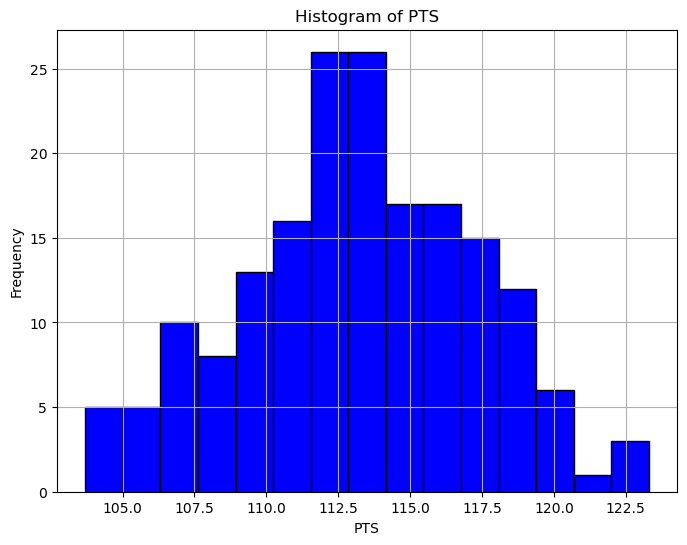

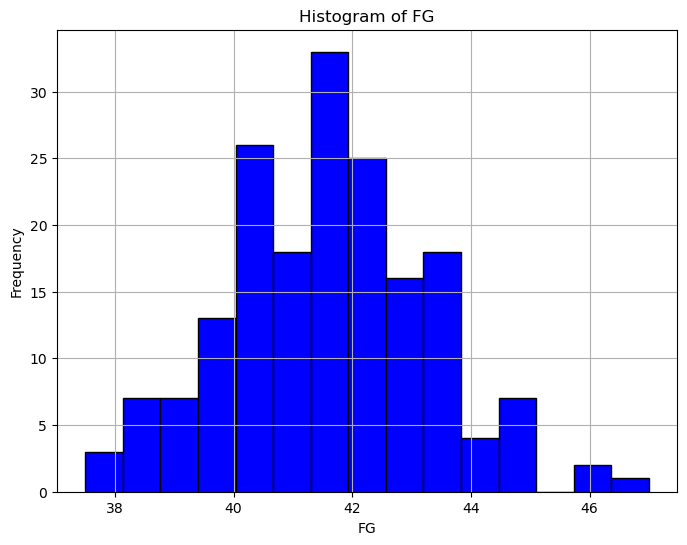

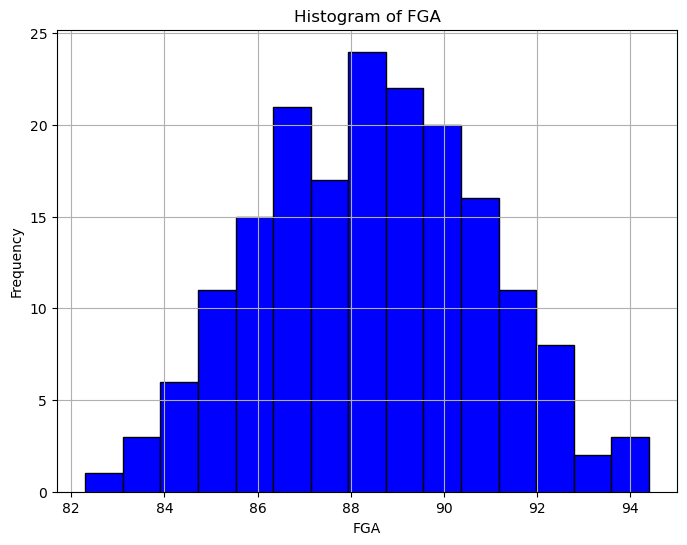

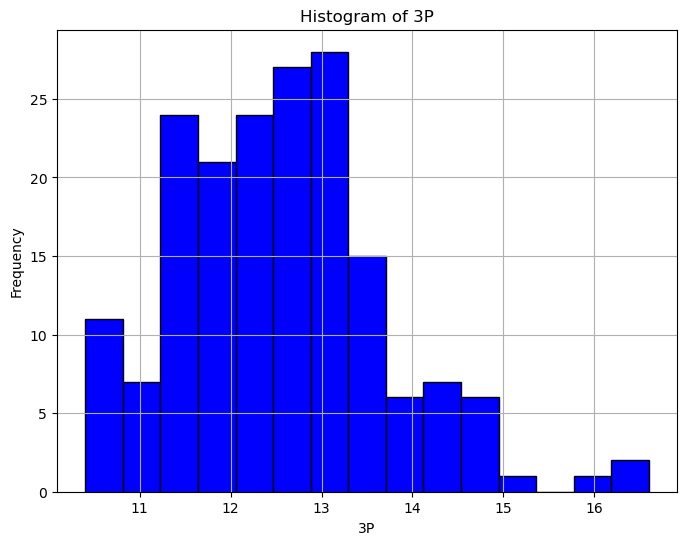

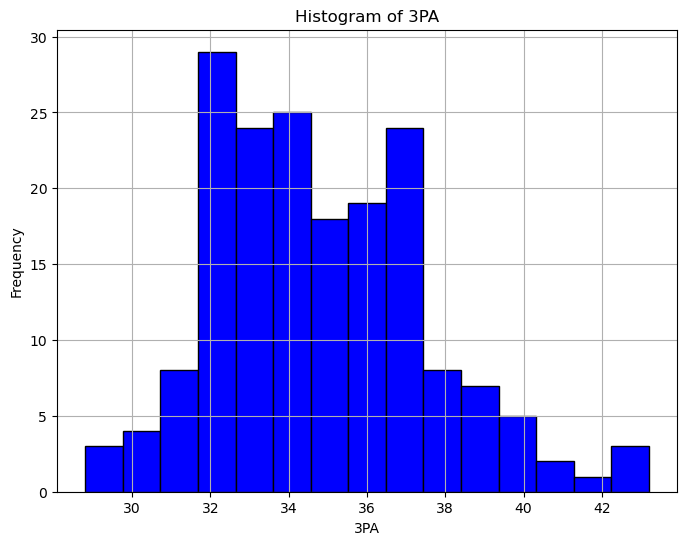

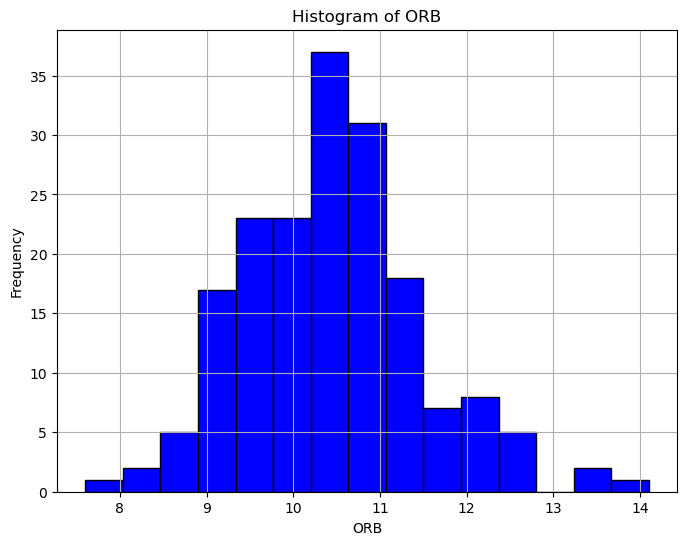

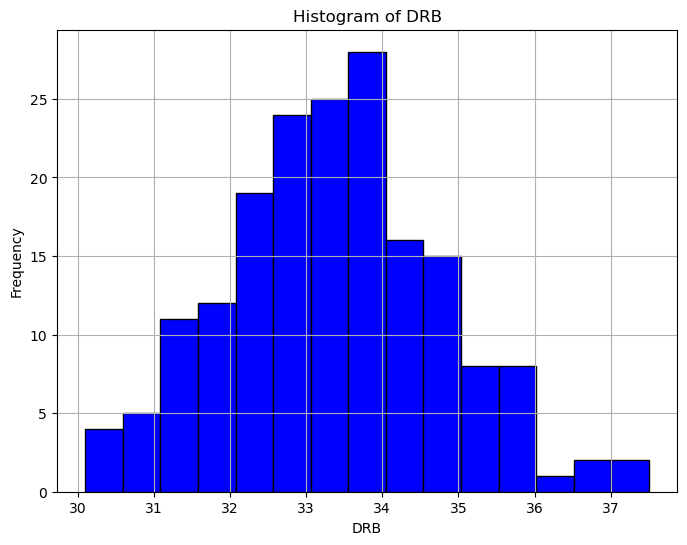

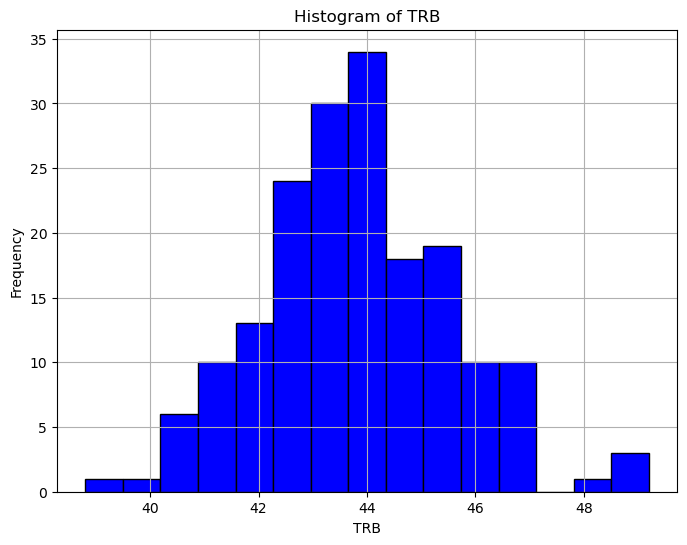

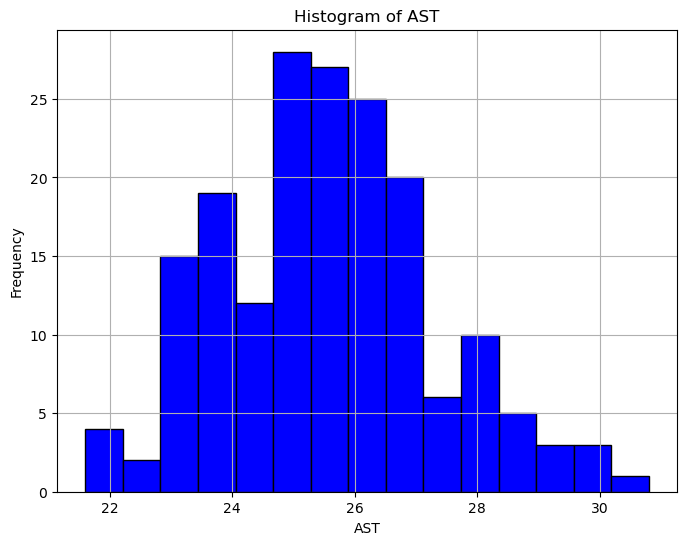

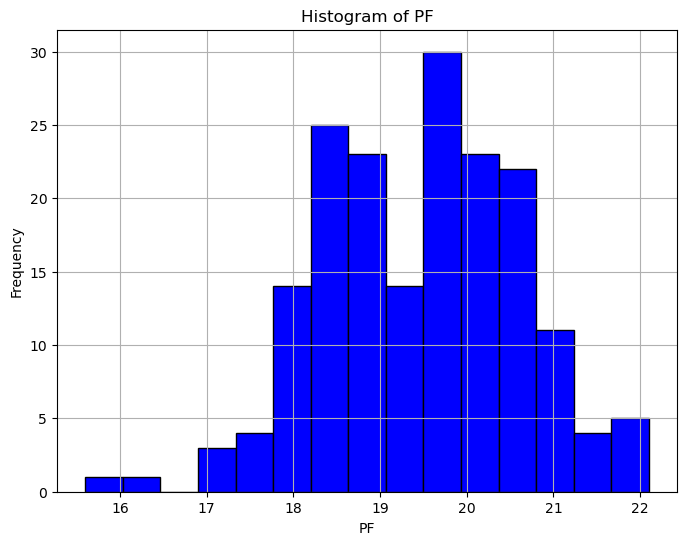

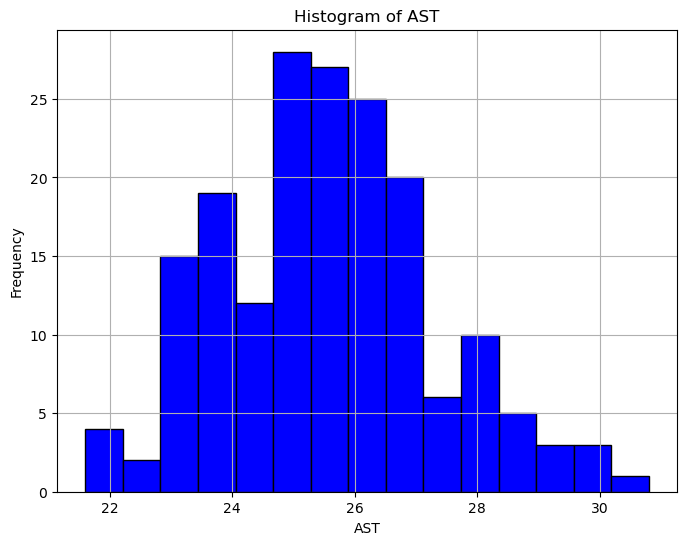

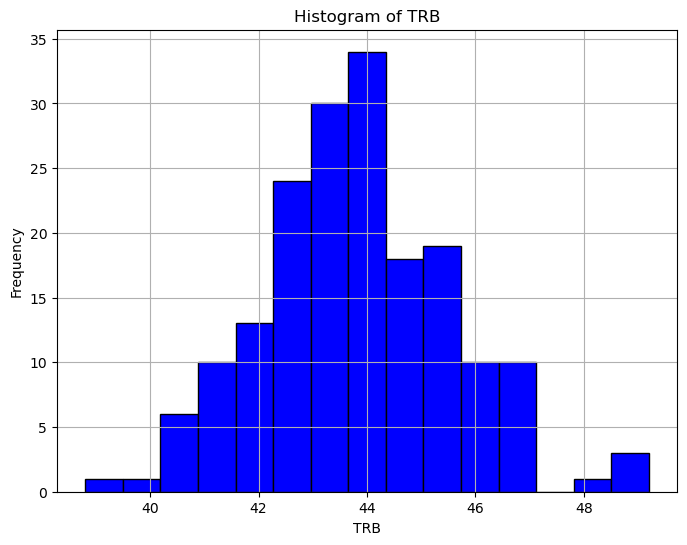

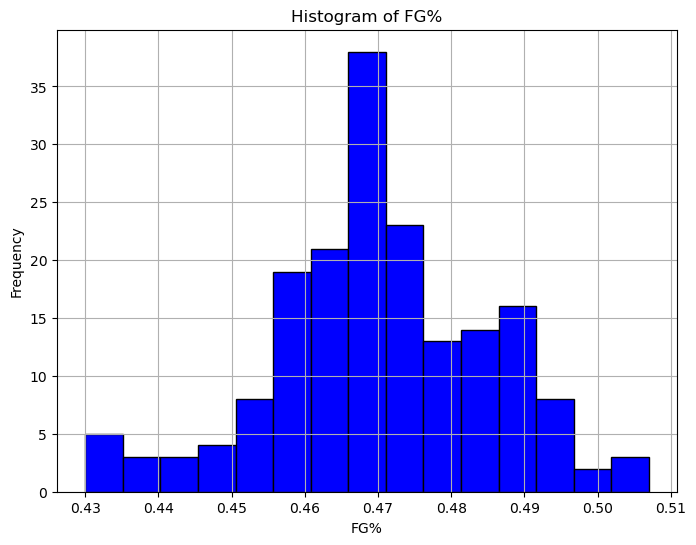

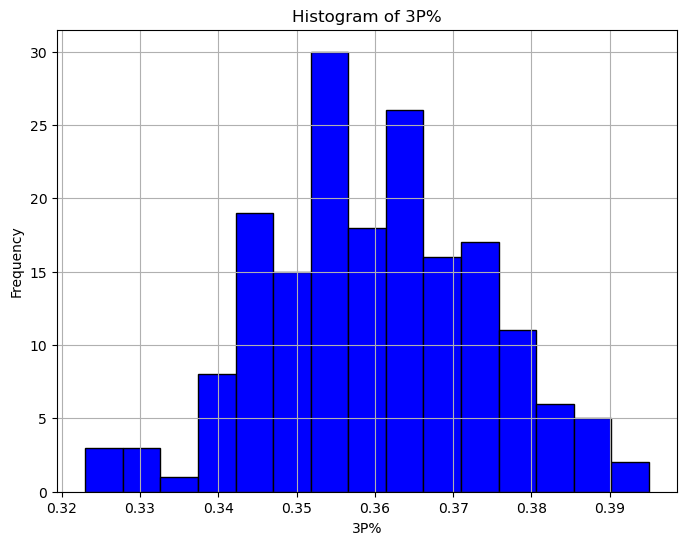

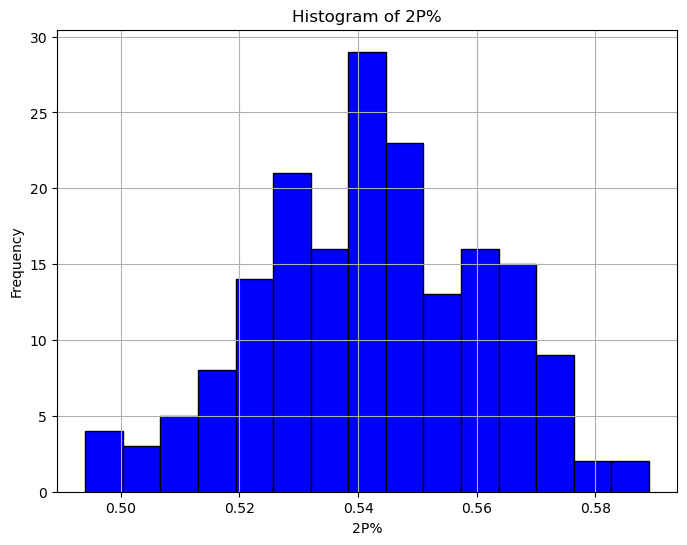

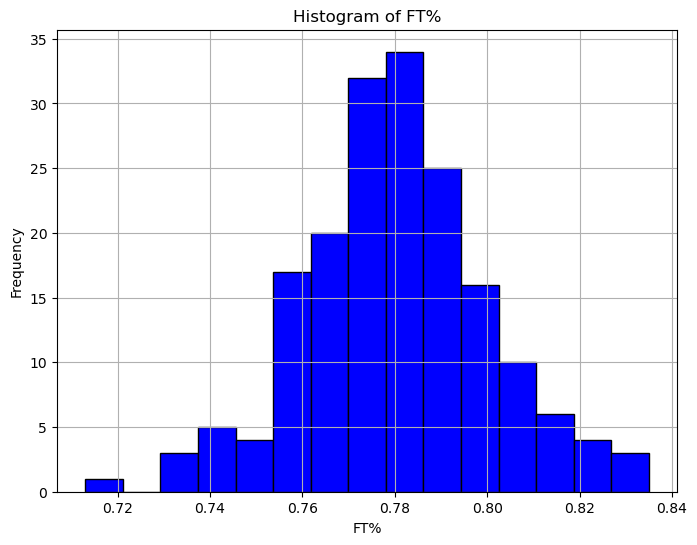

In [17]:
# List of key metrics for which histograms will be generated
key_metrics = ["PTS", "FG", "FGA", "3P", "3PA", "ORB", "DRB", "TRB", "AST", "PF", "AST", "TRB", "FG%", "3P%", "2P%", "FT%"]

# Generating histograms for each key metric
for metric in key_metrics:
    plt.figure(figsize=(8, 6))
    plt.hist(combined_stats_cleaned[metric], bins=15, color='blue', edgecolor='black')
    plt.title(f'Histogram of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


<h1> EXPLORATORY DATA ANALYSIS FOR TEAM STATISTICS

<h1>Histogram of Points (PTS)

Histogram of Points (PTS) displays the frequency distribution of individual point scores in the dataset, showing how often different point values occur. It helps to visualize the spread and central tendency of the point scores, highlighting the most common and extreme values.

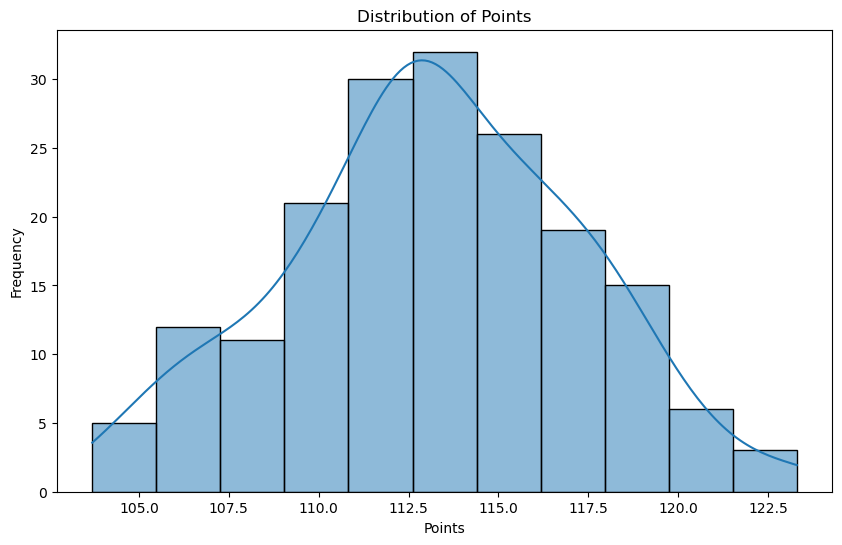

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(combined_stats_cleaned['PTS'], kde=True)
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

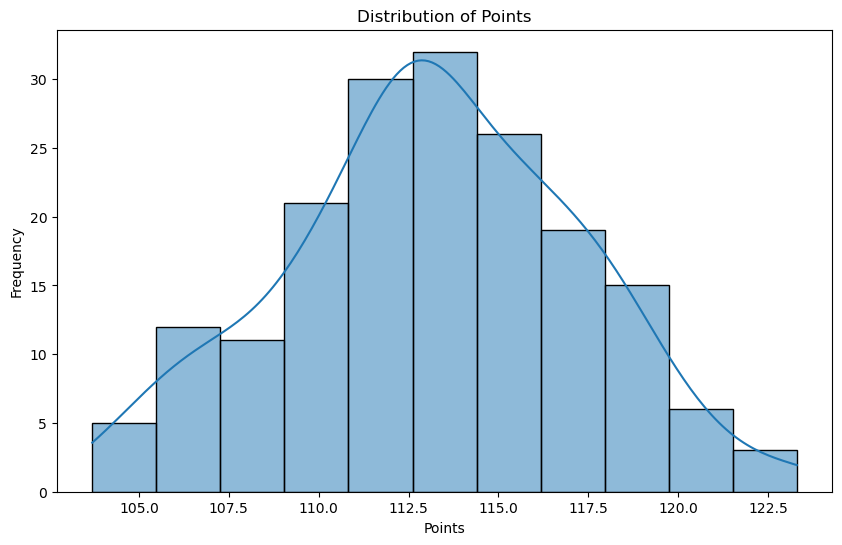

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring that combined_stats_cleaned['PTS'] is not empty and remove non-finite values
if 'PTS' in combined_stats_cleaned.columns:
    cleaned_pts = combined_stats_cleaned['PTS'].dropna()
    cleaned_pts = cleaned_pts[np.isfinite(cleaned_pts)]

    if not cleaned_pts.empty:
        plt.figure(figsize=(10,6))
        sns.histplot(cleaned_pts, kde=True)
        plt.title('Distribution of Points')
        plt.xlabel('Points')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("No valid data to plot in 'PTS' column.")
else:
    print("'PTS' column not found in the dataframe.")


<h1>Correlation Heatmap

This is useful in displaying features that relate to each other

In [20]:
numeric_df = combined_stats_cleaned.select_dtypes(include=[float, int])

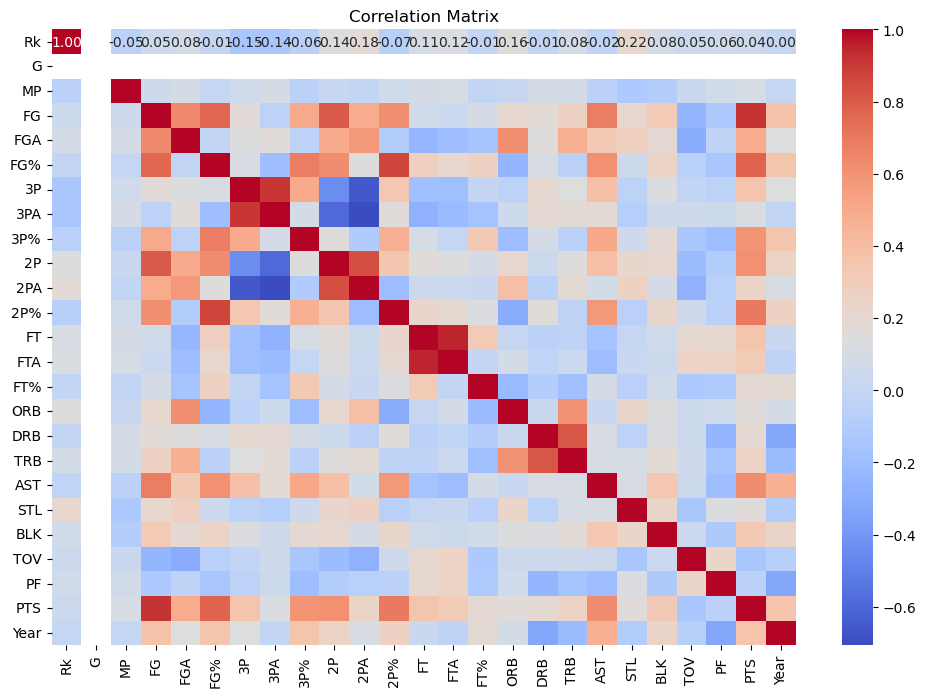

In [21]:
# Computing the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<H1> Loading Player Statistics for 2021-2022, 2022-2023 and 2023-2024

In [22]:
# File paths
file_paths = [
    'C:/Users/co363/OneDrive - University of Sussex/Dissertation - sports analytics/Advanced player stats 2021-2022 season.csv',
    'C:/Users/co363/OneDrive - University of Sussex/Dissertation - sports analytics/Advanced player stats 2022-2023 season.csv',
    'C:/Users/co363/OneDrive - University of Sussex/Dissertation - sports analytics/Advanced player stats 2023-2024 season.csv'
]

# Loading the dataframes with latin1 encoding
dataframes = [pd.read_csv(file, encoding='latin1') for file in file_paths]

# Merging the dataframes
merged_df = pd.concat(dataframes, ignore_index=True)


In [23]:
# Displaying the first 20 rows of the merged dataframe
merged_df.head(20)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,C,22,TOR,73,1725,12.7,0.503,0.259,...,11.3,18.5,0.4,2.1,2.5,0.070,-2.0,-0.6,-2.6,-0.2
1,2,Steven Adams,C,28,MEM,76,1999,17.6,0.560,0.003,...,19.6,12.0,3.8,3.0,6.8,0.163,1.0,1.0,2.0,2.0
2,3,Bam Adebayo,C,24,MIA,56,1825,21.8,0.608,0.008,...,14.4,25.0,3.6,3.5,7.2,0.188,1.7,2.1,3.8,2.7
3,4,Santi Aldama,PF,21,MEM,32,360,10.2,0.452,0.364,...,9.9,18.4,-0.1,0.4,0.3,0.044,-4.2,-1.5,-5.7,-0.3
4,5,LaMarcus Aldridge,C,36,BRK,47,1050,19.6,0.604,0.100,...,8.0,22.4,2.1,1.0,3.1,0.141,1.3,-0.6,0.7,0.7
5,6,Nickeil Alexander-Walker,SG,23,NOP,50,1317,10.5,0.474,0.483,...,11.2,24.8,-1.1,0.9,-0.1,-0.005,-1.7,-1.3,-3.0,-0.3
6,6,Nickeil Alexander-Walker,SG,23,UTA,15,149,10.2,0.497,0.688,...,13.1,17.9,0.0,0.2,0.2,0.070,-2.9,1.2,-1.7,0.0
7,7,Grayson Allen,SG,26,MIL,66,1805,12.7,0.609,0.684,...,6.7,15.2,2.8,1.4,4.2,0.110,0.6,-0.2,0.4,1.1
8,8,Jarrett Allen,C,23,CLE,56,1810,23.0,0.698,0.018,...,12.7,18.1,5.4,3.0,8.5,0.224,2.7,1.2,3.9,2.7
9,9,Jose Alvarado,PG,23,NOP,54,834,16.4,0.520,0.374,...,11.2,18.4,1.0,1.1,2.1,0.121,-0.5,2.4,1.9,0.8


In [24]:
# Displaying the last 20 rows of the merged dataframe
merged_df.tail(20)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
1963,557,Robert Williams,C,26,POR,6,119,17.2,0.684,0.000,...,18.9,13.2,0.2,0.2,0.4,0.144,-2.2,2.9,0.7,0.1
1964,558,Vince Williams Jr.,SG,23,MEM,52,1436,12.8,0.597,0.551,...,17.4,15.8,1.1,1.7,2.8,0.093,-1.7,1.0,-0.7,0.5
1965,559,Ziaire Williams,SF,22,MEM,51,1038,9.3,0.511,0.500,...,13.8,19.7,-0.9,1.1,0.2,0.010,-4.0,-0.4,-4.5,-0.6
1966,560,Zion Williamson,PF,23,NOP,70,2207,22.8,0.610,0.016,...,12.8,29.7,4.7,2.8,7.5,0.164,3.3,0.6,3.8,3.3
1967,561,D.J. Wilson,PF,27,PHI,2,15,31.6,0.833,0.333,...,0.0,17.3,0.1,0.0,0.1,0.355,15.5,7.0,22.4,0.1
1968,562,Jalen Wilson,PF,23,BRK,43,664,10.8,0.537,0.413,...,8.7,14.3,0.6,0.4,1.1,0.077,-1.8,-1.1,-2.9,-0.2
1969,563,Dylan Windler,SF,27,NYK,3,7,15.5,0.750,1.000,...,0.0,12.3,0.0,0.0,0.0,0.238,3.7,3.8,7.4,0.0
1970,563,Dylan Windler,SF,27,LAL,8,28,15.9,0.667,0.889,...,0.0,13.9,0.1,0.0,0.1,0.194,3.8,-0.6,3.2,0.0
1971,563,Dylan Windler,SF,27,ATL,6,73,13.4,0.737,0.895,...,9.5,12.0,0.1,0.0,0.2,0.110,0.6,-1.6,-0.9,0.0
1972,564,James Wiseman,C,22,DET,63,1091,14.8,0.637,0.007,...,15.9,16.3,1.3,0.8,2.1,0.094,-2.6,-0.9,-3.5,-0.4


<H1> EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis (EDA) for NBA prediction involves investigating datasets to summarize their main characteristics, often with visual methods. EDA is crucial as it helps to spot anomalies, uncover patterns, and check assumptions

<h1> Data Cleaning

In [25]:
# Dropping duplicates if there are any
merged_df.drop_duplicates(inplace=True)

# Filling or dropping missing values if necessary

numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
merged_df[numerical_cols] = merged_df[numerical_cols].fillna(merged_df[numerical_cols].median())

# For categorical columns, we can fill missing values with the mode
categorical_cols = merged_df.select_dtypes(include=['object']).columns
merged_df[categorical_cols] = merged_df[categorical_cols].fillna(merged_df[categorical_cols].mode().iloc[0])


In [26]:
# Summary statistics for numerical columns
print(merged_df.describe())

# Summary statistics for categorical columns
print(merged_df.describe(include=['object']))


                Rk          Age            G           MP          PER  \
count  1982.000000  1982.000000  1982.000000  1982.000000  1982.000000   
mean    286.476791    25.938446    39.526741   899.275479    12.616448   
std     166.136230     4.229920    25.872538   807.233780     7.168224   
min       1.000000    19.000000     1.000000     1.000000   -45.200000   
25%     145.000000    23.000000    15.000000   159.250000     9.500000   
50%     286.500000    25.000000    40.000000   663.000000    12.700000   
75%     427.750000    29.000000    64.000000  1528.500000    16.000000   
max     605.000000    42.000000    82.000000  2989.000000    76.200000   

               TS%         3PAr          FTr         ORB%         DRB%  ...  \
count  1982.000000  1982.000000  1982.000000  1982.000000  1982.000000  ...   
mean      0.543806     0.405374     0.241777     5.291271    14.809788  ...   
std       0.124624     0.227479     0.198900     5.135685     7.546861  ...   
min       0.00000

<h1> Handling Missing Values

In [27]:
# Drop rows with any missing values
cleaned_df = merged_df.dropna()

# Droping rows with missing values in a specific column, e.g., 'Age'
cleaned_df_specific = merged_df.dropna(subset=['Age'])


In [28]:
# Filling missing numerical values with the median
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
merged_df[numerical_cols] = merged_df[numerical_cols].fillna(merged_df[numerical_cols].median())

# Filling missing categorical values with the mode
categorical_cols = merged_df.select_dtypes(include=['object']).columns
merged_df[categorical_cols] = merged_df[categorical_cols].fillna(merged_df[categorical_cols].mode().iloc[0])


In [29]:
# Interpolating missing values
merged_df.interpolate(method='linear', inplace=True)


<h1> Dropping Duplicates

In [30]:
# Dropping duplicates if there are any
merged_df.drop_duplicates(inplace=True)

# Filling or dropping missing values 

numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
merged_df[numerical_cols] = merged_df[numerical_cols].fillna(merged_df[numerical_cols].median())

# For categorical columns, filling missing values with the mode
categorical_cols = merged_df.select_dtypes(include=['object']).columns
merged_df[categorical_cols] = merged_df[categorical_cols].fillna(merged_df[categorical_cols].mode().iloc[0])


<h1> Descriptive Statistics

In [31]:
# Summary statistics for numerical columns
print(merged_df.describe())

                Rk          Age            G           MP          PER  \
count  1982.000000  1982.000000  1982.000000  1982.000000  1982.000000   
mean    286.476791    25.938446    39.526741   899.275479    12.616448   
std     166.136230     4.229920    25.872538   807.233780     7.168224   
min       1.000000    19.000000     1.000000     1.000000   -45.200000   
25%     145.000000    23.000000    15.000000   159.250000     9.500000   
50%     286.500000    25.000000    40.000000   663.000000    12.700000   
75%     427.750000    29.000000    64.000000  1528.500000    16.000000   
max     605.000000    42.000000    82.000000  2989.000000    76.200000   

               TS%         3PAr          FTr         ORB%         DRB%  ...  \
count  1982.000000  1982.000000  1982.000000  1982.000000  1982.000000  ...   
mean      0.543806     0.405374     0.241777     5.291271    14.809788  ...   
std       0.124624     0.227479     0.198900     5.135685     7.546861  ...   
min       0.00000

In [32]:
# Summary statistics for categorical columns
print(merged_df.describe(include=['object']))

                   Player   Pos    Tm
count                1982  1982  1982
unique                818     5    31
top     Spencer Dinwiddie    SG   DET
freq                    6   473    80


In [33]:
# Checking for missing values after handling
print("Missing values after handling:\n", merged_df.isnull().sum())

Missing values after handling:
 Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
MP        0
PER       0
TS%       0
3PAr      0
FTr       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
dtype: int64


<h1> Visualizations

<h1> Distribution of Numerical Columns

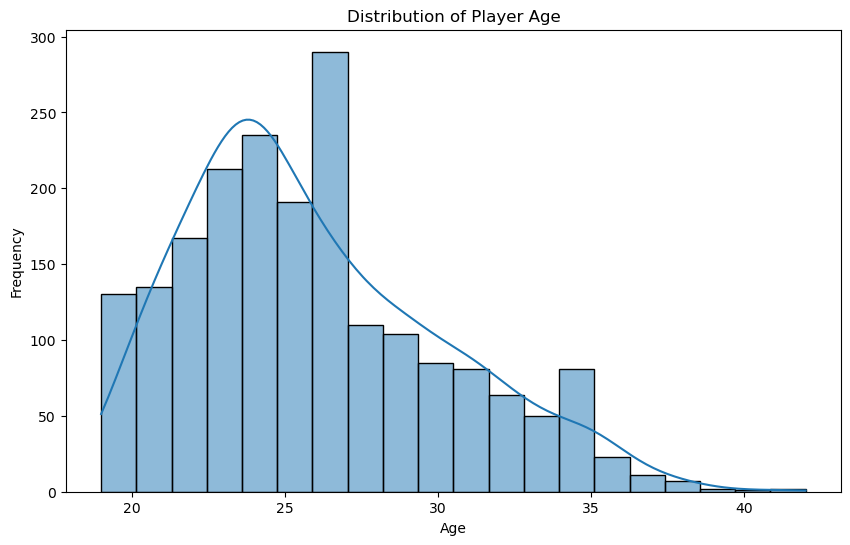

In [34]:
# Distribution of a numerical column, e.g., Age
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Age'], bins=20, kde=True)
plt.title('Distribution of Player Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<h1> Box plot

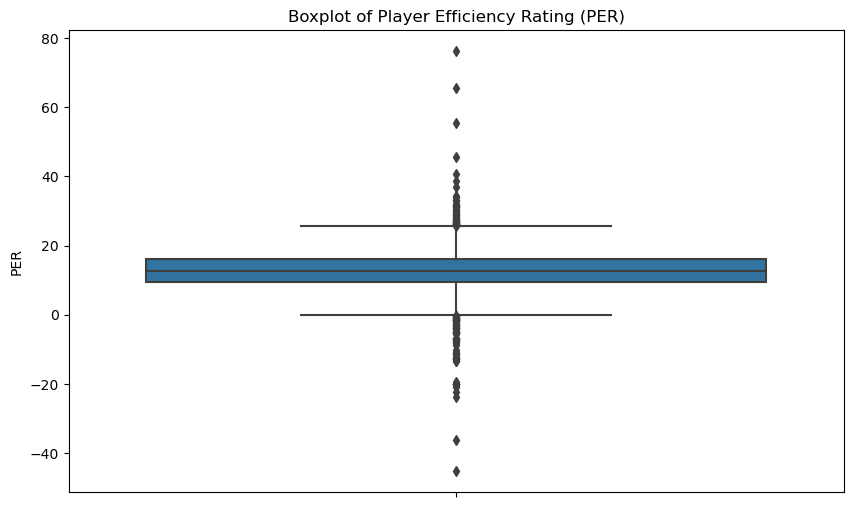

In [35]:
# Boxplot for a numerical column, e.g., PER
plt.figure(figsize=(10, 6))
sns.boxplot(y=merged_df['PER'])
plt.title('Boxplot of Player Efficiency Rating (PER)')
plt.ylabel('PER')
plt.show()


<h1> Pairplot

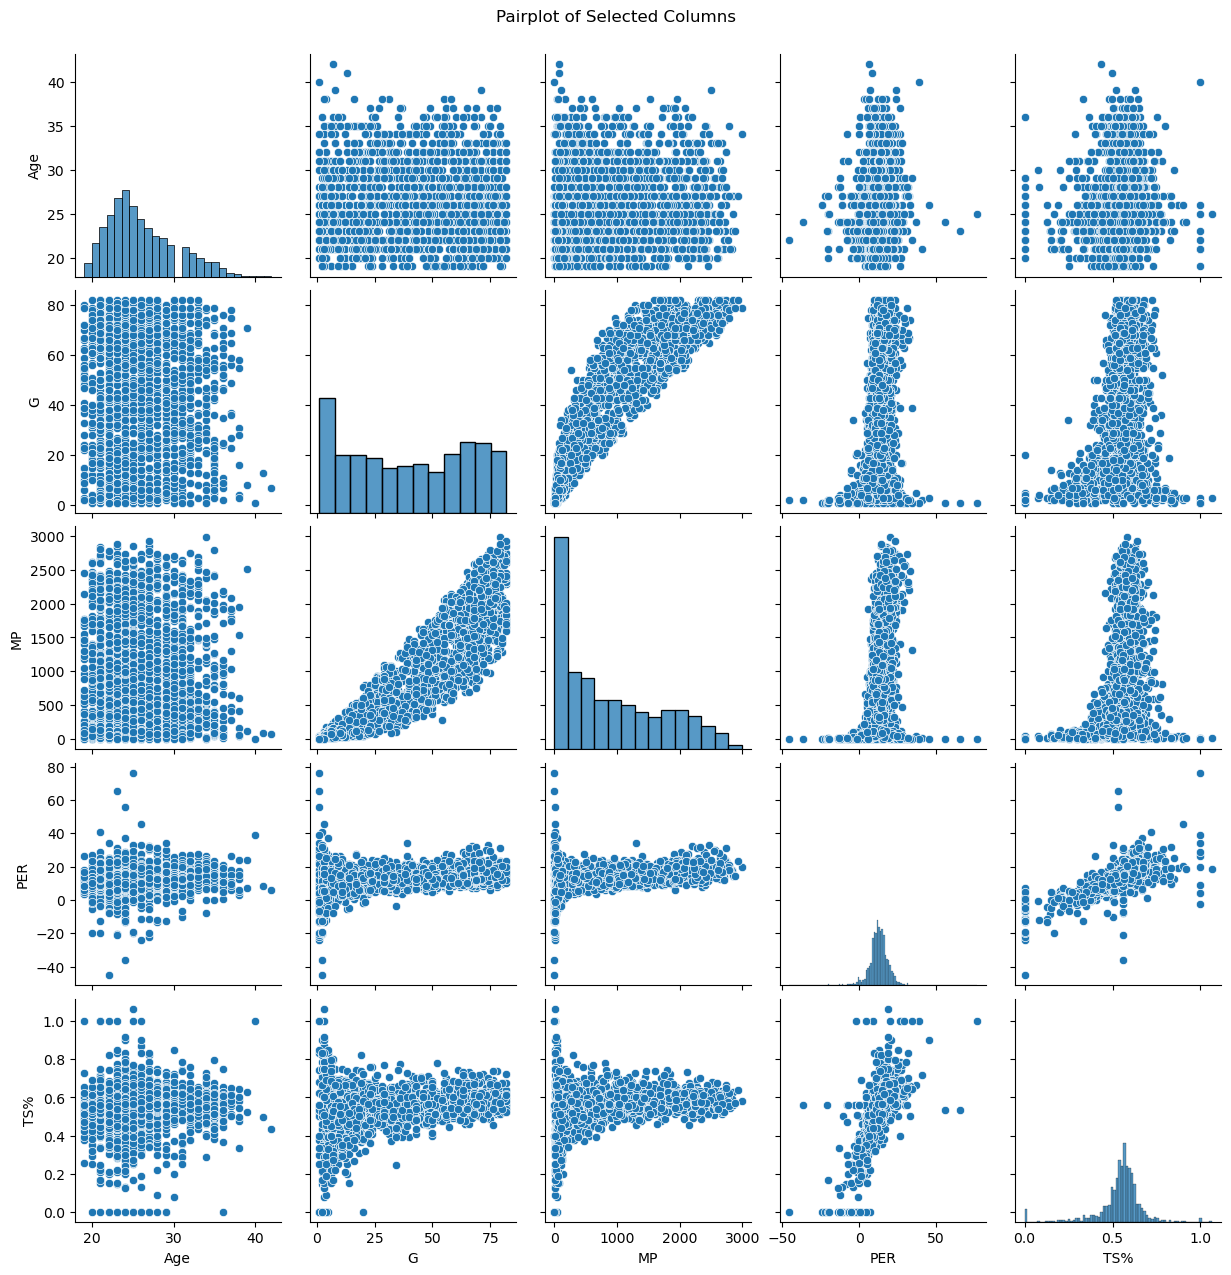

In [36]:
# Pairplot for selected columns
selected_cols = ['Age', 'G', 'MP', 'PER', 'TS%']
sns.pairplot(merged_df[selected_cols])
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()

<h1> Correlation Heatmap

This is useful in displaying features that relate to each other

In [37]:
# Selecting only numeric columns for the correlation matrix
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])

In [38]:
# Computing the correlation matrix
correlation_matrix = numeric_df.corr()

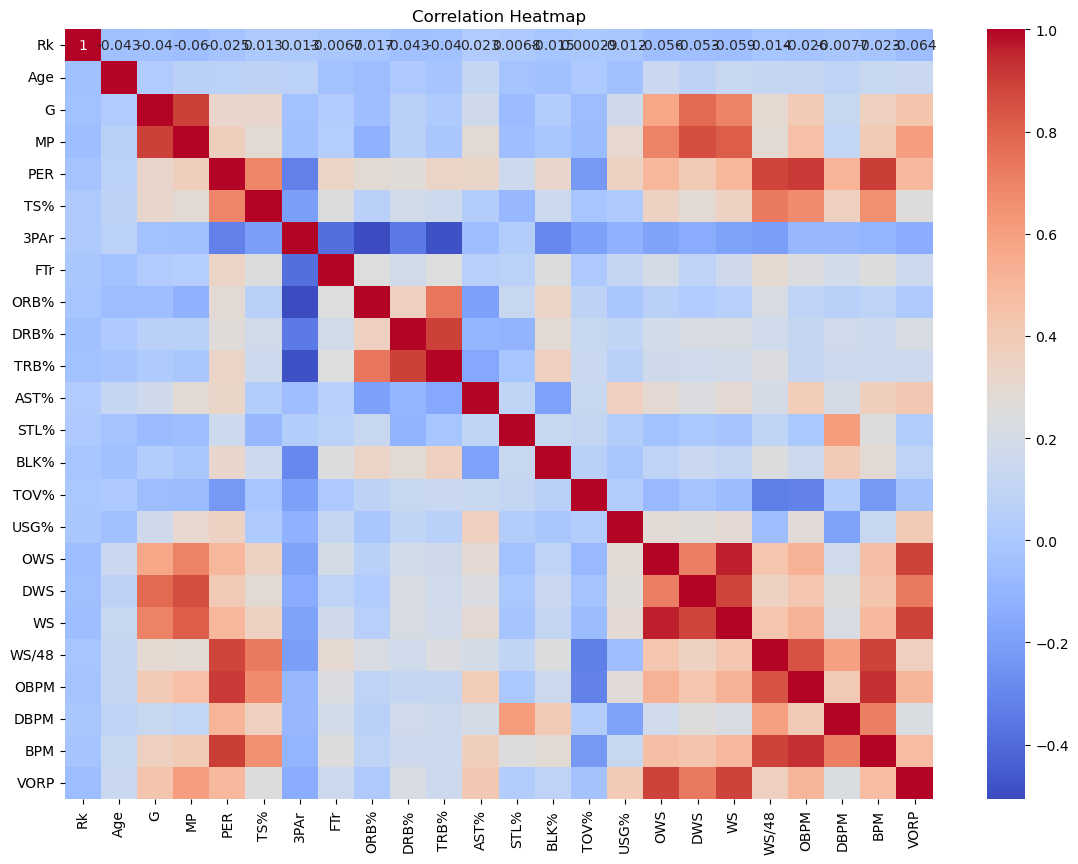

In [39]:
# Visualizing the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<h1> Team with best player stats

In [40]:
# Adding the 'Tm' column back for grouping
numeric_df['Tm'] = merged_df['Tm']

In [41]:
# Aggregating the data by team
team_stats = numeric_df.groupby('Tm').mean()

In [42]:
# Selecting key metrics for visualization
key_metrics = ['PER', 'TS%', 'WS', 'BPM']

In [43]:
# Sorting the teams by one of the key metrics for better visualization
team_stats_sorted = team_stats.sort_values(by='PER', ascending=False)


<Figure size 1600x800 with 0 Axes>

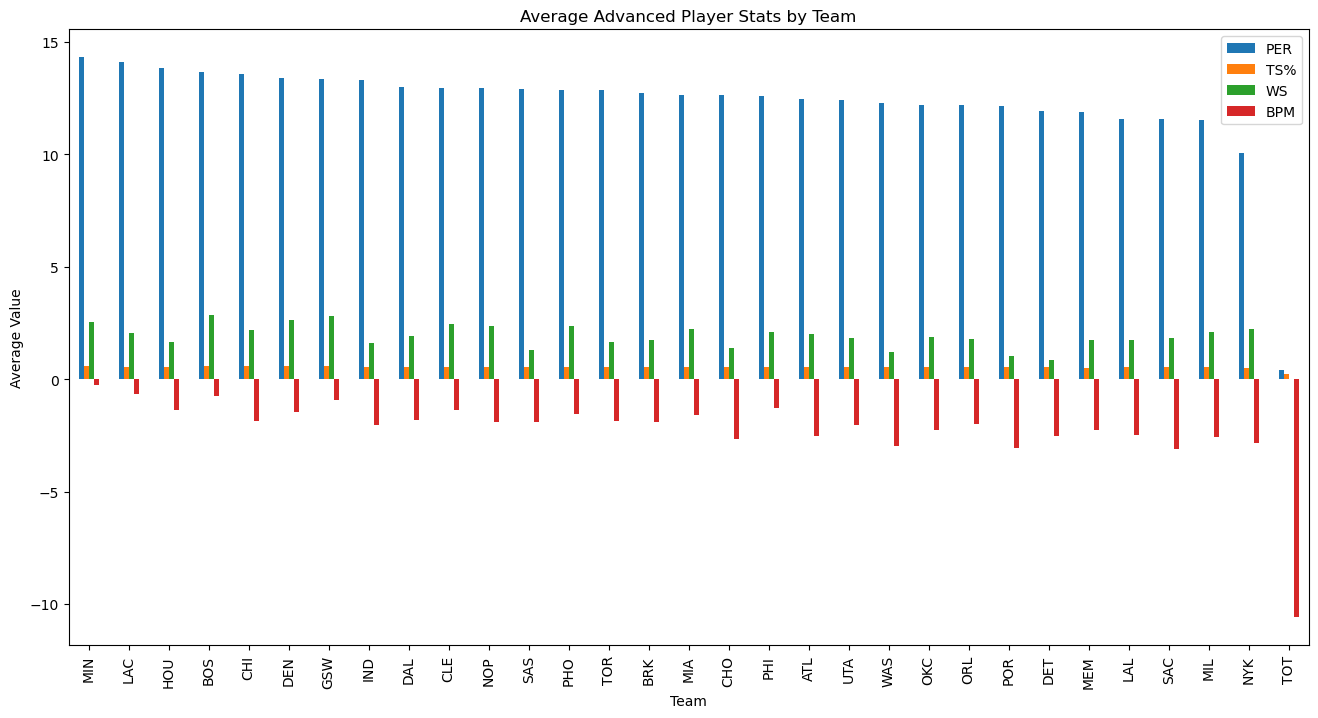

In [44]:
# Plotting the data
plt.figure(figsize=(16, 8))
team_stats_sorted[key_metrics].plot(kind='bar', figsize=(16, 8))
plt.title('Average Advanced Player Stats by Team')
plt.xlabel('Team')
plt.ylabel('Average Value')
plt.legend(loc='upper right')
plt.show()

<h1> Player Influence to team winning

In [45]:
# Selecting key metrics to represent player influence
key_metrics = ['PER', 'WS', 'BPM']

In [46]:
# Normalizing the metrics for better comparison
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()
merged_df[key_metrics] = scaler.fit_transform(merged_df[key_metrics])

In [48]:
# Creating a new column for average influence score
merged_df['Influence_Score'] = merged_df[key_metrics].mean(axis=1)

In [49]:
# Sorting the players by influence score
sorted_players = merged_df.sort_values(by='Influence_Score', ascending=False)

In [50]:
# Plotting the top players by influence score
top_n = 20  # Number of top players to display
top_players = sorted_players.head(top_n)

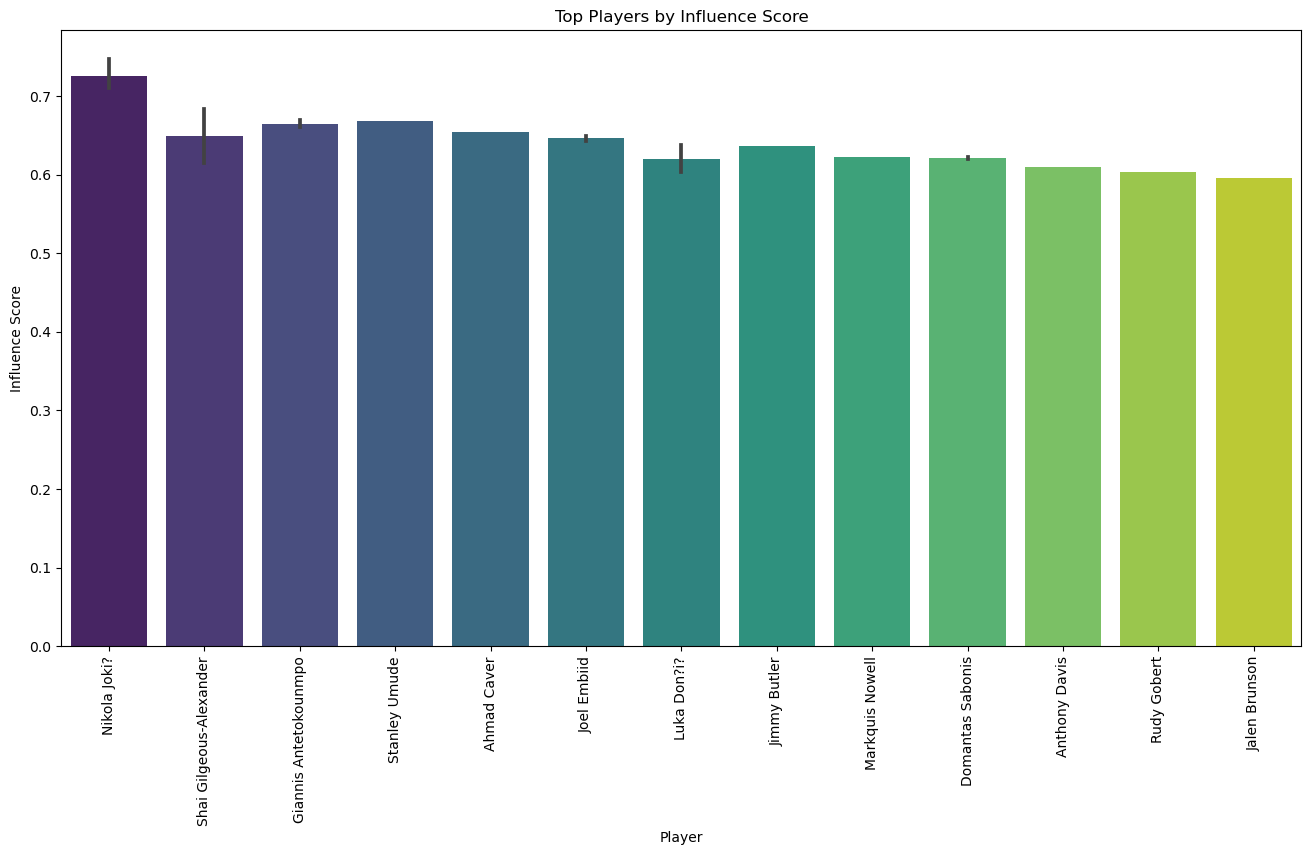

In [51]:
plt.figure(figsize=(16, 8))
sns.barplot(data=top_players, x='Player', y='Influence_Score', palette='viridis')
plt.title('Top Players by Influence Score')
plt.xlabel('Player')
plt.ylabel('Influence Score')
plt.xticks(rotation=90)  # Rotating player names for better readability
plt.show()

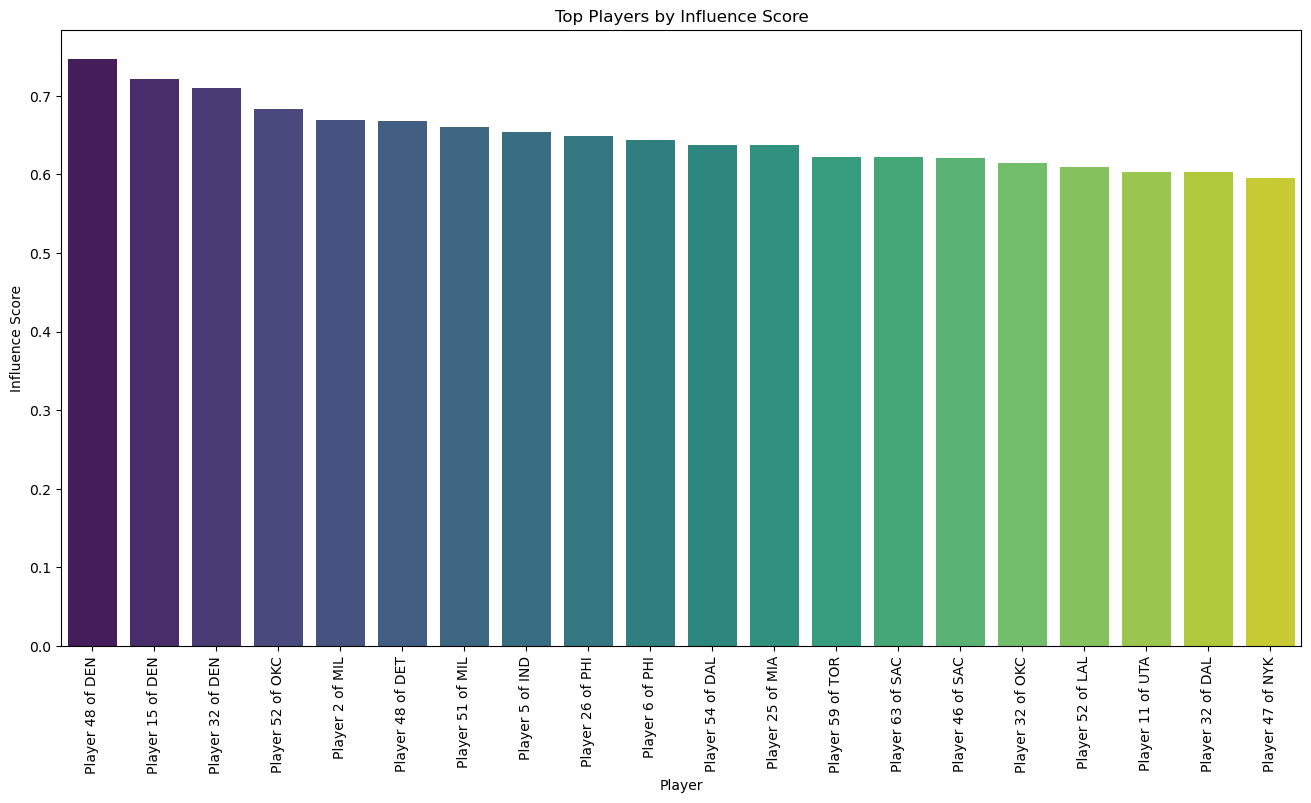

In [52]:
# Creating a new label column combining player rank and team
merged_df['Player_Team'] = 'Player ' + (merged_df.groupby('Tm').cumcount() + 1).astype(str) + ' of ' + merged_df['Tm']

# Sorting the players by influence score
sorted_players = merged_df.sort_values(by='Influence_Score', ascending=False)

# Plotting the top players by influence score
top_n = 20  # Number of top players to display
top_players = sorted_players.head(top_n)

plt.figure(figsize=(16, 8))
sns.barplot(data=top_players, x='Player_Team', y='Influence_Score', palette='viridis')
plt.title('Top Players by Influence Score')
plt.xlabel('Player')
plt.ylabel('Influence Score')
plt.xticks(rotation=90)  # Rotate player names for better readability
plt.show()


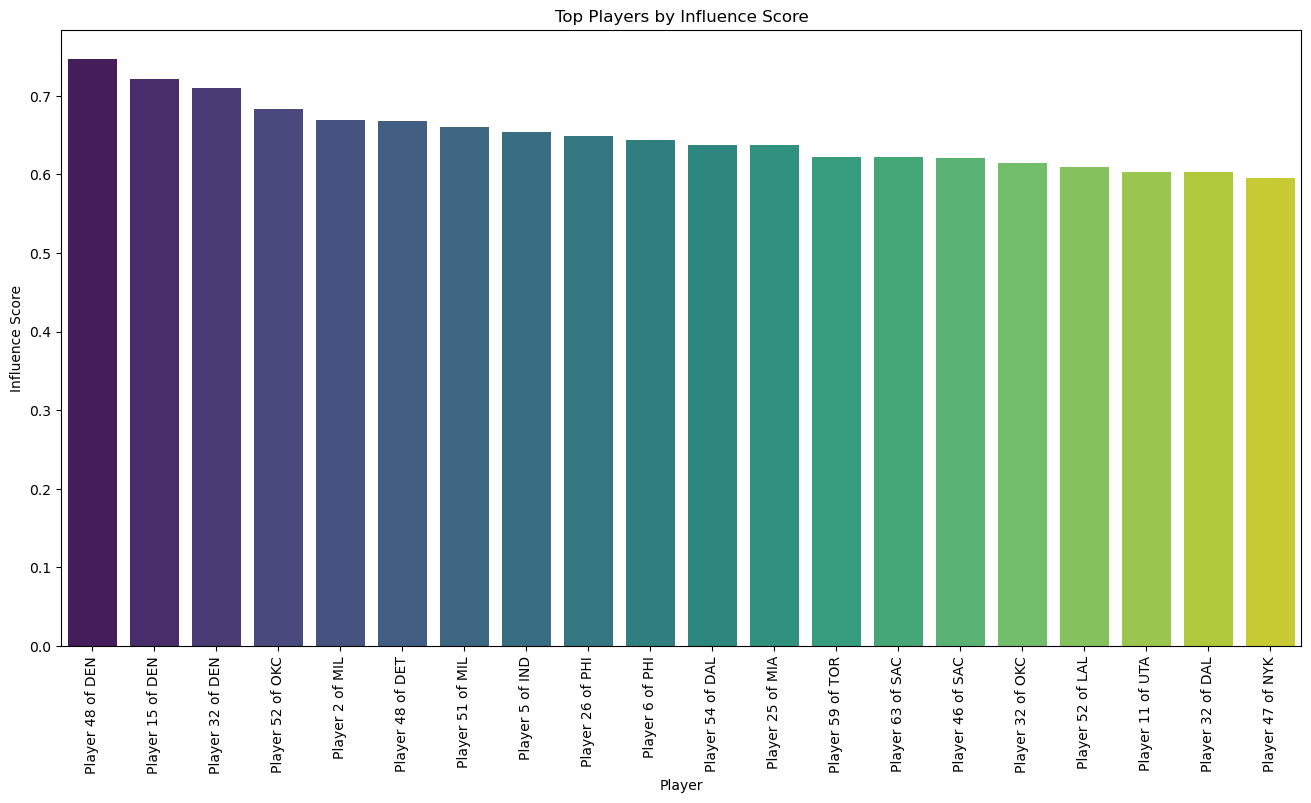

In [53]:
# Plotting the top players by influence score
top_n = 20  # Number of top players to display
top_players = sorted_players.head(top_n)

plt.figure(figsize=(16, 8))
sns.barplot(data=top_players, x='Player_Team', y='Influence_Score', palette='viridis')
plt.title('Top Players by Influence Score')
plt.xlabel('Player')
plt.ylabel('Influence Score')
plt.xticks(rotation=90)  # Rotate player names for better readability
plt.show()

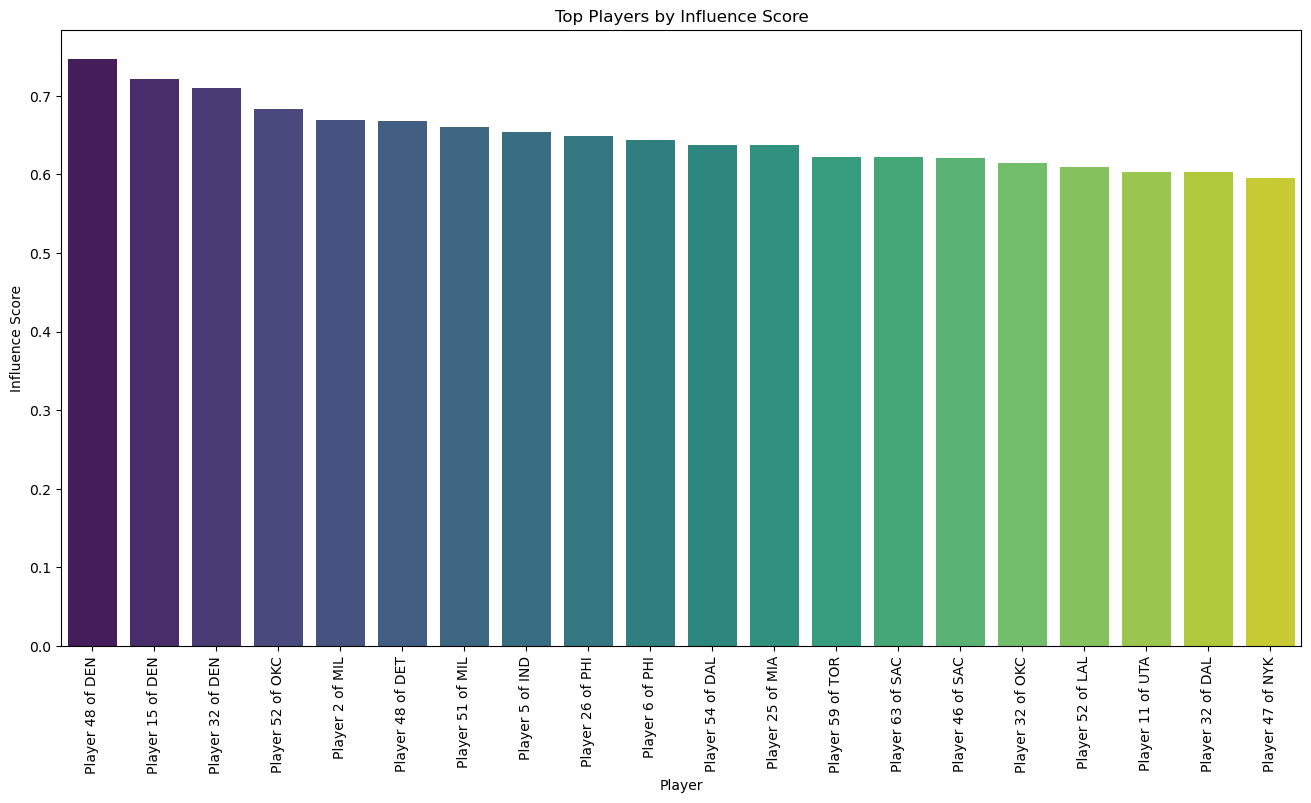

In [54]:


plt.figure(figsize=(16, 8))
sns.barplot(data=top_players, x='Player_Team', y='Influence_Score', palette='viridis')
plt.title('Top Players by Influence Score')
plt.xlabel('Player')
plt.ylabel('Influence Score')
plt.xticks(rotation=90)  # Rotate player names for better readability
plt.show()


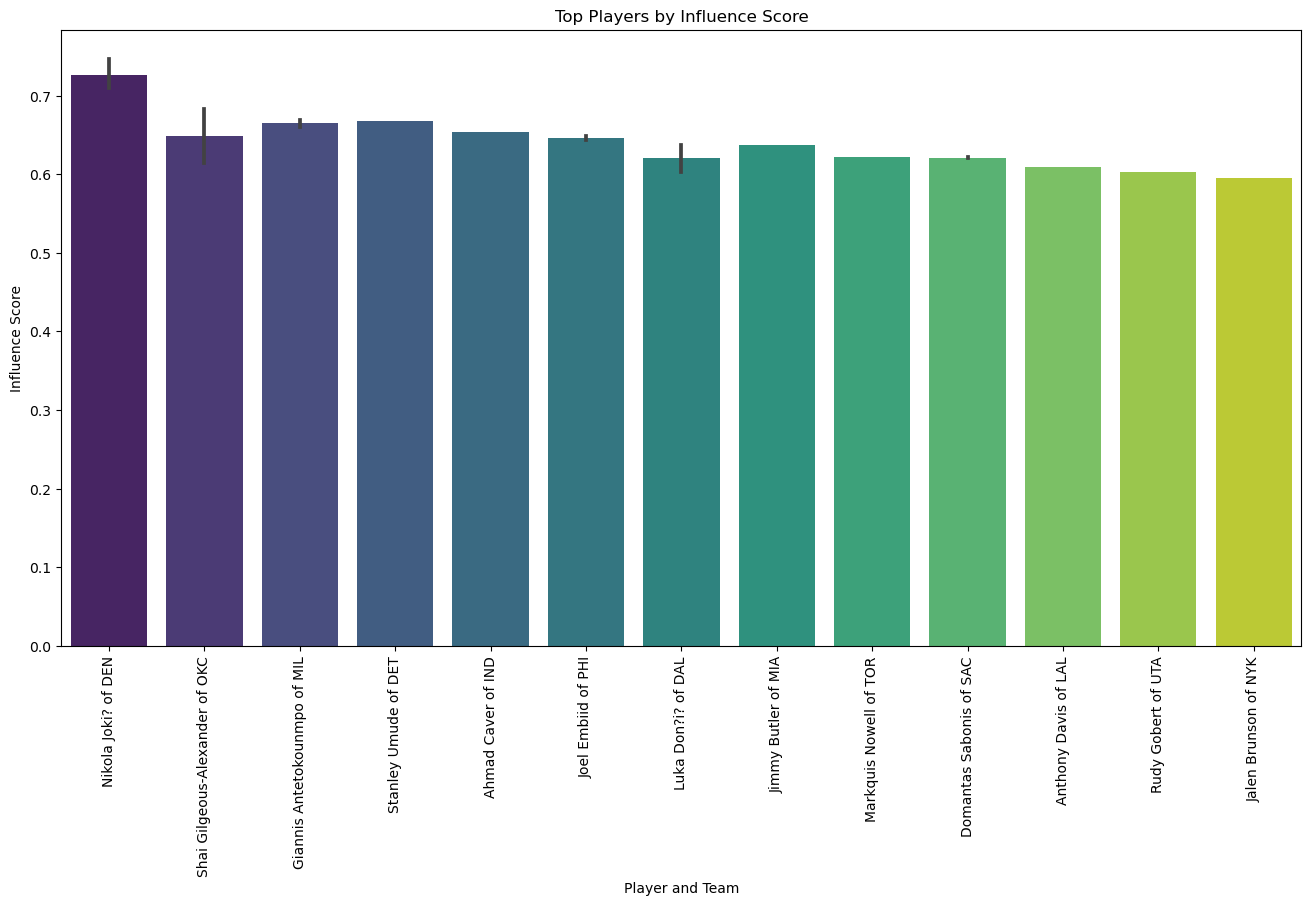

In [55]:
# Selecting key metrics to represent player influence
key_metrics = ['PER', 'WS', 'BPM']

# Normalizing the metrics for better comparison
scaler = MinMaxScaler()
merged_df[key_metrics] = scaler.fit_transform(merged_df[key_metrics])

# Creating a new column for average influence score
merged_df['Influence_Score'] = merged_df[key_metrics].mean(axis=1)

# Creating a new label column combining player name and team
merged_df['Player_Team'] = merged_df['Player'] + ' of ' + merged_df['Tm']

# Sorting the players by influence score
sorted_players = merged_df.sort_values(by='Influence_Score', ascending=False)

# Plotting the top players by influence score
top_n = 20  # Number of top players to display
top_players = sorted_players.head(top_n)

plt.figure(figsize=(16, 8))
sns.barplot(data=top_players, x='Player_Team', y='Influence_Score', palette='viridis')
plt.title('Top Players by Influence Score')
plt.xlabel('Player and Team')
plt.ylabel('Influence Score')
plt.xticks(rotation=90)  # Rotating player names for better readability
plt.show()

<H1> BUILDING MODELS 

<H1>  1. LOGISTIC REGRESSION

In [56]:
# Creating a win/loss column
# Marking it as win (1) if PTS > mean(PTS) for that year, else loss (0)
combined_stats_cleaned['Win'] = combined_stats_cleaned.groupby('Year')['PTS'].transform(lambda x: (x > x.mean()).astype(int))

# Displaying the first few rows to verify
print(combined_stats_cleaned.head())

    Rk                     Team     G     MP    FG   FGA    FG%    3P   3PA  \
0  1.0  Minnesota Timberwolves*  82.0  241.2  41.6  91.0  0.457  14.8  41.3   
1  2.0       Memphis Grizzlies*  82.0  241.2  43.5  94.4  0.461  11.5  32.7   
2  3.0         Milwaukee Bucks*  82.0  240.9  41.8  89.4  0.468  14.1  38.4   
3  4.0        Charlotte Hornets  82.0  242.4  42.8  91.4  0.468  13.9  38.2   
4  5.0            Phoenix Suns*  82.0  240.6  43.7  90.1  0.485  11.6  31.9   

     3P%  ...   TRB   AST  STL  BLK   TOV    PF    PTS  Type  Year  Win  
0  0.358  ...  44.2  25.7  8.8  5.6  14.3  21.8  115.9  Home  2021    1  
1  0.353  ...  49.2  26.0  9.8  6.5  13.2  19.8  115.6  Home  2021    1  
2  0.366  ...  46.7  23.9  7.6  4.0  13.4  18.2  115.5  Home  2021    1  
3  0.365  ...  44.6  28.1  8.6  4.9  13.3  19.9  115.3  Home  2021    1  
4  0.364  ...  45.3  27.4  8.6  4.4  12.9  19.9  114.8  Home  2021    1  

[5 rows x 28 columns]


In [57]:
#Displaying first 20 rows
combined_stats_cleaned.head(20)

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Type,Year,Win
0,1.0,Minnesota Timberwolves*,82.0,241.2,41.6,91.0,0.457,14.8,41.3,0.358,...,44.2,25.7,8.8,5.6,14.3,21.8,115.9,Home,2021,1
1,2.0,Memphis Grizzlies*,82.0,241.2,43.5,94.4,0.461,11.5,32.7,0.353,...,49.2,26.0,9.8,6.5,13.2,19.8,115.6,Home,2021,1
2,3.0,Milwaukee Bucks*,82.0,240.9,41.8,89.4,0.468,14.1,38.4,0.366,...,46.7,23.9,7.6,4.0,13.4,18.2,115.5,Home,2021,1
3,4.0,Charlotte Hornets,82.0,242.4,42.8,91.4,0.468,13.9,38.2,0.365,...,44.6,28.1,8.6,4.9,13.3,19.9,115.3,Home,2021,1
4,5.0,Phoenix Suns*,82.0,240.6,43.7,90.1,0.485,11.6,31.9,0.364,...,45.3,27.4,8.6,4.4,12.9,19.9,114.8,Home,2021,1
5,6.0,Atlanta Hawks*,82.0,240.3,41.5,88.3,0.470,12.9,34.4,0.374,...,44.0,24.6,7.2,4.2,11.9,18.7,113.9,Home,2021,1
6,7.0,Utah Jazz*,82.0,240.6,40.6,86.2,0.471,14.5,40.3,0.360,...,46.3,22.4,7.2,4.9,14.0,18.9,113.6,Home,2021,1
7,8.0,San Antonio Spurs,82.0,241.5,43.2,92.7,0.467,11.3,32.0,0.352,...,45.3,27.9,7.6,4.9,12.7,18.1,113.2,Home,2021,1
8,9.0,Brooklyn Nets*,82.0,240.9,42.0,88.4,0.475,11.5,31.7,0.361,...,44.4,25.3,7.1,5.5,14.1,20.4,112.9,Home,2021,1
9,10.0,Denver Nuggets*,82.0,241.5,41.7,86.3,0.483,12.7,35.9,0.353,...,44.1,27.8,7.2,3.7,14.5,20.0,112.7,Home,2021,1


In [58]:
#Displaying last 20 components
combined_stats_cleaned.tail(20)

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Type,Year,Win
165,11.0,Oklahoma City Thunder*,82.0,241.5,40.6,89.3,0.455,13.4,37.2,0.361,...,44.7,26.9,7.1,5.1,15.7,18.9,112.7,Visitor,2023,0
166,12.0,Memphis Grizzlies,82.0,241.2,41.2,86.9,0.474,13.4,35.4,0.378,...,45.6,26.6,8.1,6.5,15.1,18.8,112.8,Visitor,2023,0
167,13.0,Houston Rockets,82.0,242.1,40.8,88.1,0.463,12.3,35.4,0.348,...,44.9,24.4,7.3,5.9,13.8,19.6,113.2,Visitor,2023,0
168,14.0,Phoenix Suns*,82.0,241.2,42.0,90.6,0.464,13.1,36.0,0.364,...,41.3,26.3,8.4,4.5,12.7,19.7,113.2,Visitor,2023,0
169,15.0,Brooklyn Nets,82.0,241.5,41.6,88.5,0.470,13.0,34.9,0.372,...,44.3,25.5,6.9,5.0,12.6,18.2,113.3,Visitor,2023,0
170,16.0,Chicago Bulls,82.0,243.7,41.1,87.0,0.473,14.6,39.5,0.370,...,43.4,27.9,6.8,4.9,14.0,18.8,113.7,Visitor,2023,0
171,17.0,Sacramento Kings,82.0,242.1,41.6,86.8,0.480,13.1,33.8,0.387,...,42.5,26.9,7.4,4.5,13.9,18.3,114.8,Visitor,2023,1
172,18.0,Golden State Warriors,82.0,241.8,42.1,90.4,0.466,13.3,37.0,0.359,...,42.9,26.7,7.7,5.0,13.0,17.9,115.2,Visitor,2023,1
173,19.0,Portland Trail Blazers,82.0,242.4,42.5,86.6,0.491,11.7,33.3,0.351,...,43.8,27.1,8.9,6.4,14.3,17.9,115.4,Visitor,2023,1
174,20.0,Dallas Mavericks*,82.0,240.3,43.0,90.4,0.475,13.1,35.6,0.368,...,45.1,27.5,7.4,4.0,13.7,20.3,115.6,Visitor,2023,1


Training Accuracy: 0.70
Validation Accuracy: 0.70
Test Accuracy: 0.67
Cross-validation Scores: [0.73076923 0.44       0.68       0.68       0.8       ]
Mean Cross-validation Score: 0.67
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.70      0.58      0.64        12

    accuracy                           0.70        27
   macro avg       0.70      0.69      0.69        27
weighted avg       0.70      0.70      0.70        27

Test Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.72      0.76      0.74        17

    accuracy                           0.67        27
   macro avg       0.64      0.63      0.63        27
weighted avg       0.66      0.67      0.66        27

Validation Confusion Matrix:
[[12  3]
 [ 5  7]]
Test Confusion Matrix:
[[ 5  5]
 [ 4 13]]


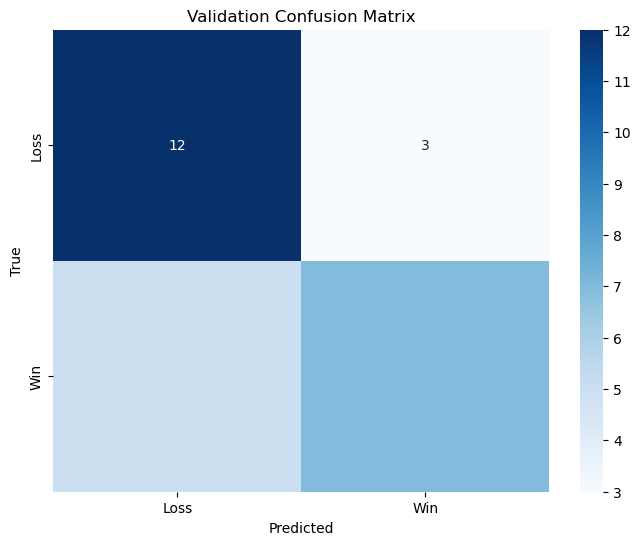

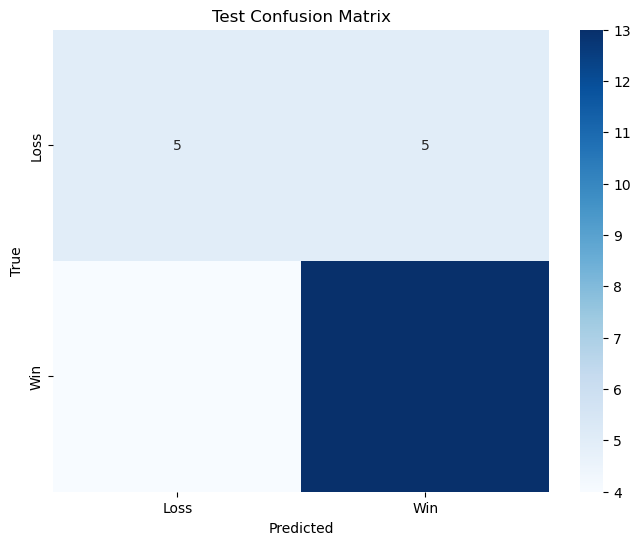

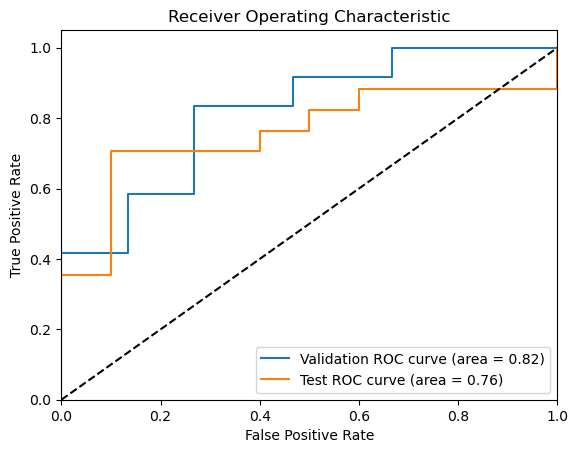

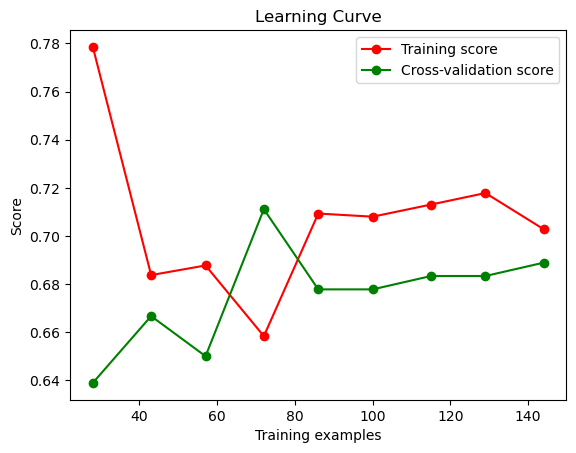

In [59]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Defining features and target variable
features = ['MP', 'FG%', '3P%', '2PA', 'FT', 'FT%', 'DRB', 'TOV', 'PF']
target = 'Win'

# Separating features and target from the dataset
X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

# Splitting the data into training (70%) and remaining (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further splitting the remaining data into validation (15%) and testing (15%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initializing the logistic regression model
logistic_regression = LogisticRegression()

# Training the model
logistic_regression.fit(X_train, y_train)

# Making predictions on the training set
y_train_pred = logistic_regression.predict(X_train)

# Calculating the accuracy of the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Making predictions on the validation set
y_val_pred = logistic_regression.predict(X_val)

# Calculating the accuracy of the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Making predictions on the test set
y_test_pred = logistic_regression.predict(X_test)

# Calculating the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Performing cross-validation and calculating scores
cross_val_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation Scores: {cross_val_scores}')
print(f'Mean Cross-validation Score: {cross_val_scores.mean():.2f}')

# Generating the classification report for the validation set
val_classification_report = classification_report(y_val, y_val_pred)
print(f'Validation Classification Report:\n{val_classification_report}')

# Generating the classification report for the test set
test_classification_report = classification_report(y_test, y_test_pred)
print(f'Test Classification Report:\n{test_classification_report}')

# Confusion matrix for validation set
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)
print(f'Validation Confusion Matrix:\n{val_confusion_matrix}')

# Confusion matrix for test set
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(f'Test Confusion Matrix:\n{test_confusion_matrix}')

# Plotting the confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting the confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculating the ROC AUC score and plotting the ROC curve for the validation set
val_roc_auc = roc_auc_score(y_val, logistic_regression.predict_proba(X_val)[:, 1])
fpr_val, tpr_val, _ = roc_curve(y_val, logistic_regression.predict_proba(X_val)[:, 1])

# Calculating the ROC AUC score and plotting the ROC curve for the test set
test_roc_auc = roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_val, tpr_val, label=f'Validation ROC curve (area = {val_roc_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plotting the learning curve
train_sizes, train_scores, val_scores = learning_curve(logistic_regression, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


<H1> Hyperparameter Tunning

Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Training Accuracy with Best Model: 0.78
Validation Accuracy with Best Model: 0.78
Validation Classification Report with Best Model:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.80      0.67      0.73        12

    accuracy                           0.78        27
   macro avg       0.78      0.77      0.77        27
weighted avg       0.78      0.78      0.77        27

Test Accuracy with Best Model: 0.74
Test Classification Report with Best Model:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.81      0.76      0.79        17

    accuracy                           0.74        27
   macro avg       0.72      0.73      0.73        27
weighted avg       0.75      0.74      0.74        27

Validation Confusion Matrix:
[[13  2]
 [ 4  8]]
T

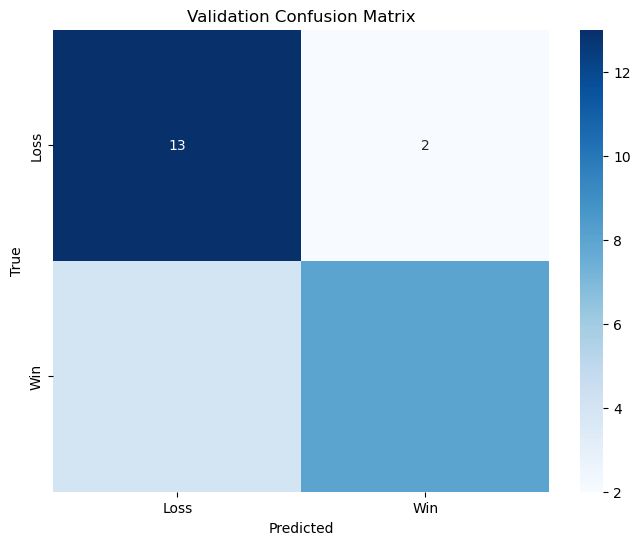

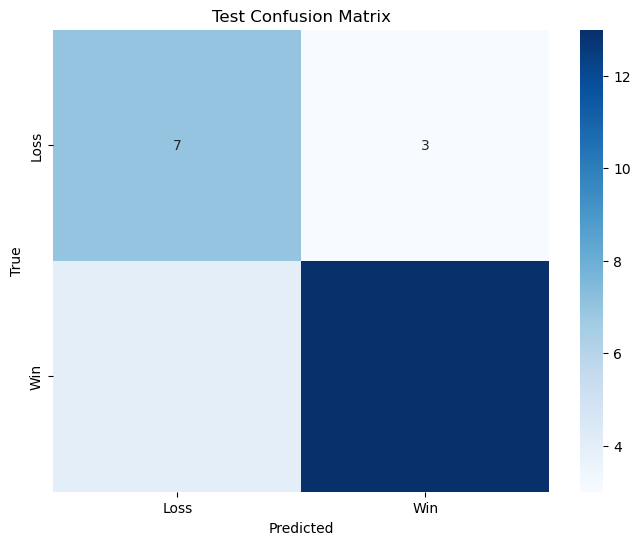

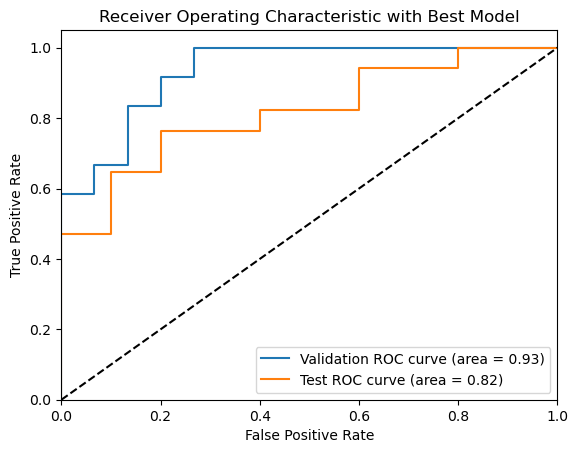

Cross-validation Scores: [0.73076923 0.48       0.76       0.64       0.96      ]
Mean Cross-validation Score: 0.71


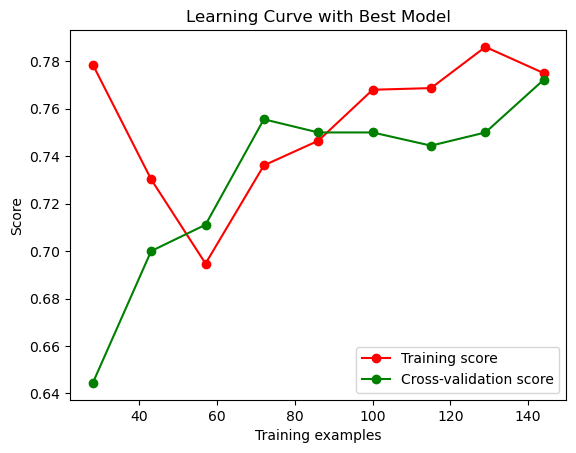

In [60]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Defining features and target variable
features = ['MP', 'FG%', '3P%', '2PA', 'FT', 'FT%', 'DRB', 'TOV', 'PF']
target = 'Win'

# Separating features and target from the dataset
X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

# Splitting the data into training (70%) and remaining (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further splitting the remaining data into validation (15%) and testing (15%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Defining the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2'],  # 'l2' is the default penalty, 'l1' is not supported by 'lbfgs'
    'max_iter': [100, 200, 300]
}

# Initializing the logistic regression model
logistic_regression = LogisticRegression()

# Initializing GridSearchCV with the logistic regression model and parameter grid
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')

# Fitting GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Extracting the best model
best_model = grid_search.best_estimator_

# Printing the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Calculating the training accuracy with the best model
y_train_pred_best = best_model.predict(X_train)
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
print(f'Training Accuracy with Best Model: {train_accuracy_best:.2f}')

# Evaluating the best model on the validation set
y_val_pred_best = best_model.predict(X_val)
val_accuracy_best = accuracy_score(y_val, y_val_pred_best)
print(f'Validation Accuracy with Best Model: {val_accuracy_best:.2f}')

# Generating the classification report for the validation set with the best model
val_classification_report_best = classification_report(y_val, y_val_pred_best)
print(f'Validation Classification Report with Best Model:\n{val_classification_report_best}')

# Making predictions on the test set with the best model
y_test_pred_best = best_model.predict(X_test)

# Calculating the accuracy of the best model on the test set
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
print(f'Test Accuracy with Best Model: {test_accuracy_best:.2f}')

# Generating the classification report for the test set with the best model
test_classification_report_best = classification_report(y_test, y_test_pred_best)
print(f'Test Classification Report with Best Model:\n{test_classification_report_best}')

# Confusion matrix for validation set
val_confusion_matrix = confusion_matrix(y_val, y_val_pred_best)
print(f'Validation Confusion Matrix:\n{val_confusion_matrix}')

# Confusion matrix for test set
test_confusion_matrix = confusion_matrix(y_test, y_test_pred_best)
print(f'Test Confusion Matrix:\n{test_confusion_matrix}')

# Plotting the confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting the confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculating the ROC AUC score and plotting the ROC curve for the validation set with the best model
val_roc_auc_best = roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1])
fpr_val_best, tpr_val_best, _ = roc_curve(y_val, best_model.predict_proba(X_val)[:, 1])

# Calculating the ROC AUC score and plotting the ROC curve for the test set with the best model
test_roc_auc_best = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
fpr_test_best, tpr_test_best, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_val_best, tpr_val_best, label=f'Validation ROC curve (area = {val_roc_auc_best:.2f})')
plt.plot(fpr_test_best, tpr_test_best, label=f'Test ROC curve (area = {test_roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with Best Model')
plt.legend(loc='lower right')
plt.show()

# Performing cross-validation and calculating scores
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation Scores: {cross_val_scores}')
print(f'Mean Cross-validation Score: {cross_val_scores.mean():.2f}')

# Plotting the learning curve for the best model
train_sizes_best, train_scores_best, val_scores_best = learning_curve(best_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean_best = np.mean(train_scores_best, axis=1)
val_scores_mean_best = np.mean(val_scores_best, axis=1)

plt.figure()
plt.plot(train_sizes_best, train_scores_mean_best, 'o-', color='r', label='Training score')
plt.plot(train_sizes_best, val_scores_mean_best, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve with Best Model')
plt.legend(loc='best')
plt.show()


In [61]:
X_test

,MP,FG%,3P%,2PA,FT,FT%,DRB,TOV,PF
57,241.8,0.457,0.330,57.9,17.6,0.749,33.5,14.2,20.3
118,242.4,0.466,0.362,51.4,16.9,0.763,35.6,15.0,19.6
174,240.3,0.475,0.368,54.8,16.6,0.770,34.1,13.7,20.3
71,241.2,0.493,0.382,53.6,18.9,0.808,33.9,14.9,18.0
166,241.2,0.474,0.378,51.5,17.0,0.779,35.0,15.1,18.8
15,241.5,0.460,0.344,54.9,17.9,0.768,33.4,14.1,18.9
129,241.2,0.466,0.357,53.9,20.1,0.786,32.6,14.4,19.9
2,240.9,0.468,0.366,51.0,17.8,0.776,36.5,13.4,18.2
80,240.6,0.465,0.369,52.9,17.0,0.780,32.5,13.2,17.6
144,241.8,0.469,0.364,55.0,19.4,0.769,32.6,14.3,18.4


In [62]:
#checking the data instances for test set
X_test.shape

(27, 9)

In [63]:
X_train

,MP,FG%,3P%,2PA,FT,FT%,DRB,TOV,PF
47,241.2,0.467,0.374,57.5,17.2,0.793,32.4,13.5,21.2
87,240.9,0.465,0.370,51.9,18.0,0.818,33.0,12.7,17.3
157,241.2,0.474,0.358,51.8,17.3,0.780,30.9,15.0,20.9
84,241.8,0.462,0.347,54.3,15.6,0.782,33.9,15.1,17.2
151,240.9,0.482,0.374,49.3,19.2,0.794,31.0,13.2,20.6
...,...,...,...,...,...,...,...,...,...
73,240.3,0.489,0.381,53.5,18.3,0.825,32.9,13.1,18.5
109,240.6,0.474,0.366,55.5,17.4,0.795,33.9,13.1,18.2
14,240.6,0.469,0.364,47.0,15.6,0.769,35.7,14.9,21.0
95,240.6,0.438,0.339,50.6,17.4,0.759,33.0,14.5,18.0


In [64]:
#checking for data instances for train set

X_train.shape

(126, 9)

In [65]:
X_val

,MP,FG%,3P%,2PA,FT,FT%,DRB,TOV,PF
164,240.3,0.468,0.363,53.5,16.2,0.775,31.1,13.0,18.7
19,242.1,0.445,0.349,57.1,16.2,0.759,32.0,12.5,19.6
39,241.8,0.473,0.368,50.1,16.6,0.743,37.5,14.6,18.1
18,240.9,0.456,0.349,47.7,17.5,0.713,32.4,16.5,20.6
56,241.2,0.470,0.346,55.2,19.6,0.784,33.1,15.1,20.1
12,240.6,0.480,0.369,58.1,17.5,0.813,33.7,12.8,18.8
178,241.8,0.487,0.373,58.3,16.0,0.784,34.8,13.4,17.9
93,242.7,0.434,0.339,53.2,16.1,0.783,33.3,13.8,19.4
43,241.8,0.490,0.365,54.1,17.9,0.755,32.8,15.3,21.6
124,242.4,0.468,0.368,52.9,17.5,0.782,31.5,15.7,20.4


In [66]:
#checking for data instances for validation set

X_val.shape

(27, 9)

<H1> 2.  RANDOM FOREST MODEL

Training Accuracy: 1.00
Validation Accuracy: 0.70
Test Accuracy: 0.74
Cross-validation scores: [0.80769231 0.84       0.88       0.76       0.76      ]
Average cross-validation score: 0.81
Confusion Matrix (Validation):
[[ 9  5]
 [ 3 10]]
Confusion Matrix (Test):
[[ 8  6]
 [ 1 12]]
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.67      0.77      0.71        13

    accuracy                           0.70        27
   macro avg       0.71      0.71      0.70        27
weighted avg       0.71      0.70      0.70        27

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.67      0.92      0.77        13

    accuracy                           0.74        27
   macro avg       0.78      0.75      0.73        27
weighted avg       0.78      0.74      0.73        2

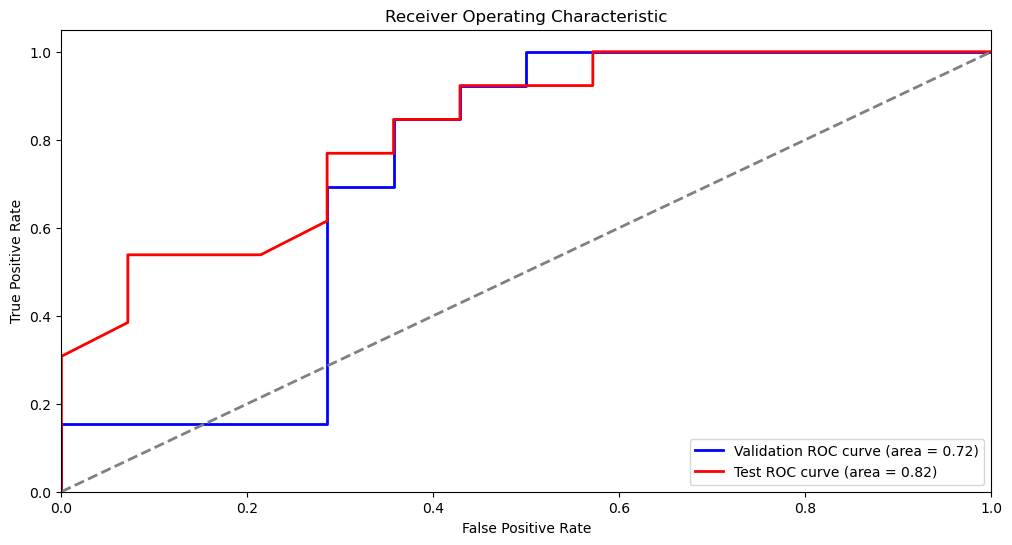

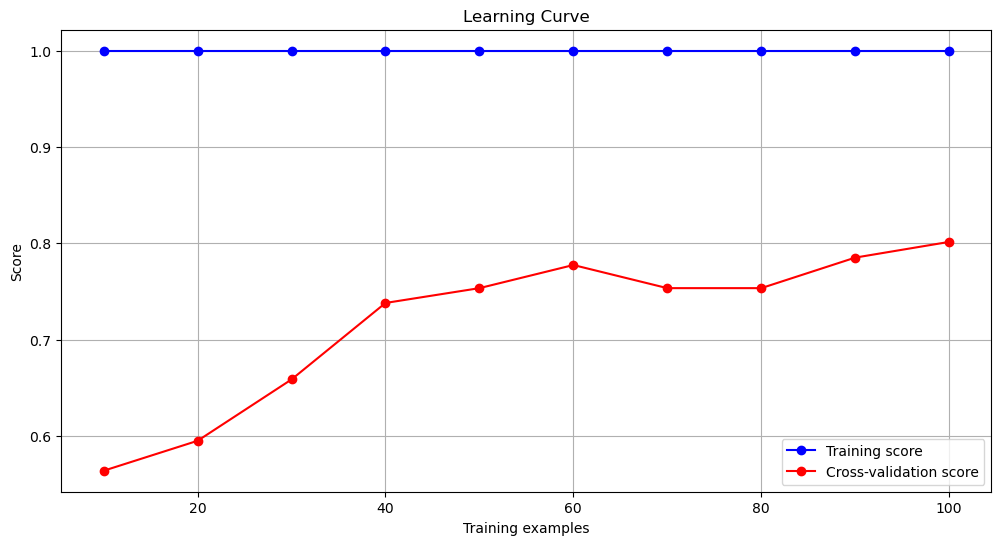

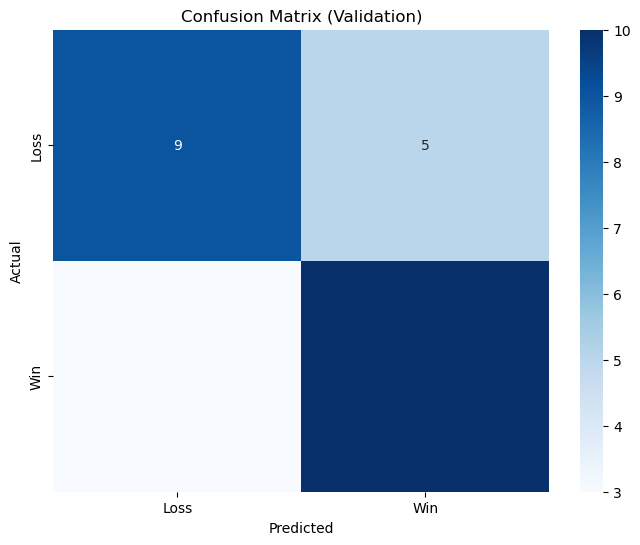

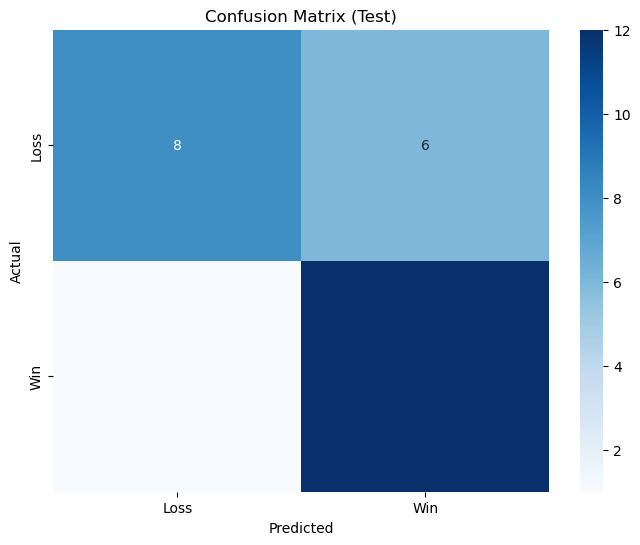

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_stats_cleaned is already defined
features = ['MP', 'FG%', '3P%', '2PA', 'FT', 'FT%', 'DRB', 'TOV', 'PF']
target = 'Win'

X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

# Splitting the dataset: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Training the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Predicting and evaluating on validation and test sets
y_val_pred = random_forest.predict(X_val_scaled)
y_test_pred = random_forest.predict(X_test_scaled)

# Accuracy scores
train_accuracy = accuracy_score(y_train, random_forest.predict(X_train_scaled))
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Validation Accuracy: {val_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Cross-validation scores
cross_val_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=5)
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Average cross-validation score: {np.mean(cross_val_scores):.2f}')

# Confusion matrix
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix (Validation):')
print(conf_matrix_val)
print('Confusion Matrix (Test):')
print(conf_matrix_test)

# Classification report
class_report_val = classification_report(y_val, y_val_pred)
class_report_test = classification_report(y_test, y_test_pred)
print('Classification Report (Validation):')
print(class_report_val)
print('Classification Report (Test):')
print(class_report_test)

# ROC AUC curve
fpr_val, tpr_val, _ = roc_curve(y_val, random_forest.predict_proba(X_val_scaled)[:,1])
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, random_forest.predict_proba(X_test_scaled)[:,1])
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(12, 6))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(random_forest, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plotting the confusion matrix for validation set
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

# Plotting the confusion matrix for test set
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test)')
plt.show()


<H1> Hyperparameter Tunning

a)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Training Accuracy: 1.00
Validation Accuracy: 0.70
Test Accuracy: 0.74
Cross-validation scores: [0.80769231 0.84       0.88       0.76       0.76      ]
Average cross-validation score: 0.81
Confusion Matrix (Validation):
[[ 9  5]
 [ 3 10]]
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.67      0.77      0.71        13

    accuracy                           0.70        27
   macro avg       0.71      0.71      0.70        27
weighted avg       0.71      0.70      0.70        27



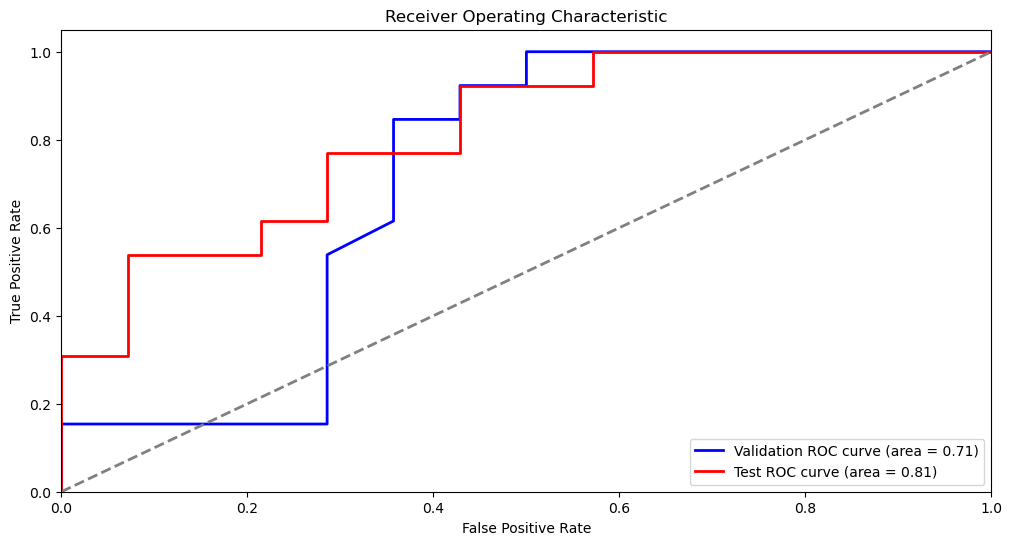

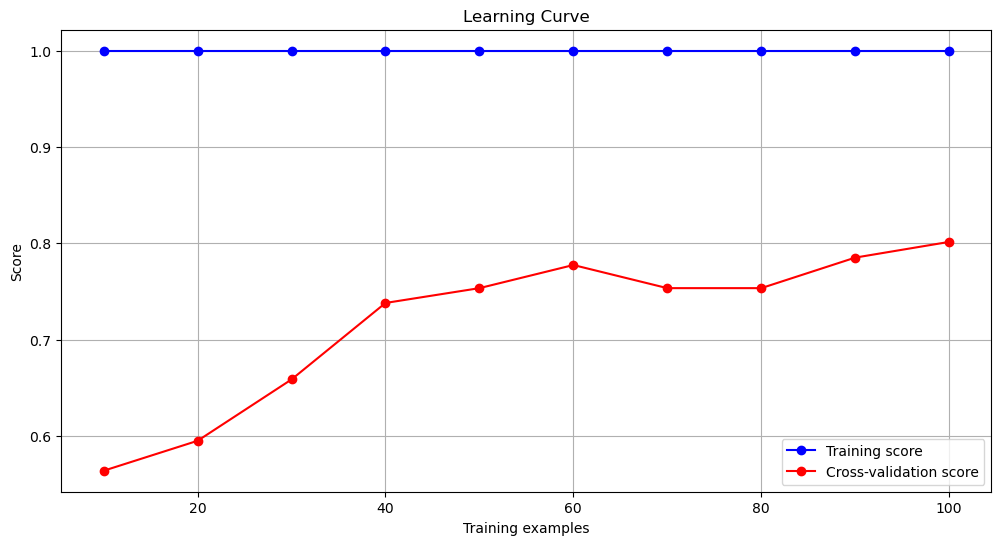

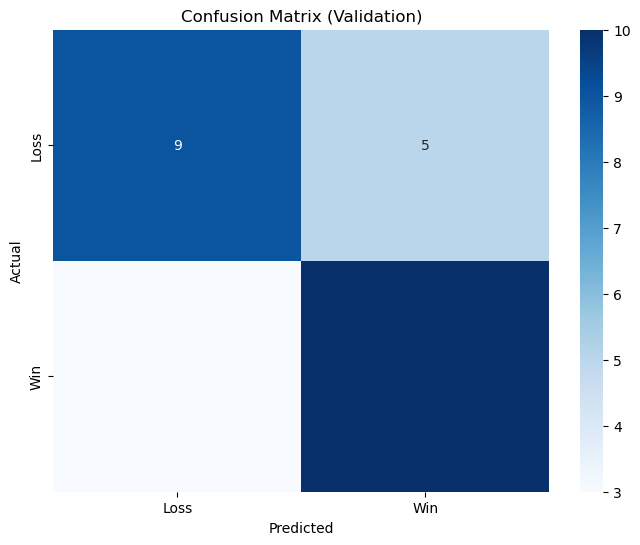

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_stats_cleaned is already defined
features = ['MP', 'FG%', '3P%', '2PA', 'FT', 'FT%', 'DRB', 'TOV', 'PF']
target = 'Win'

X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

# Splitting the dataset: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train_scaled, y_train)

# Best estimator from grid search
best_rf = grid_search.best_estimator_

# Predicting and evaluating on validation and test sets
y_val_pred = best_rf.predict(X_val_scaled)
y_test_pred = best_rf.predict(X_test_scaled)

# Accuracy scores
train_accuracy = accuracy_score(y_train, best_rf.predict(X_train_scaled))
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Validation Accuracy: {val_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Cross-validation scores
cross_val_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5)
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Average cross-validation score: {np.mean(cross_val_scores):.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix (Validation):')
print(conf_matrix)

# Classification report
class_report = classification_report(y_val, y_val_pred)
print('Classification Report (Validation):')
print(class_report)

# ROC AUC curve
fpr_val, tpr_val, _ = roc_curve(y_val, best_rf.predict_proba(X_val_scaled)[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, best_rf.predict_proba(X_test_scaled)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(12, 6))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(best_rf, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()


b)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training Accuracy: 1.00
Validation Accuracy: 0.70
Test Accuracy: 0.70
Cross-validation scores: [0.80769231 0.8        0.88       0.72       0.76      ]
Average cross-validation score: 0.79
Confusion Matrix (Validation):
[[ 9  5]
 [ 3 10]]
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.67      0.77      0.71        13

    accuracy                           0.70        27
   macro avg       0.71      0.71      0.70        27
weighted avg       0.71      0.70      0.70        27



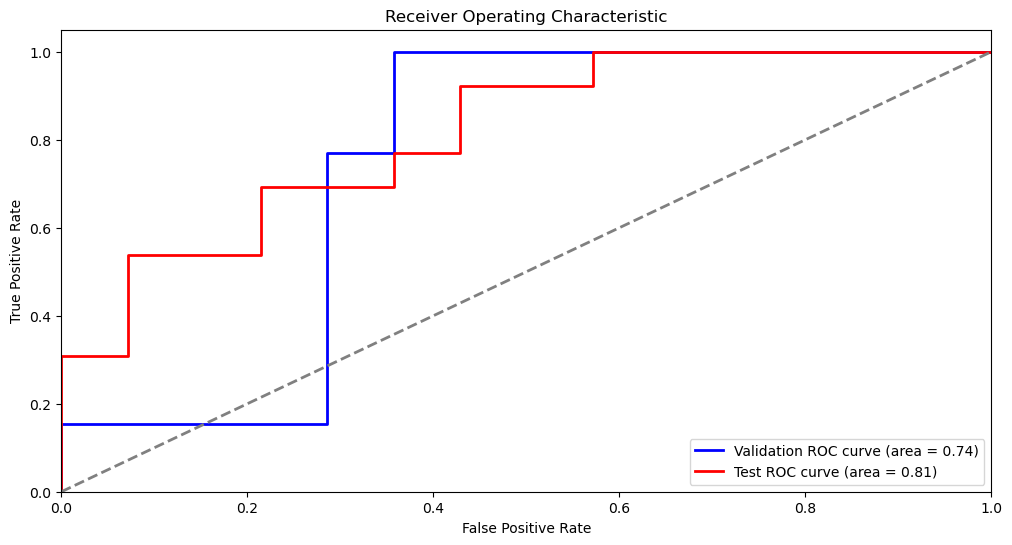

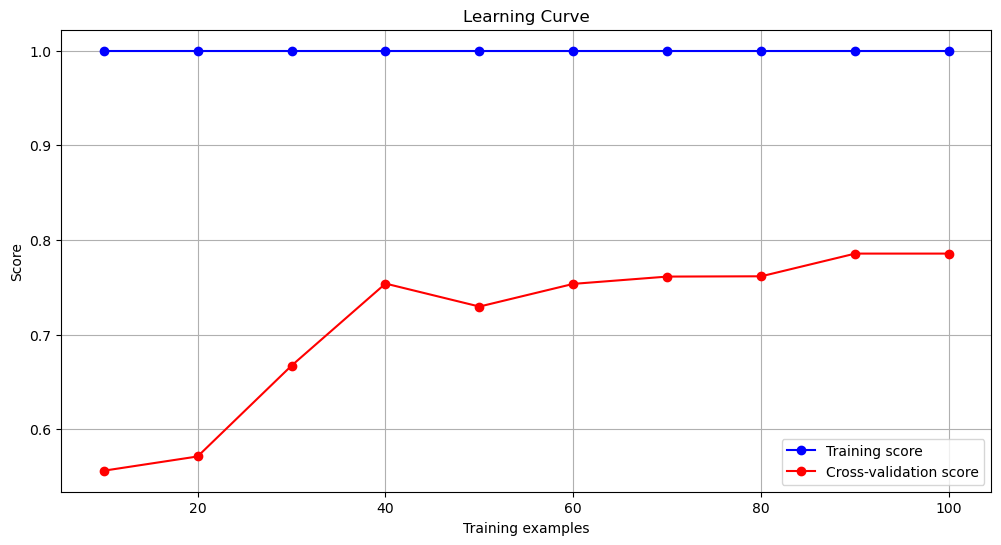

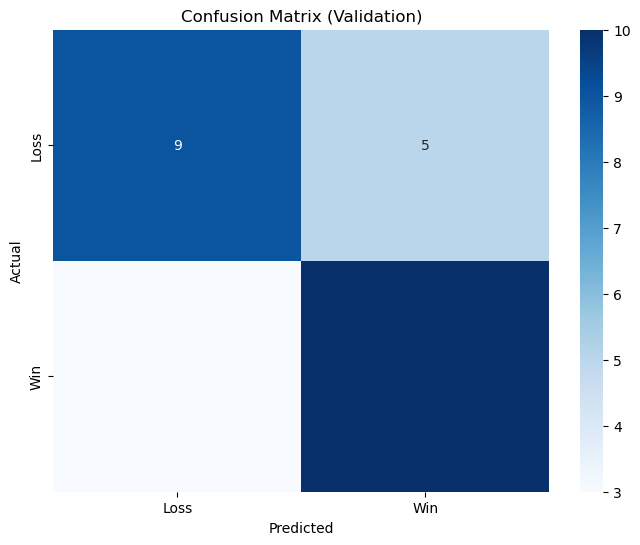

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# Assuming combined_stats_cleaned is already defined
features = ['MP', 'FG%', '3P%', '2PA', 'FT', 'FT%', 'DRB', 'TOV', 'PF']
target = 'Win'

X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

# Splitting the dataset: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning with RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   cv=5,
                                   verbose=2,
                                   n_jobs=-1,
                                   random_state=42)

random_search.fit(X_train_scaled, y_train)

# Best estimator from random search
best_rf = random_search.best_estimator_

# Predicting and evaluating on validation and test sets
y_val_pred = best_rf.predict(X_val_scaled)
y_test_pred = best_rf.predict(X_test_scaled)

# Accuracy scores
train_accuracy = accuracy_score(y_train, best_rf.predict(X_train_scaled))
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Validation Accuracy: {val_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Cross-validation scores
cross_val_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5)
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Average cross-validation score: {np.mean(cross_val_scores):.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix (Validation):')
print(conf_matrix)

# Classification report
class_report = classification_report(y_val, y_val_pred)
print('Classification Report (Validation):')
print(class_report)

# ROC AUC curve
fpr_val, tpr_val, _ = roc_curve(y_val, best_rf.predict_proba(X_val_scaled)[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, best_rf.predict_proba(X_test_scaled)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(12, 6))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(best_rf, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()


c)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training Accuracy: 1.00
Validation Accuracy: 0.70
Test Accuracy: 0.70
Cross-validation scores: [0.80769231 0.8        0.88       0.72       0.76      ]
Average cross-validation score: 0.79
Confusion Matrix (Validation):
[[ 9  5]
 [ 3 10]]
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.67      0.77      0.71        13

    accuracy                           0.70        27
   macro avg       0.71      0.71      0.70        27
weighted avg       0.71      0.70      0.70        27



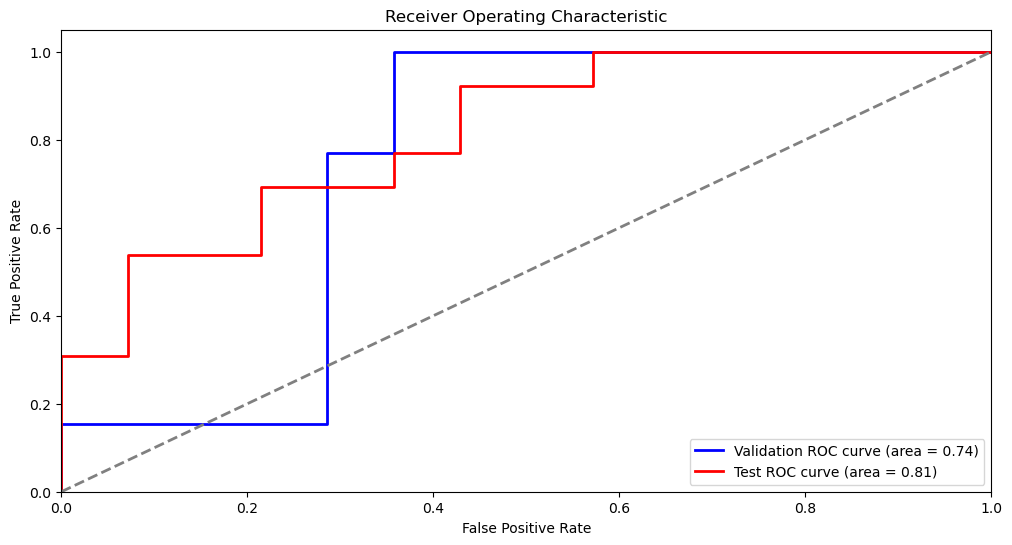

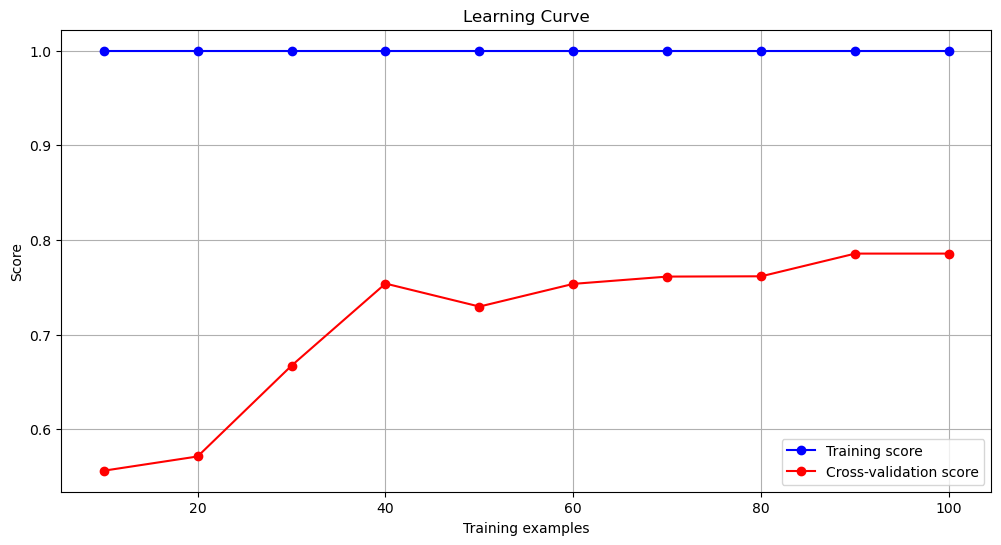

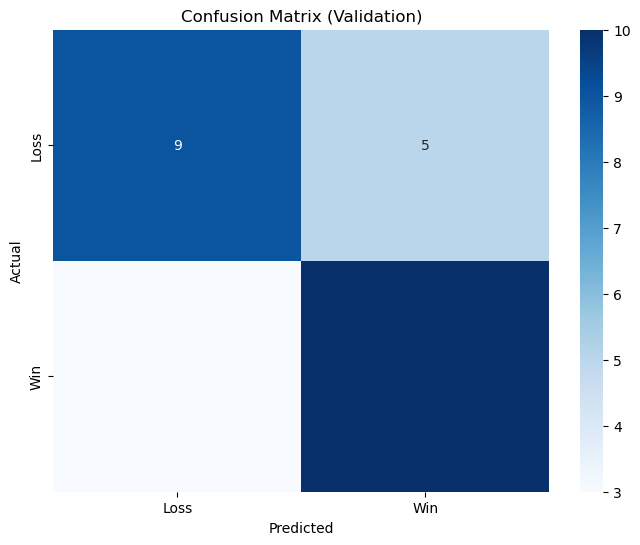

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# Assuming combined_stats_cleaned is already defined
features = ['MP', 'FG%', '3P%', '2PA', 'FT', 'FT%', 'DRB', 'TOV', 'PF']
target = 'Win'

X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

# Splitting the dataset: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning with RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   cv=5,
                                   verbose=2,
                                   n_jobs=-1,
                                   random_state=42)

random_search.fit(X_train_scaled, y_train)

# Best estimator from random search
best_rf = random_search.best_estimator_

# Predicting and evaluating on validation and test sets
y_val_pred = best_rf.predict(X_val_scaled)
y_test_pred = best_rf.predict(X_test_scaled)

# Accuracy scores
train_accuracy = accuracy_score(y_train, best_rf.predict(X_train_scaled))
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Validation Accuracy: {val_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Cross-validation scores
cross_val_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5)
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Average cross-validation score: {np.mean(cross_val_scores):.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix (Validation):')
print(conf_matrix)

# Classification report
class_report = classification_report(y_val, y_val_pred)
print('Classification Report (Validation):')
print(class_report)

# ROC AUC curve
fpr_val, tpr_val, _ = roc_curve(y_val, best_rf.predict_proba(X_val_scaled)[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, best_rf.predict_proba(X_test_scaled)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(12, 6))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(best_rf, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()


d)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training Accuracy: 0.95
Validation Accuracy: 0.74
Test Accuracy: 0.74
Cross-validation scores: [0.80769231 0.8        0.88       0.68       0.76      ]
Average cross-validation score: 0.79
Confusion Matrix (Validation):
[[10  4]
 [ 3 10]]
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.71      0.77      0.74        13

    accuracy                           0.74        27
   macro avg       0.74      0.74      0.74        27
weighted avg       0.74      0.74      0.74        27



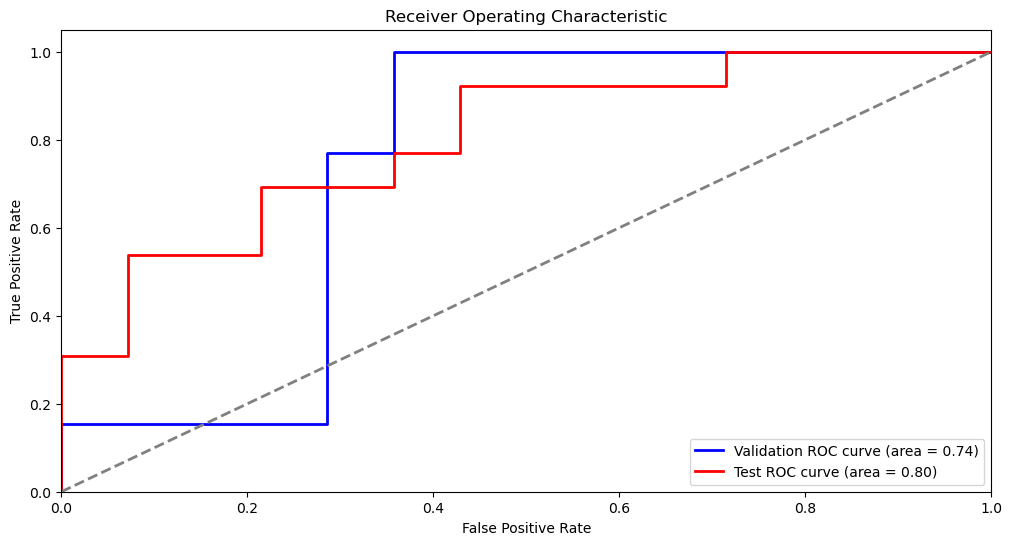

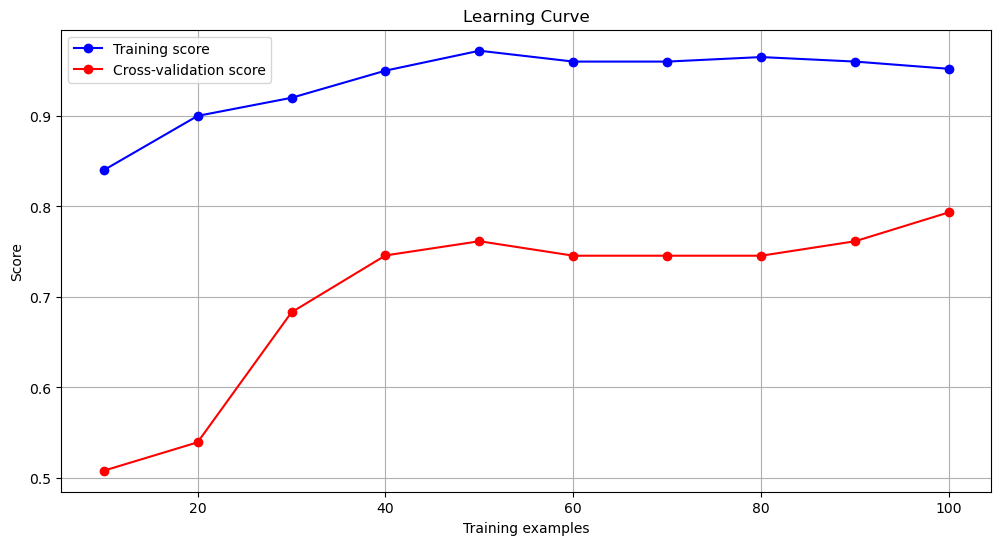

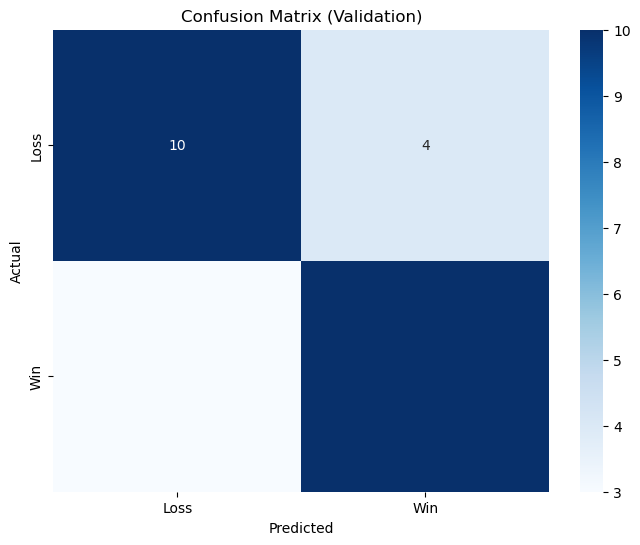

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# Assuming combined_stats_cleaned is already defined
features = ['MP', 'FG%', '3P%', '2PA', 'FT', 'FT%', 'DRB', 'TOV', 'PF']
target = 'Win'

X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

# Splitting the dataset: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning with RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   cv=5,
                                   verbose=2,
                                   n_jobs=-1,
                                   random_state=42)

random_search.fit(X_train_scaled, y_train)

# Best estimator from random search
best_rf = random_search.best_estimator_

# Predicting and evaluating on validation and test sets
y_val_pred = best_rf.predict(X_val_scaled)
y_test_pred = best_rf.predict(X_test_scaled)

# Accuracy scores
train_accuracy = accuracy_score(y_train, best_rf.predict(X_train_scaled))
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Validation Accuracy: {val_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Cross-validation scores
cross_val_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5)
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Average cross-validation score: {np.mean(cross_val_scores):.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix (Validation):')
print(conf_matrix)

# Classification report
class_report = classification_report(y_val, y_val_pred)
print('Classification Report (Validation):')
print(class_report)

# ROC AUC curve
fpr_val, tpr_val, _ = roc_curve(y_val, best_rf.predict_proba(X_val_scaled)[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, best_rf.predict_proba(X_test_scaled)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(12, 6))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(best_rf, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()


e)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training Accuracy: 0.87
Validation Accuracy: 0.70
Test Accuracy: 0.70
Cross-validation scores: [0.84615385 0.84       0.84       0.68       0.72      ]
Average cross-validation score: 0.79
Confusion Matrix (Validation):
[[10  4]
 [ 4  9]]
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.69      0.69      0.69        13

    accuracy                           0.70        27
   macro avg       0.70      0.70      0.70        27
weighted avg       0.70      0.70      0.70        27



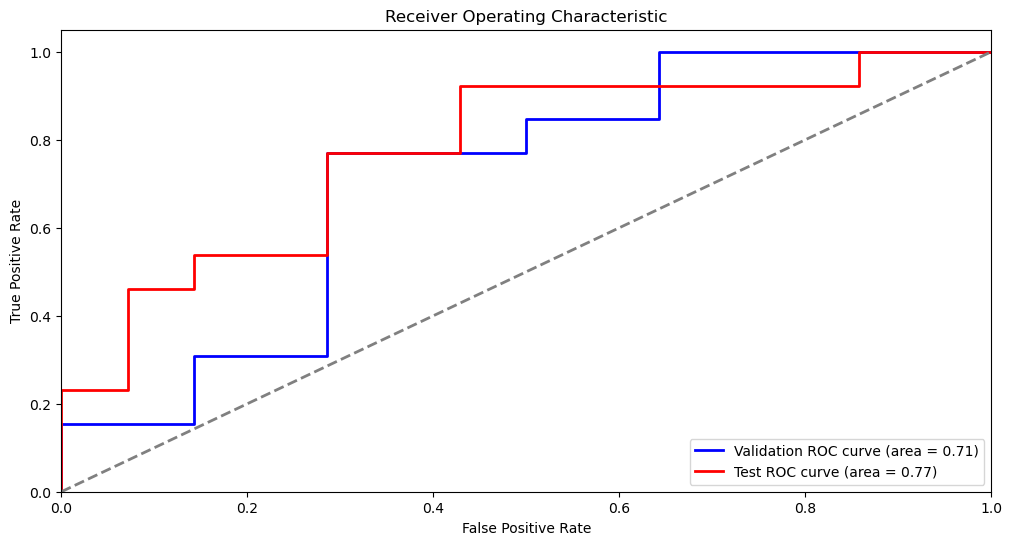

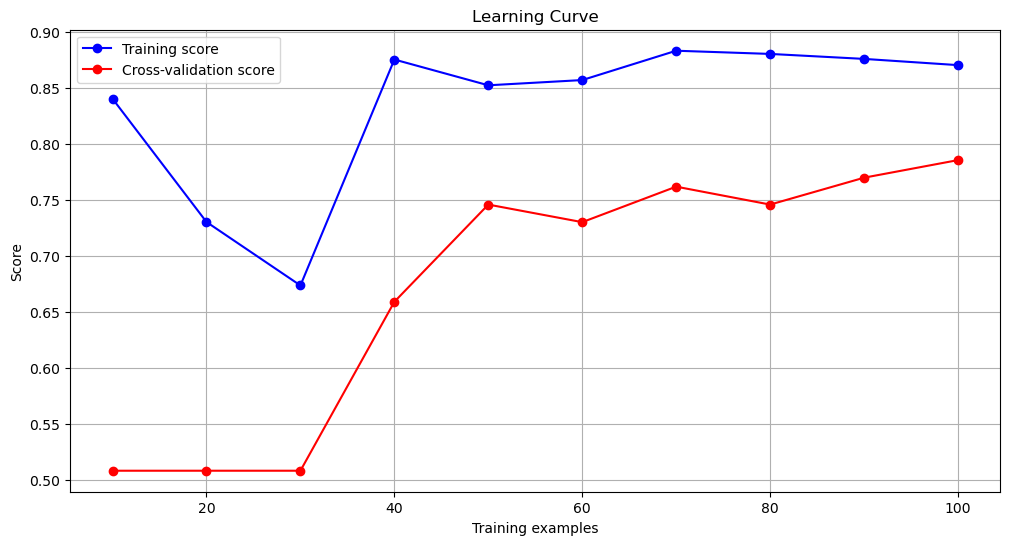

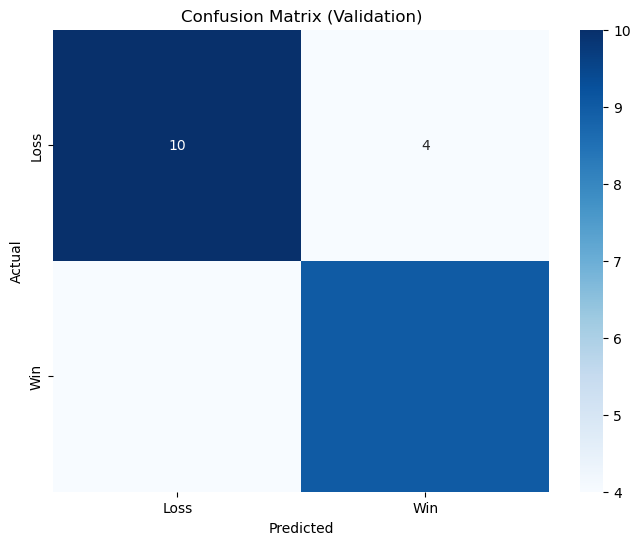

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# Assuming combined_stats_cleaned is already defined
features = ['MP', 'FG%', '3P%', '2PA', 'FT', 'FT%', 'DRB', 'TOV', 'PF']
target = 'Win'

X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

# Splitting the dataset: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning with RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(50, 200),  # Reduced number of trees
    'max_depth': [None, 5, 10, 15],  # Limited depth
    'min_samples_split': randint(10, 30),  # Increased minimum samples to split
    'min_samples_leaf': randint(5, 20),  # Increased minimum samples per leaf
    'max_features': ['sqrt', 'log2', None],  # Restricting features considered at each split
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   cv=5,
                                   verbose=2,
                                   n_jobs=-1,
                                   random_state=42)

random_search.fit(X_train_scaled, y_train)

# Best estimator from random search
best_rf = random_search.best_estimator_

# Predicting and evaluating on validation and test sets
y_val_pred = best_rf.predict(X_val_scaled)
y_test_pred = best_rf.predict(X_test_scaled)

# Accuracy scores
train_accuracy = accuracy_score(y_train, best_rf.predict(X_train_scaled))
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Validation Accuracy: {val_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Cross-validation scores
cross_val_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5)
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Average cross-validation score: {np.mean(cross_val_scores):.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix (Validation):')
print(conf_matrix)

# Classification report
class_report = classification_report(y_val, y_val_pred)
print('Classification Report (Validation):')
print(class_report)

# ROC AUC curve
fpr_val, tpr_val, _ = roc_curve(y_val, best_rf.predict_proba(X_val_scaled)[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, best_rf.predict_proba(X_test_scaled)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(12, 6))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(best_rf, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()


<h1> Main Hyperparameter Tunning

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training Accuracy: 0.78
Validation Accuracy: 0.63
Test Accuracy: 0.67
Cross-validation scores: [0.84615385 0.88       0.8        0.72       0.68      ]
Average cross-validation score: 0.79
Confusion Matrix (Validation):
[[ 7  7]
 [ 3 10]]
Confusion Matrix (Test):
[[ 7  7]
 [ 2 11]]
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.59      0.77      0.67        13

    accuracy                           0.63        27
   macro avg       0.64      0.63      0.62        27
weighted avg       0.65      0.63      0.62        27

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.78      0.50      0.61        14
           1       0.61      0.85      0.71        13

    accuracy                           0.67        27
   macro avg       0.69      0.67      0.66

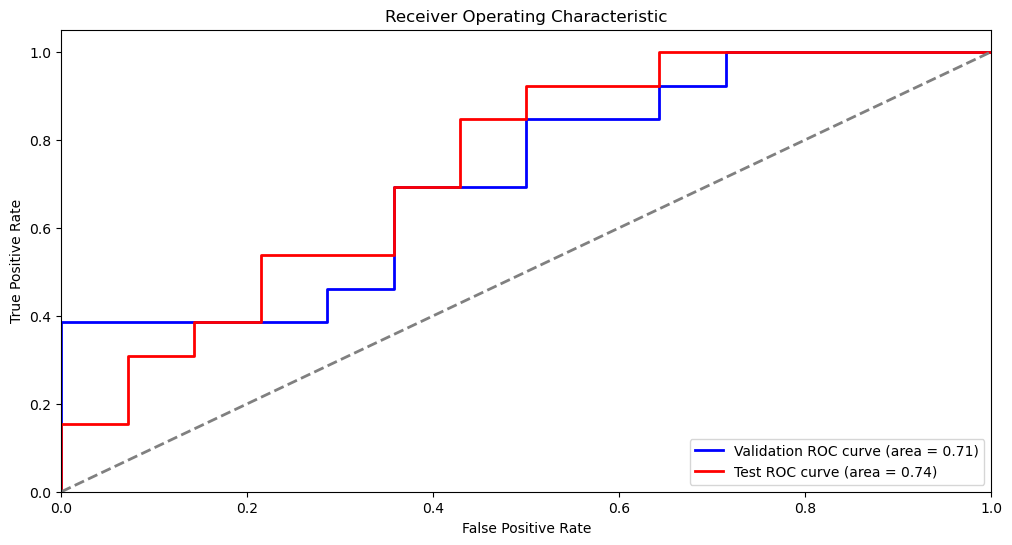

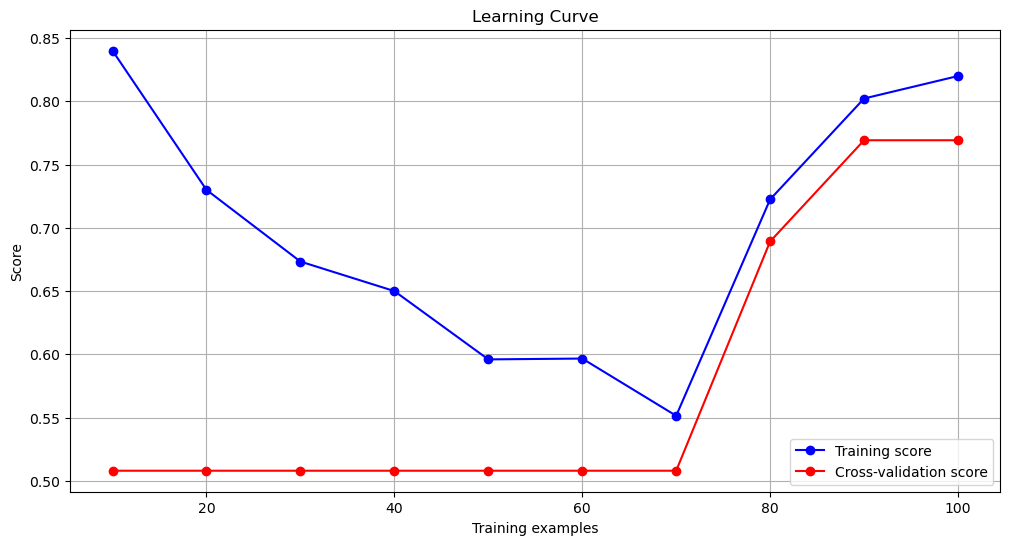

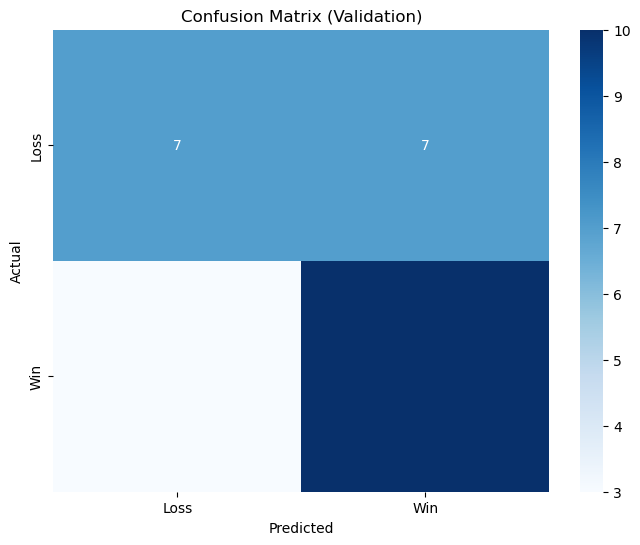

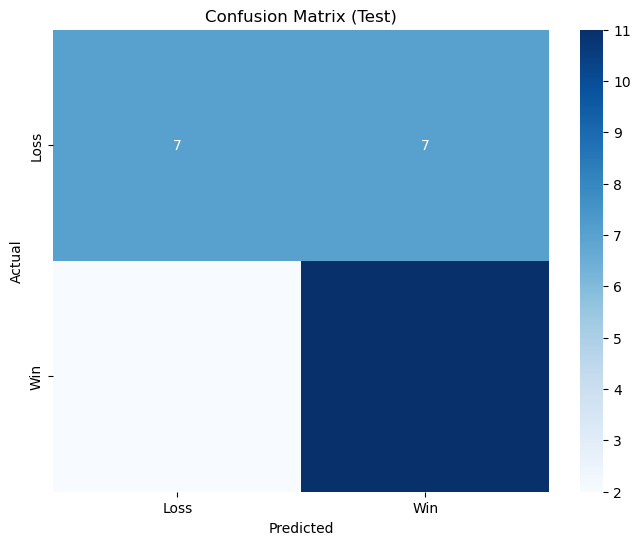

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# Assuming combined_stats_cleaned is already defined
features = ['MP', 'FG%', '3P%', '2PA', 'FT', 'FT%', 'DRB', 'TOV', 'PF']
target = 'Win'

X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

# Splitting the dataset: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning with RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(50, 200),  # Reduced number of trees
    'max_depth': [None, 5, 10, 15],  # Limited depth
    'min_samples_split': randint(10, 40),  # Further increased minimum samples to split
    'min_samples_leaf': randint(10, 40),  # Further increased minimum samples per leaf
    'max_features': ['sqrt', 'log2', None],  # Restricting features considered at each split
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   cv=5,
                                   verbose=2,
                                   n_jobs=-1,
                                   random_state=42)

random_search.fit(X_train_scaled, y_train)

# Best estimator from random search
best_rf = random_search.best_estimator_

# Predicting and evaluating on validation and test sets
y_val_pred = best_rf.predict(X_val_scaled)
y_test_pred = best_rf.predict(X_test_scaled)

# Accuracy scores
train_accuracy = accuracy_score(y_train, best_rf.predict(X_train_scaled))
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Validation Accuracy: {val_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Cross-validation scores
cross_val_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5)
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Average cross-validation score: {np.mean(cross_val_scores):.2f}')

# Confusion matrix
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix (Validation):')
print(conf_matrix_val)
print('Confusion Matrix (Test):')
print(conf_matrix_test)

# Classification report
class_report_val = classification_report(y_val, y_val_pred)
class_report_test = classification_report(y_test, y_test_pred)
print('Classification Report (Validation):')
print(class_report_val)
print('Classification Report (Test):')
print(class_report_test)

# ROC AUC curve
fpr_val, tpr_val, _ = roc_curve(y_val, best_rf.predict_proba(X_val_scaled)[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, best_rf.predict_proba(X_test_scaled)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(12, 6))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(best_rf, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plotting the confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

# Plotting the confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test)')
plt.show()


In [74]:
#Checking data instances for the train set
X_train.shape

(126, 9)

In [75]:
X_train

,MP,FG%,3P%,2PA,FT,FT%,DRB,TOV,PF
27,241.2,0.431,0.326,54.0,17.2,0.782,32.0,14.2,21.9
77,242.1,0.459,0.352,54.8,18.1,0.773,34.0,12.7,20.8
168,241.2,0.464,0.364,54.6,16.1,0.774,30.4,12.7,19.7
18,240.9,0.456,0.349,47.7,17.5,0.713,32.4,16.5,20.6
155,241.5,0.450,0.354,54.5,17.1,0.781,31.2,14.2,19.9
...,...,...,...,...,...,...,...,...,...
121,241.5,0.479,0.372,55.7,15.9,0.776,35.3,13.5,20.3
102,240.6,0.453,0.350,54.6,14.6,0.758,31.7,12.0,20.3
148,241.8,0.492,0.373,55.5,18.1,0.787,32.5,14.2,20.9
60,241.5,0.460,0.344,50.5,19.1,0.831,30.9,13.5,18.5


In [76]:
#Checking data instances for test set

X_test.shape

(27, 9)

In [77]:
X_test

,MP,FG%,3P%,2PA,FT,FT%,DRB,TOV,PF
84,241.8,0.462,0.347,54.3,15.6,0.782,33.9,15.1,17.2
105,240.9,0.471,0.365,50.0,16.8,0.786,32.5,14.2,20.5
29,241.5,0.430,0.323,51.8,15.0,0.756,35.2,14.0,18.3
73,240.3,0.489,0.381,53.5,18.3,0.825,32.9,13.1,18.5
142,242.1,0.474,0.358,52.4,19.6,0.771,34.6,16.8,20.4
6,240.6,0.471,0.360,45.8,17.9,0.767,35.6,14.0,18.9
65,241.5,0.487,0.373,50.4,18.5,0.774,34.8,12.9,19.2
88,240.9,0.463,0.348,56.5,17.0,0.785,32.8,15.2,20.6
16,242.1,0.467,0.379,49.0,17.3,0.808,33.9,14.6,20.5
160,240.3,0.462,0.355,56.4,17.1,0.772,31.4,12.4,17.9


In [78]:
#Checking data instances for validation set
X_val.shape

(27, 9)

In [79]:
X_val

,MP,FG%,3P%,2PA,FT,FT%,DRB,TOV,PF
169,241.5,0.470,0.372,53.5,17.1,0.807,34.0,12.6,18.2
179,241.5,0.491,0.376,54.8,15.6,0.789,34.0,13.9,18.1
37,241.5,0.473,0.353,52.0,18.7,0.786,34.1,15.4,20.5
51,240.9,0.485,0.356,55.2,17.6,0.785,34.2,14.1,18.8
76,241.2,0.464,0.363,56.1,19.5,0.826,31.9,12.0,20.3
177,242.1,0.474,0.376,55.8,14.3,0.795,33.2,13.4,19.7
136,241.8,0.474,0.365,54.9,17.2,0.771,32.9,13.0,19.6
50,240.6,0.487,0.378,51.3,17.7,0.800,32.3,13.7,21.1
124,242.4,0.468,0.368,52.9,17.5,0.782,31.5,15.7,20.4
96,242.1,0.447,0.339,45.7,17.5,0.779,32.1,15.0,20.6


<h1> 3.  MULTILAYER PERCEPTRON

Training Accuracy: 0.75
Validation Accuracy: 0.74
Test Accuracy: 0.78
Validation Confusion Matrix:
[[ 9  6]
 [ 1 11]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.65      0.92      0.76        12

    accuracy                           0.74        27
   macro avg       0.77      0.76      0.74        27
weighted avg       0.79      0.74      0.74        27

Test Confusion Matrix:
[[ 4  6]
 [ 0 17]]
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.74      1.00      0.85        17

    accuracy                           0.78        27
   macro avg       0.87      0.70      0.71        27
weighted avg       0.84      0.78      0.75        27



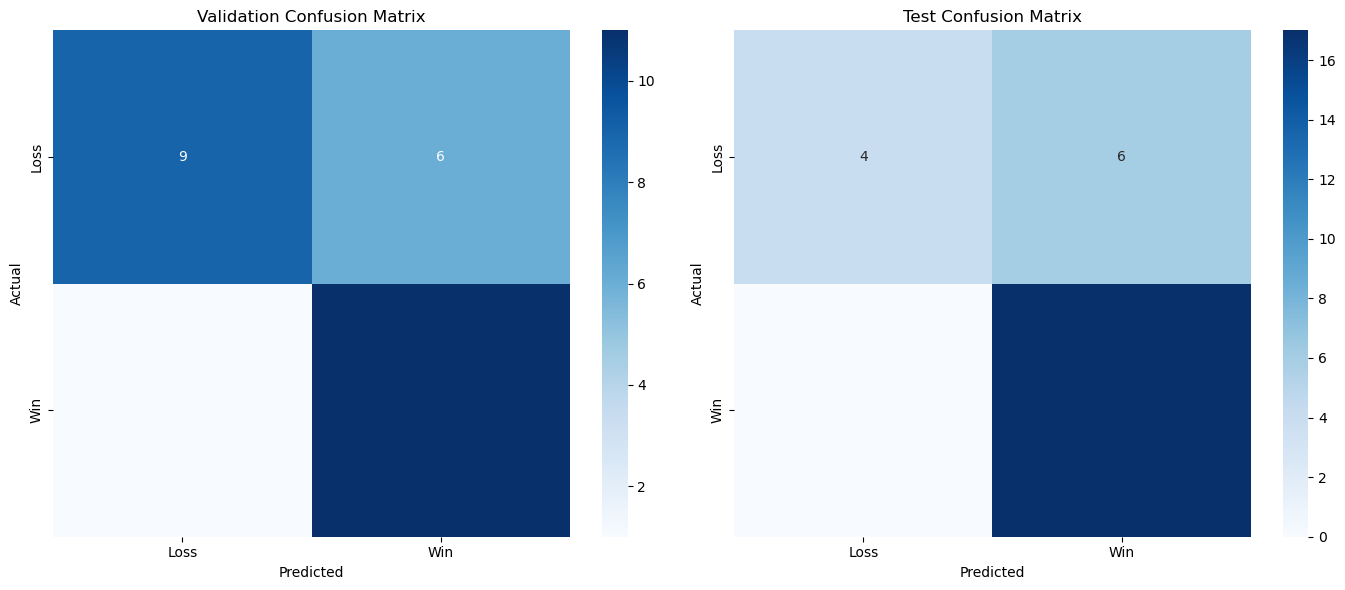

Cross-validation scores: [0.80769231 0.64       0.8        0.68       0.8       ]
Mean CV score: 0.75


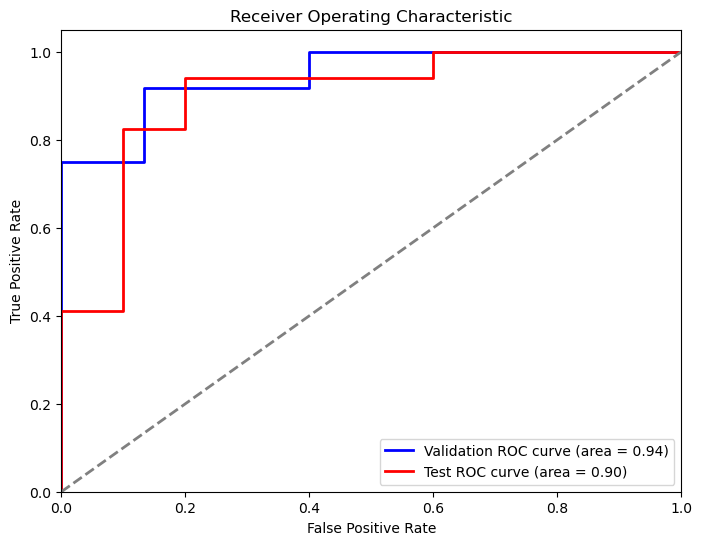

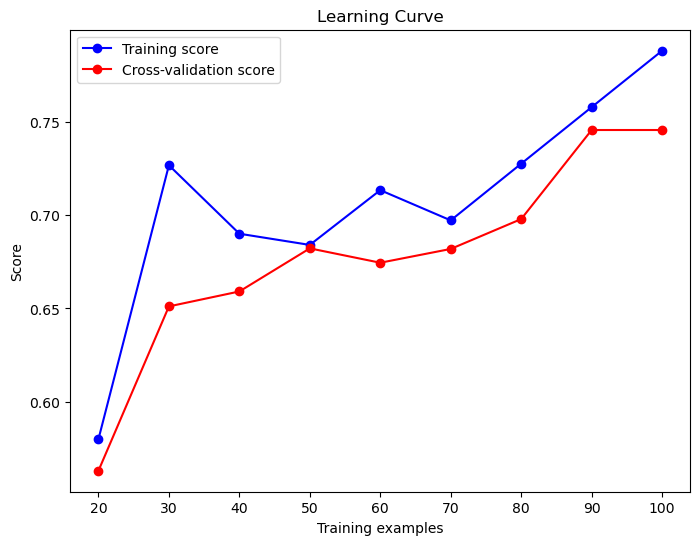

In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


# Define features and target
features = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
target = 'Win'

# Splitting the dataset into training, testing, and validation sets
X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Training the MLPClassifier with increased regularization and early stopping
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, solver='adam', random_state=42, alpha=0.01, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)
mlp.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = mlp.predict(X_train_scaled)
y_val_pred = mlp.predict(X_val_scaled)
y_test_pred = mlp.predict(X_test_scaled)

# Accuracy Scores
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing Accuracy Scores
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Validation Accuracy: {val_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Confusion Matrices and Classification Reports
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_val = classification_report(y_val, y_val_pred)
class_report_test = classification_report(y_test, y_test_pred)

print('Validation Confusion Matrix:')
print(conf_matrix_val)
print('Validation Classification Report:')
print(class_report_val)

print('Test Confusion Matrix:')
print(conf_matrix_test)
print('Test Classification Report:')
print(class_report_test)

# Plotting Confusion Matrices
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')

plt.tight_layout()
plt.show()

# Cross-validation scores
cv_scores = cross_val_score(mlp, X_train_scaled, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean():.2f}')

# ROC Curve
y_val_proba = mlp.predict_proba(X_val_scaled)[:, 1]
y_test_proba = mlp.predict_proba(X_test_scaled)[:, 1]

fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8,6))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(mlp, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


<h1> Hyperparameter Tunning

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Training Accuracy: 0.91
Validation Accuracy: 0.96
Test Accuracy: 0.89
Validation Confusion Matrix:
[[15  0]
 [ 1 11]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.92      0.96        12

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27

Test Confusion Matrix:
[[ 8  2]
 [ 1 16]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.89      0.94      0.91        17

    accuracy                           0.89        27
   macro avg       0.89     

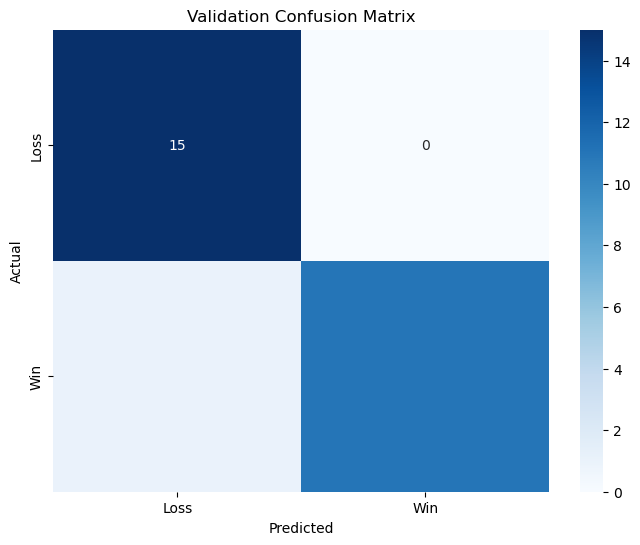

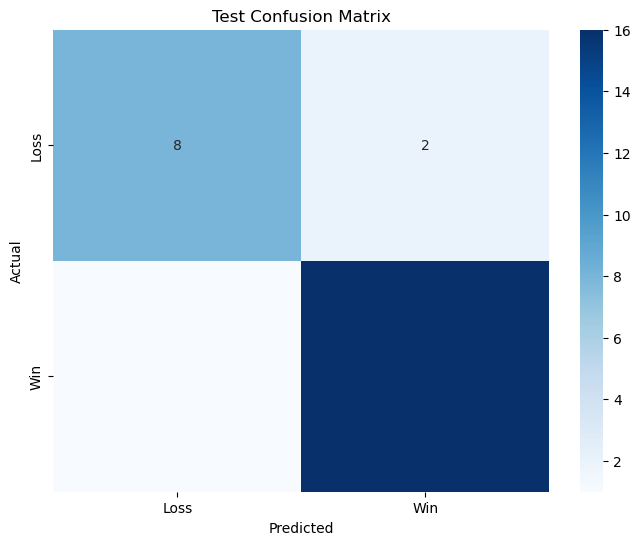

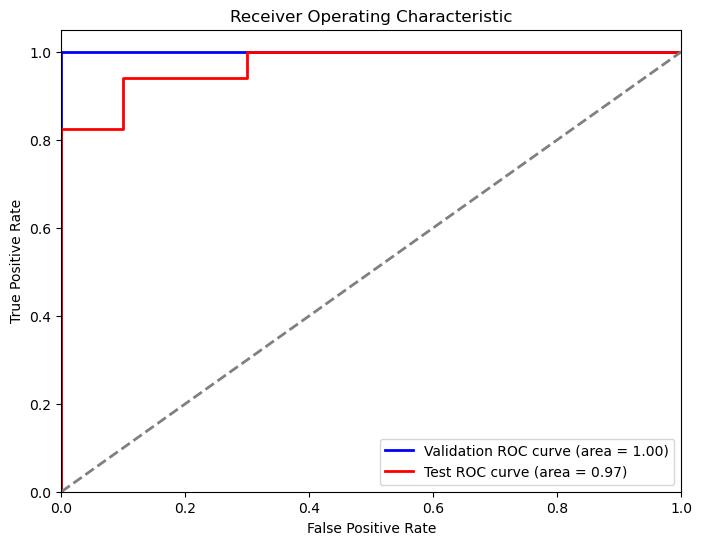

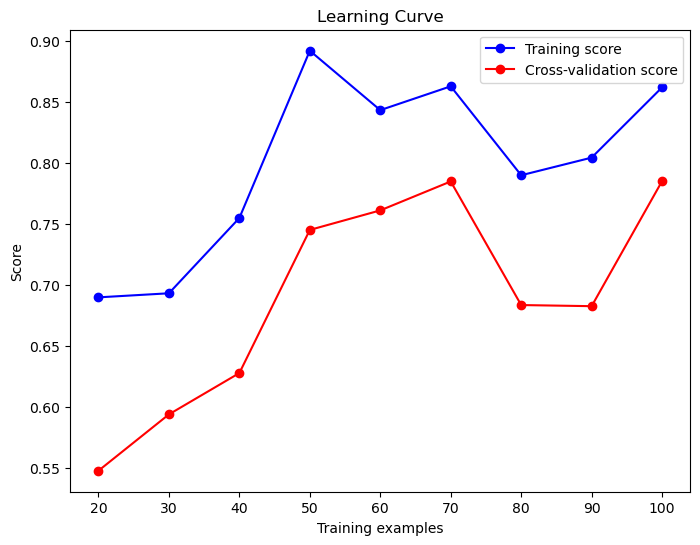

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Defining features and target
features = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
target = 'Win'


X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

# Splitting the dataset into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Initializing the MLPClassifier
mlp = MLPClassifier(max_iter=500, random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)

# Performing GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Getting the best parameters and estimator
best_params = grid_search.best_params_
best_mlp = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

# Predictions with the best estimator
y_train_pred = best_mlp.predict(X_train_scaled)
y_val_pred = best_mlp.predict(X_val_scaled)
y_test_pred = best_mlp.predict(X_test_scaled)

# Accuracy Scores
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing Accuracy Scores
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Validation Accuracy: {val_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Confusion Matrix and Classification Report for validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
class_report_val = classification_report(y_val, y_val_pred)

print('Validation Confusion Matrix:')
print(conf_matrix_val)
print('Validation Classification Report:')
print(class_report_val)

# Confusion Matrix and Classification Report for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

print('Test Confusion Matrix:')
print(conf_matrix_test)
print('Test Classification Report:')
print(class_report_test)

# Plotting Confusion Matrix for validation set
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Plotting Confusion Matrix for test set
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

# ROC Curve
y_val_proba = best_mlp.predict_proba(X_val_scaled)[:, 1]
y_test_proba = best_mlp.predict_proba(X_test_scaled)[:, 1]

fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8,6))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(best_mlp, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


In [82]:
#Checking data instances for train set

X_train.shape

(126, 22)

In [83]:
X_test


,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
57,241.8,41.3,90.4,0.457,10.7,32.5,0.330,30.5,57.9,0.528,...,0.749,11.0,33.5,44.5,25.1,7.7,5.2,14.2,20.3,111.0
118,242.4,42.0,90.1,0.466,14.0,38.7,0.362,28.0,51.4,0.544,...,0.763,11.4,35.6,47.0,26.5,7.5,4.6,15.0,19.6,114.9
174,240.3,43.0,90.4,0.475,13.1,35.6,0.368,29.8,54.8,0.545,...,0.770,10.9,34.1,45.1,27.5,7.4,4.0,13.7,20.3,115.6
71,241.2,42.5,86.1,0.493,12.4,32.6,0.382,30.0,53.6,0.561,...,0.808,10.1,33.9,44.1,27.0,7.4,6.0,14.9,18.0,116.2
166,241.2,41.2,86.9,0.474,13.4,35.4,0.378,27.8,51.5,0.541,...,0.779,10.7,35.0,45.6,26.6,8.1,6.5,15.1,18.8,112.8
15,241.5,40.5,88.1,0.460,11.4,33.2,0.344,29.1,54.9,0.530,...,0.768,9.6,33.4,42.9,23.7,7.2,4.5,14.1,18.9,110.3
129,241.2,40.0,85.9,0.466,11.4,32.0,0.357,28.6,53.9,0.530,...,0.786,10.2,32.6,42.9,23.4,7.2,4.0,14.4,19.9,111.6
2,240.9,41.8,89.4,0.468,14.1,38.4,0.366,27.8,51.0,0.544,...,0.776,10.2,36.5,46.7,23.9,7.6,4.0,13.4,18.2,115.5
80,240.6,41.3,88.7,0.465,13.2,35.8,0.369,28.1,52.9,0.531,...,0.780,12.7,32.5,45.2,24.4,7.5,4.1,13.2,17.6,112.8
144,241.8,42.4,90.5,0.469,12.9,35.5,0.364,29.5,55.0,0.536,...,0.769,10.7,32.6,43.3,25.7,7.9,4.0,14.3,18.4,117.1


In [84]:
#Checking data instances for test set

X_test.shape

(27, 22)

In [85]:
X_val

,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
164,240.3,41.6,88.9,0.468,12.9,35.4,0.363,28.8,53.5,0.538,...,0.775,11.1,31.1,42.2,26.4,7.3,4.7,13.0,18.7,112.3
19,242.1,40.6,91.3,0.445,11.9,34.2,0.349,28.7,57.1,0.503,...,0.759,13.4,32.0,45.3,22.1,9.0,4.6,12.5,19.6,109.4
39,241.8,42.7,90.4,0.473,14.8,40.3,0.368,27.9,50.1,0.557,...,0.743,11.1,37.5,48.6,25.8,6.4,4.9,14.6,18.1,116.9
18,240.9,39.4,86.4,0.456,13.5,38.7,0.349,25.9,47.7,0.543,...,0.713,9.6,32.4,42.0,23.6,7.3,4.7,16.5,20.6,109.7
56,241.2,40.5,86.3,0.470,10.8,31.1,0.346,29.8,55.2,0.539,...,0.784,10.2,33.1,43.2,23.2,7.4,4.7,15.1,20.1,111.4
12,240.6,41.7,86.9,0.480,10.6,28.8,0.369,31.1,58.1,0.535,...,0.813,8.7,33.7,42.3,23.9,7.1,4.1,12.8,18.8,111.6
178,241.8,44.9,92.3,0.487,12.7,34.0,0.373,32.2,58.3,0.553,...,0.784,10.5,34.8,45.3,28.0,8.9,4.6,13.4,17.9,118.6
93,242.7,38.3,88.1,0.434,11.8,34.9,0.339,26.4,53.2,0.497,...,0.783,10.5,33.3,43.7,21.6,7.5,4.6,13.8,19.4,104.5
43,241.8,42.9,87.4,0.490,12.2,33.3,0.365,30.7,54.1,0.568,...,0.755,9.1,32.8,41.9,26.2,8.0,5.4,15.3,21.6,115.8
124,242.4,39.0,83.5,0.468,11.3,30.6,0.368,27.8,52.9,0.525,...,0.782,9.8,31.5,41.2,23.0,7.0,4.4,15.7,20.4,106.9


In [86]:
#Checking data instances for validation set
X_val.shape

(27, 22)

In [87]:
y_train

47     0
87     0
157    0
84     0
151    1
      ..
73     1
109    1
14     1
95     0
105    0
Name: Win, Length: 126, dtype: int32

In [88]:
y_test

57     0
118    1
174    1
71     1
166    0
15     0
129    0
2      1
80     0
144    1
146    1
116    1
62     1
24     0
68     1
149    1
67     1
9      1
136    0
130    0
176    1
16     0
121    1
52     0
112    1
120    1
177    1
Name: Win, dtype: int32

In [89]:
y_val

164    0
19     0
39     1
18     0
56     0
12     1
178    1
93     0
43     1
124    0
158    0
42     1
32     1
29     0
31     1
103    0
96     0
147    1
99     0
181    1
100    0
70     1
128    0
46     0
152    1
161    0
69     1
Name: Win, dtype: int32

In [90]:
# Defining features and target variable
features = ['MP', 'FG%', '3P%', '2PA', 'FT', 'FT%', 'DRB', 'TOV', 'PF']
target = 'Win'

In [91]:
# Separating features and target from the dataset
X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

In [92]:
# Splitting the data into training and validation sets (70% training, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
# Initializng the logistic regression model
logistic_regression = LogisticRegression()

In [61]:
# Training the model
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [62]:
# Making predictions on the validation set
y_pred = logistic_regression.predict(X_val)

In [63]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.69


In [64]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[17  8]
 [ 9 20]]


In [65]:
# Generating the classification report
class_report = classification_report(y_val, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.68      0.67        25
           1       0.71      0.69      0.70        29

    accuracy                           0.69        54
   macro avg       0.68      0.68      0.68        54
weighted avg       0.69      0.69      0.69        54



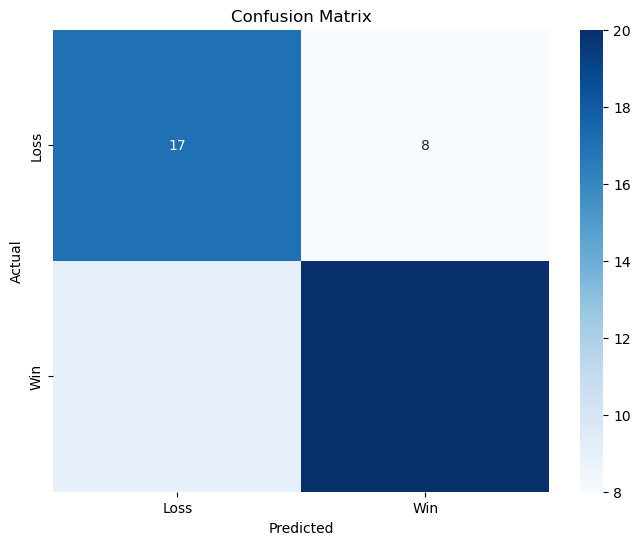

In [66]:
# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h1>Fine Tunning Logistic Regression Model

<h1> Feature Scaling

In [67]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


<H1> Hyperparameter Tunning

In [68]:
# Defining the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Solver to use with l1 penalty
}

# Initializing the logistic regression model
logistic_regression = LogisticRegression()

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')

# Fitting GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Training the logistic regression model with the best parameters
logistic_regression = LogisticRegression(**best_params)
logistic_regression.fit(X_train_scaled, y_train)

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


LogisticRegression(C=1, solver='liblinear')

In [69]:
# Making predictions on the validation set
y_pred = logistic_regression.predict(X_val_scaled)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


In [70]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[20  5]
 [ 3 26]]


In [71]:
# Generating the classification report
class_report = classification_report(y_val, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.84      0.90      0.87        29

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



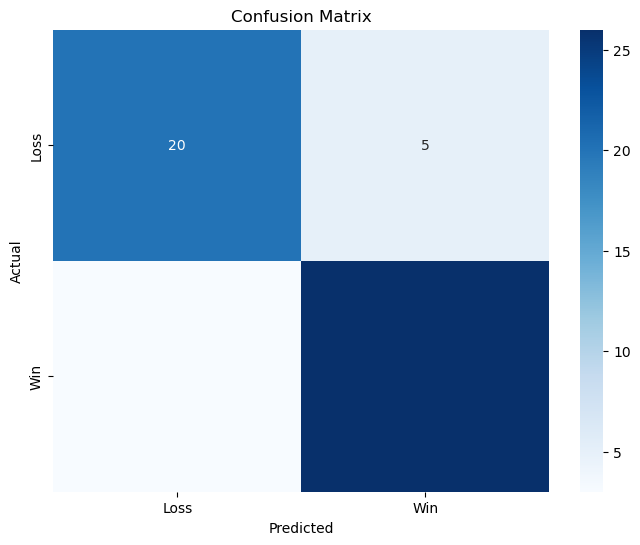

In [72]:
# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h1> 2. SUPPORT VECTOR MACHINE

In [73]:
# Creating a win/loss column
combined_stats_cleaned['Win'] = combined_stats_cleaned.groupby('Year')['PTS'].transform(lambda x: (x > x.mean()).astype(int))

# Displaying the first few rows to verify
print(combined_stats_cleaned.head())

    Rk                     Team     G     MP    FG   FGA    FG%    3P   3PA  \
0  1.0  Minnesota Timberwolves*  82.0  241.2  41.6  91.0  0.457  14.8  41.3   
1  2.0       Memphis Grizzlies*  82.0  241.2  43.5  94.4  0.461  11.5  32.7   
2  3.0         Milwaukee Bucks*  82.0  240.9  41.8  89.4  0.468  14.1  38.4   
3  4.0        Charlotte Hornets  82.0  242.4  42.8  91.4  0.468  13.9  38.2   
4  5.0            Phoenix Suns*  82.0  240.6  43.7  90.1  0.485  11.6  31.9   

     3P%  ...   TRB   AST  STL  BLK   TOV    PF    PTS  Type  Year  Win  
0  0.358  ...  44.2  25.7  8.8  5.6  14.3  21.8  115.9  Home  2021    1  
1  0.353  ...  49.2  26.0  9.8  6.5  13.2  19.8  115.6  Home  2021    1  
2  0.366  ...  46.7  23.9  7.6  4.0  13.4  18.2  115.5  Home  2021    1  
3  0.365  ...  44.6  28.1  8.6  4.9  13.3  19.9  115.3  Home  2021    1  
4  0.364  ...  45.3  27.4  8.6  4.4  12.9  19.9  114.8  Home  2021    1  

[5 rows x 28 columns]


In [74]:
# Defining features and target variable
features = ['MP', 'FG%', '3P%', '2PA', 'FT', 'FT%', 'DRB', 'TOV', 'PF']
target = 'Win'

In [75]:
# Separating features and target from the dataset
X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

In [76]:
# Splitting the data into training and validation sets (70% training, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [77]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [78]:
# Initializing the SVM model
svm_model = SVC()

In [79]:
# Training the model
svm_model.fit(X_train_scaled, y_train)

SVC()

In [80]:
# Making predictions on the validation set
y_pred = svm_model.predict(X_val_scaled)

In [81]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [82]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[20  5]
 [ 1 28]]


In [83]:
# Generating the classification report
class_report = classification_report(y_val, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.85      0.97      0.90        29

    accuracy                           0.89        54
   macro avg       0.90      0.88      0.89        54
weighted avg       0.90      0.89      0.89        54



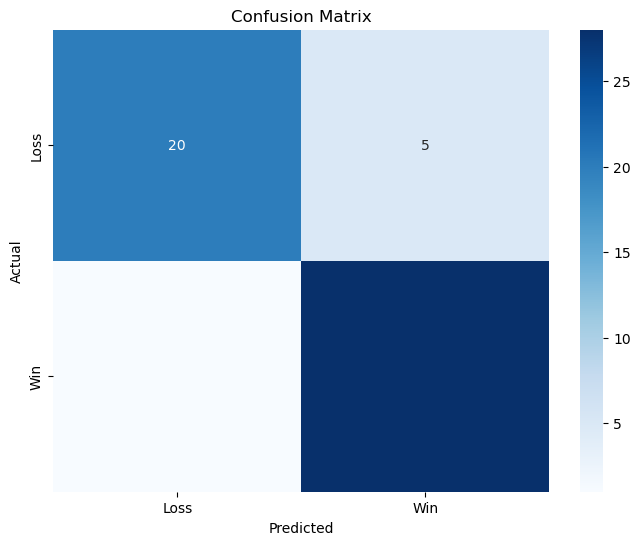

In [84]:
# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<H1> Fine Tuning Using GridSearchCV

In [85]:
# Defining the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}


In [86]:
# Initializing the SVM model
svm_model = SVC()

In [87]:
# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [88]:
# Fitting GridSearchCV
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [89]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')


Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


<H1> Training The Model with the best parameters

In [90]:
# Training the SVM model with the best parameters
svm_model = SVC(**best_params)
svm_model.fit(X_train_scaled, y_train)


SVC(C=0.1, gamma=1, kernel='linear')

<h1> Making Predictions

In [91]:
# Making predictions on the validation set
y_pred = svm_model.predict(X_val_scaled)

<H1> Evaluating The Model

In [92]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.85


In [93]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[20  5]
 [ 3 26]]


In [94]:
# Generating the classification report
class_report = classification_report(y_val, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.84      0.90      0.87        29

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



<h1>Visualizing The Confusion Matrix

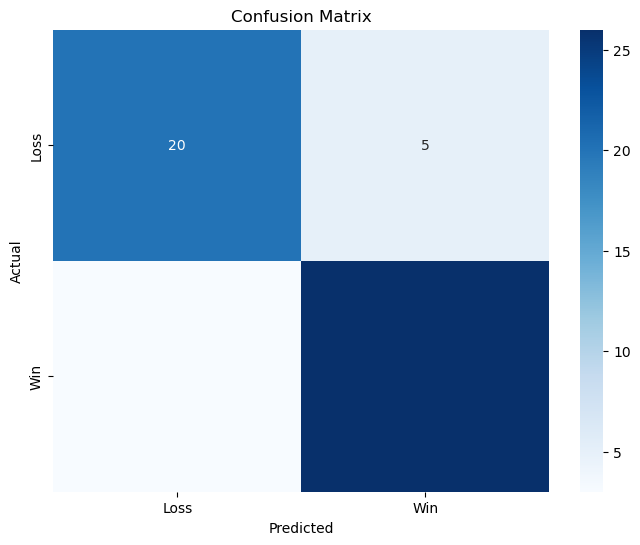

In [95]:
# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<H1> 3. RANDOM FOREST

<H1>Defining Features and Variables

In [96]:
# Defining features and target variable
features = ['MP', 'FG%', '3P%', '2PA', 'FT', 'FT%', 'DRB', 'TOV', 'PF']
target = 'Win'

<h1> Separating Features and Target

In [97]:
X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

<h1> Standardizing the features

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

<h1> Initializing Random Forest

In [99]:
random_forest = RandomForestClassifier(random_state=42)

<H1> Training The Model

In [100]:
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

<h1> Making Predictions

In [101]:
y_pred = random_forest.predict(X_val_scaled)

<h1> Model Evaluation

In [102]:
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


In [103]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[21  4]
 [ 4 25]]


In [104]:
# Generating the classification report
class_report = classification_report(y_val, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.86      0.86      0.86        29

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



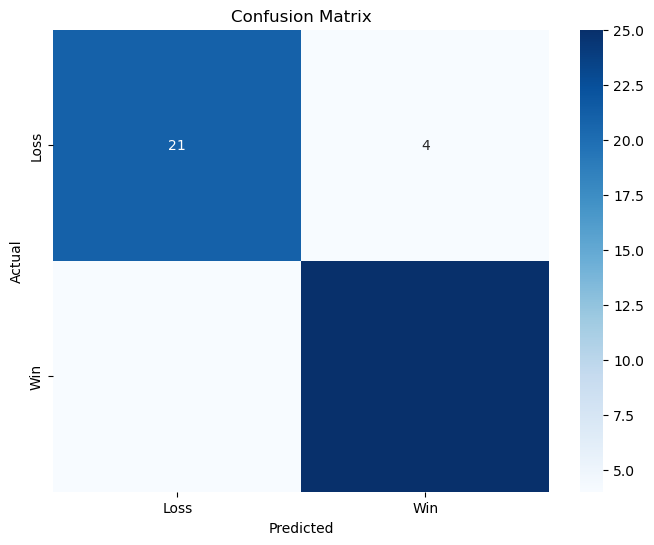

In [105]:
# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<H1> Fine Tuning The Model

<h1> Splitting

In [106]:
# Splitting the data into training and validation sets (70% training, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

<H1> Defining Parameter Grid

In [108]:
# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


<H1> Initializing Random Forest

In [109]:
random_forest = RandomForestClassifier(random_state=42)

<H1>Initializing and Fitting GridSearchCV

In [110]:
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# Fitting GridSearchCV
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

<h1> Getting and Training the Best Parameters

In [111]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [112]:
# Training the Random Forest model with the best parameters
best_random_forest = RandomForestClassifier(**best_params, random_state=42)
best_random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=6, max_features='auto', min_samples_split=10,
                       random_state=42)

In [113]:
# Making predictions on the validation set
y_pred = best_random_forest.predict(X_val_scaled)

<h1> Model Evaluation

In [114]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [115]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[19  6]
 [ 5 24]]


In [116]:
# Generating the classification report
class_report = classification_report(y_val, y_pred)
print('Classification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.80      0.83      0.81        29

    accuracy                           0.80        54
   macro avg       0.80      0.79      0.79        54
weighted avg       0.80      0.80      0.80        54



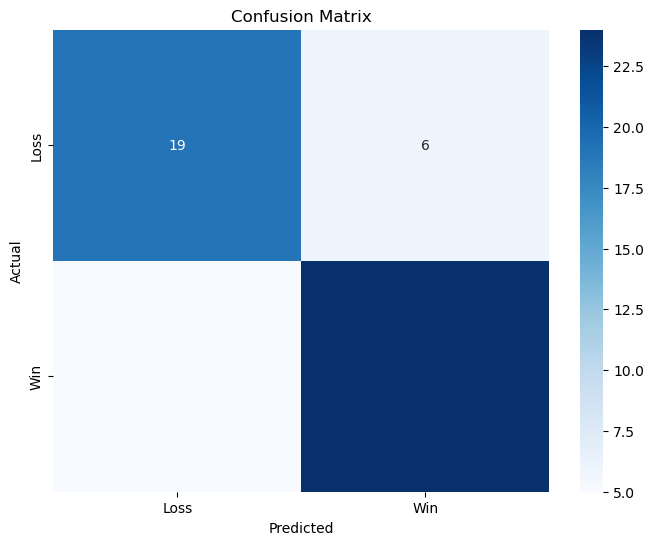

In [117]:
# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h1> 4. DECISION TREE

In [118]:
# Defining features and target variable
features = ['MP', 'FG%', '3P%', '2PA', 'FT', 'FT%', 'DRB', 'TOV', 'PF']
target = 'Win'

<H1> Separating Features

In [119]:
# Separating features and target from the dataset
X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

<h1> Splitting Dataset

In [120]:
# Splitting the data into training and validation sets (70% training, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [122]:
# Initializing the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

<h1> Model Training

In [123]:
# Training the model
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [124]:
# Making predictions on the validation set
y_pred = decision_tree.predict(X_val_scaled)


In [125]:
# Making predictions on the validation set
y_pred = decision_tree.predict(X_val_scaled)


<h1> Evaluating The Model

In [126]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [127]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[19  6]
 [ 5 24]]


In [128]:
# Generating the classification report
class_report = classification_report(y_val, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.80      0.83      0.81        29

    accuracy                           0.80        54
   macro avg       0.80      0.79      0.79        54
weighted avg       0.80      0.80      0.80        54



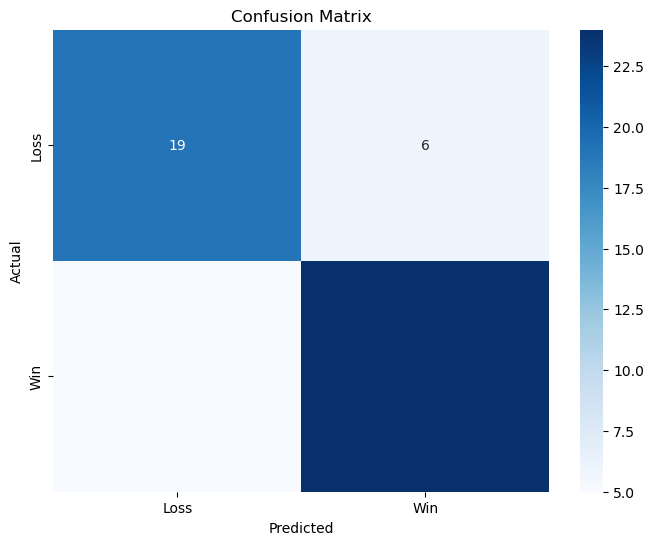

In [129]:
# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h1>Fine Tunning The Model

In [130]:
# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

In [131]:
# Initializing the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

In [132]:
# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


<h1>Fitting GridsearchCV and getting the Best Parameters

In [133]:
# Fitting GridSearchCV
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=2)

In [134]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}


<h1> Training the model

In [135]:
# Training the Decision Tree model with the best parameters
best_decision_tree = DecisionTreeClassifier(**best_params, random_state=42)
best_decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_features='auto', min_samples_split=10,
                       random_state=42)

In [136]:
# Making predictions on the validation set
y_pred = best_decision_tree.predict(X_val_scaled)

<h1> Model Evaluation

In [137]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.56


In [138]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[18  7]
 [17 12]]


In [139]:
# Generating the classification report
class_report = classification_report(y_val, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.72      0.60        25
           1       0.63      0.41      0.50        29

    accuracy                           0.56        54
   macro avg       0.57      0.57      0.55        54
weighted avg       0.58      0.56      0.55        54



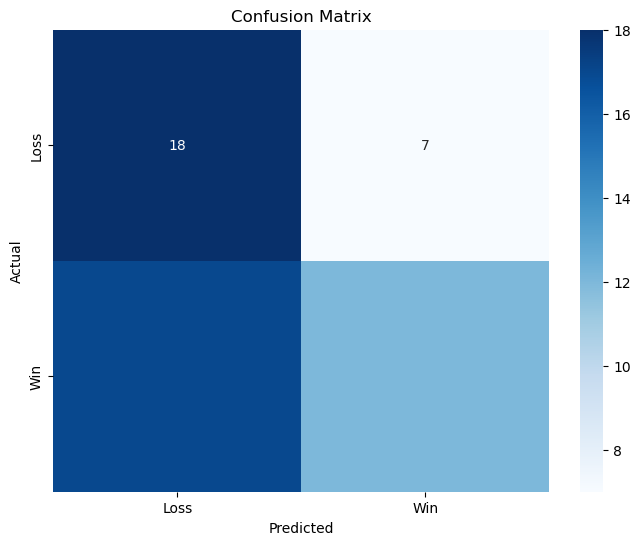

In [140]:
# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h1> 5. GRADIENT BOOSTING

In [141]:
# Defining features and target variable
features = ['MP', 'FG%', '3P%', '2PA', 'FT', 'FT%', 'DRB', 'TOV', 'PF']
target = 'Win'

In [142]:
# Separating features and target from the dataset
X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]

In [143]:
# Splitting the data into training and validation sets (70% training, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [144]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [145]:
# Initializing the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)

In [146]:
# Trainning the model
gradient_boosting.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [147]:
# Making predictions on the validation set
y_pred = gradient_boosting.predict(X_val_scaled)

<h1> Model Evaluation

In [148]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [149]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[22  3]
 [ 8 21]]


In [150]:
# Generating the classification report
class_report = classification_report(y_val, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        25
           1       0.88      0.72      0.79        29

    accuracy                           0.80        54
   macro avg       0.80      0.80      0.80        54
weighted avg       0.81      0.80      0.80        54



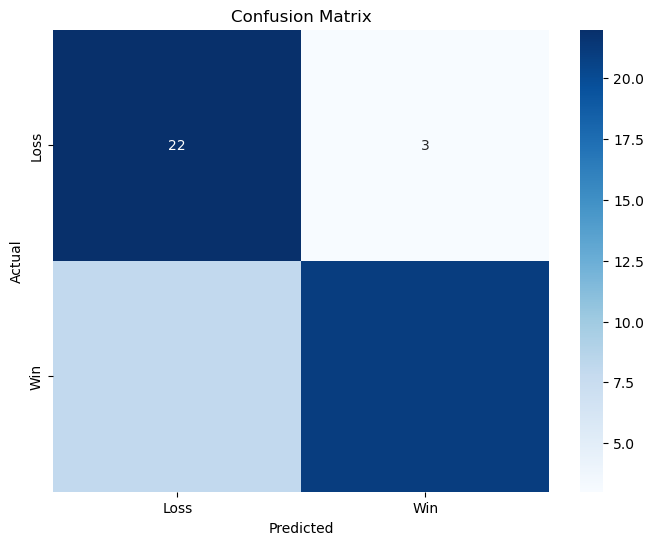

In [151]:
# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h1> Fine tunning the Model

In [152]:
# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [153]:
# Initializing the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)


In [154]:
# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [155]:
# Fitting GridSearchCV
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9, 1.0]},
             verbose=2)

In [156]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')


Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}


In [157]:
# Training the Gradient Boosting model with the best parameters
best_gradient_boosting = GradientBoostingClassifier(**best_params, random_state=42)
best_gradient_boosting.fit(X_train_scaled, y_train)


GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=4,
                           random_state=42)

In [158]:
# Making predictions on the validation set
y_pred = best_gradient_boosting.predict(X_val_scaled)


<h1> Model Evaluation

In [159]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [160]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[20  5]
 [ 7 22]]


In [161]:
# Generating the classification report
class_report = classification_report(y_val, y_pred)
print('Classification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.81      0.76      0.79        29

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54



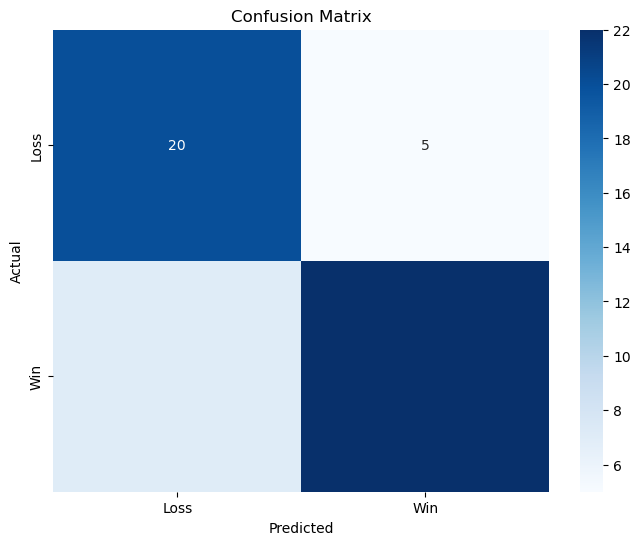

In [162]:
# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h1> 6. K-NEAREST NEIGHBORS

In [163]:
# Defining features and target variable
features = ['MP', 'FG%', '3P%', '2PA', 'FT', 'FT%', 'DRB', 'TOV', 'PF']
target = 'Win'

In [164]:
# Separating features and target from the dataset
X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]


In [165]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [166]:
# Initializing the KNN model
knn = KNeighborsClassifier()

In [167]:
# Performing 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(knn, X_scaled, y, cv=kf, scoring='accuracy')

In [168]:
# Printing the cross-validation results
print(f'Cross-Validation Accuracy Scores: {cv_results}')

Cross-Validation Accuracy Scores: [0.83333333 0.66666667 0.52777778 0.55555556 0.75      ]


In [169]:
print(f'Mean Cross-Validation Accuracy: {cv_results.mean():.2f}')

Mean Cross-Validation Accuracy: 0.67


In [170]:
# Training the model on the entire dataset
knn.fit(X_scaled, y)

KNeighborsClassifier()

<h1> Model Evaluation

In [171]:
# Evaluating the model on the entire dataset
y_pred = knn.predict(X_scaled)

In [172]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [173]:
# Generating the classification report
class_report = classification_report(y, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        92
           1       0.85      0.73      0.79        88

    accuracy                           0.81       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.81      0.81      0.80       180



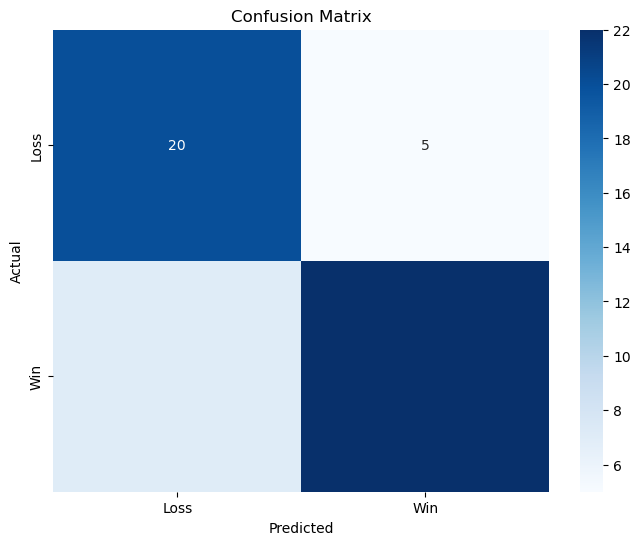

In [174]:
# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<H2>CROSS VALIDATION

In [175]:
# Perform k-fold cross-validation for a more robust performance estimate

from sklearn.model_selection import cross_val_score

# Logistic Regression with k-fold cross-validation
logistic_regression = LogisticRegression()
logistic_cv_scores = cross_val_score(logistic_regression, X, y, cv=10)  # 10-fold cross-validation

# Random Forest with k-fold cross-validation
random_forest = RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=100)
random_forest_cv_scores = cross_val_score(random_forest, X, y, cv=10)  # 10-fold cross-validation

# Displaying the cross-validation scores
cv_results = {
    "Logistic Regression CV Scores": logistic_cv_scores,
    "Logistic Regression Mean CV Score": logistic_cv_scores.mean(),
    "Random Forest CV Scores": random_forest_cv_scores,
    "Random Forest Mean CV Score": random_forest_cv_scores.mean()
}

#import ace_tools as tools; tools.display_dataframe_to_user(name="Cross-Validation Results", dataframe=pd.DataFrame(cv_results))

cv_results

{'Logistic Regression CV Scores': array([0.55555556, 0.72222222, 0.66666667, 0.61111111, 0.77777778,
        0.72222222, 0.88888889, 0.66666667, 0.66666667, 0.55555556]),
 'Logistic Regression Mean CV Score': 0.6833333333333333,
 'Random Forest CV Scores': array([0.83333333, 0.61111111, 0.61111111, 0.83333333, 0.77777778,
        0.72222222, 0.94444444, 0.72222222, 0.83333333, 0.83333333]),
 'Random Forest Mean CV Score': 0.7722222222222221}

In [186]:
X_train

,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
47,241.2,42.1,90.1,0.467,12.2,32.6,0.374,29.9,57.5,0.520,...,0.793,11.8,32.4,44.2,27.3,7.1,5.3,13.5,21.2,113.6
87,240.9,39.8,85.6,0.465,12.5,33.7,0.370,27.4,51.9,0.527,...,0.818,9.3,33.0,42.3,25.8,7.5,3.4,12.7,17.3,110.1
157,241.2,39.8,84.0,0.474,11.5,32.1,0.358,28.3,51.8,0.546,...,0.780,8.9,30.9,39.9,23.9,8.1,4.6,15.0,20.9,108.4
84,241.8,41.9,90.7,0.462,12.6,36.4,0.347,29.3,54.3,0.539,...,0.782,10.4,33.9,44.2,29.9,7.1,6.3,15.1,17.2,112.1
151,240.9,42.4,88.1,0.482,14.5,38.8,0.374,27.9,49.3,0.567,...,0.794,10.5,31.0,41.5,26.1,8.8,6.2,13.2,20.6,118.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,240.3,42.4,86.7,0.489,12.6,33.2,0.381,29.7,53.5,0.555,...,0.825,10.0,32.9,43.0,25.6,7.8,5.0,13.1,18.5,115.6
109,240.6,41.4,87.4,0.474,11.7,32.0,0.366,29.7,55.5,0.536,...,0.795,9.3,33.9,43.2,25.0,7.1,5.0,13.1,18.2,112.0
14,240.6,40.5,86.4,0.469,14.3,39.4,0.364,26.2,47.0,0.557,...,0.769,9.8,35.7,45.5,27.1,8.8,4.5,14.9,21.0,111.0
95,240.6,37.9,86.6,0.438,12.2,36.0,0.339,25.7,50.6,0.509,...,0.759,9.7,33.0,42.6,22.9,7.9,3.9,14.5,18.0,105.5


In [187]:
X_val

,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
19,242.1,40.6,91.3,0.445,11.9,34.2,0.349,28.7,57.1,0.503,...,0.759,13.4,32.0,45.3,22.1,9.0,4.6,12.5,19.6,109.4
43,241.8,42.9,87.4,0.490,12.2,33.3,0.365,30.7,54.1,0.568,...,0.755,9.1,32.8,41.9,26.2,8.0,5.4,15.3,21.6,115.8
158,240.9,40.2,86.0,0.467,13.0,36.8,0.353,27.2,49.2,0.553,...,0.780,9.2,33.5,42.8,26.5,6.6,4.7,13.7,18.9,108.4
80,240.6,41.3,88.7,0.465,13.2,35.8,0.369,28.1,52.9,0.531,...,0.780,12.7,32.5,45.2,24.4,7.5,4.1,13.2,17.6,112.8
149,242.1,43.8,90.2,0.486,11.9,33.5,0.356,31.9,56.7,0.562,...,0.803,10.6,33.5,44.1,26.0,7.5,5.0,14.2,19.7,118.1
15,241.5,40.5,88.1,0.460,11.4,33.2,0.344,29.1,54.9,0.530,...,0.768,9.6,33.4,42.9,23.7,7.2,4.5,14.1,18.9,110.3
24,240.6,39.7,84.6,0.469,11.6,32.8,0.355,28.1,51.9,0.541,...,0.760,10.2,34.0,44.2,25.2,7.1,4.2,14.4,17.5,107.8
70,242.1,43.3,90.9,0.477,14.4,39.3,0.366,29.0,51.7,0.561,...,0.745,10.8,33.2,44.0,28.3,7.6,4.2,13.1,19.9,116.6
116,241.2,40.2,87.4,0.460,13.1,37.3,0.350,27.2,50.0,0.543,...,0.780,11.0,34.9,45.9,26.2,7.2,4.8,16.3,20.9,113.3
121,241.5,43.4,90.6,0.479,13.0,34.9,0.372,30.4,55.7,0.547,...,0.776,10.6,35.3,45.8,25.3,8.1,4.8,13.5,20.3,115.8


<h1> 7. MULTILAYER PERCEPTRON 

In [176]:
from sklearn.neural_network import MLPClassifier

In [177]:
# Define features and target
features = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
target = 'Win'

X = combined_stats_cleaned[features]
y = combined_stats_cleaned[target]


In [178]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [179]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [180]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, solver='adam', random_state=42)
mlp.fit(X_train_scaled, y_train)


MLPClassifier(max_iter=300, random_state=42)

In [181]:
y_pred = mlp.predict(X_val_scaled)

accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [182]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[22  3]
 [ 3 26]]


In [183]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.90      0.90      0.90        29

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54



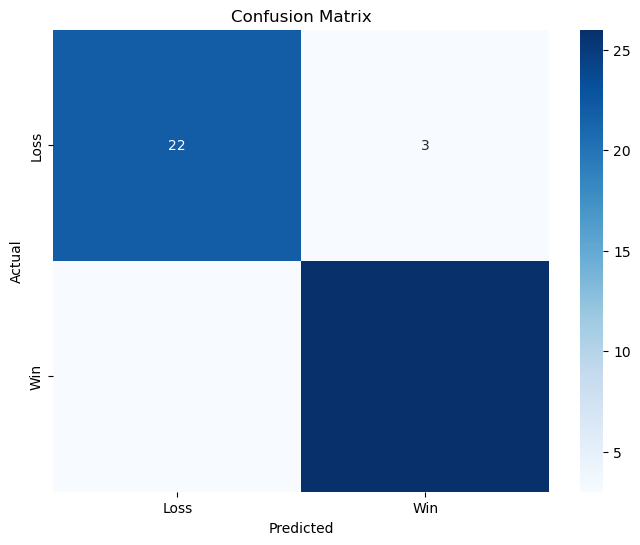

In [184]:
# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()